In [18]:
from tensorflow.python.keras import backend
from tensorflow.python.keras.engine import training
from tensorflow.python.keras.utils import data_utils
from tensorflow.python.keras.utils import layer_utils
from tensorflow.python.lib.io import file_io
import tensorflow as tf
from tensorflow import keras
from tensorflow.python import pywrap_tensorflow
from tensorflow.python.framework.convert_to_constants import  convert_variables_to_constants_v2_as_graph

from keras.utils.layer_utils import count_params 

from deepface.commons import functions
from deepface.commons import distance as dst
from deepface import DeepFace

import os
from pathlib import Path
from imutils import paths
import gdown

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from metrics import ArcFace

# Data Preparing
* Train data: CASIA-WebFace

## Clean up CASIA-WebFace

In [129]:
def transform_clean_list(webface_directory, cleaned_list_path):
    """转换webface的干净列表格式
    Args:
        webface_directory: WebFace数据目录
        cleaned_list_path: cleaned_list.txt路径
    Returns:
        cleaned_list: 转换后的数据列表
    """
    with open(cleaned_list_path, encoding='utf-8') as f:
        cleaned_list = f.readlines()
    cleaned_list = [p.replace('\\', '/') for p in cleaned_list]
    cleaned_list = [os.path.join(webface_directory, p) for p in cleaned_list]
    return cleaned_list

In [152]:
def remove_dirty_image(webface_directory,cleaned_list):
    cleaned_list = set([c.split()[0] for c in cleaned_list])
    for p in os.listdir(webface_directory):
        for img in os.listdir(webface_directory+p):
            path =  webface_directory+p+"/"+img
            if path not in cleaned_list:
                print(f"remove {path}")
                os.remove(path)         

In [153]:
data = './data/CASIA-WebFace/'
lst = 'cleaned list.txt'
cleaned_list = transform_clean_list(data, lst)
remove_dirty_image(data, cleaned_list) 

remove ./data/CASIA-WebFace/0000045/010.jpg
remove ./data/CASIA-WebFace/0000099/027.jpg
remove ./data/CASIA-WebFace/0000099/041.jpg
remove ./data/CASIA-WebFace/0000099/124.jpg
remove ./data/CASIA-WebFace/0000099/145.jpg
remove ./data/CASIA-WebFace/0000099/217.jpg
remove ./data/CASIA-WebFace/0000099/232.jpg
remove ./data/CASIA-WebFace/0000099/233.jpg
remove ./data/CASIA-WebFace/0000100/005.jpg
remove ./data/CASIA-WebFace/0000100/034.jpg
remove ./data/CASIA-WebFace/0000100/037.jpg
remove ./data/CASIA-WebFace/0000102/008.jpg
remove ./data/CASIA-WebFace/0000102/028.jpg
remove ./data/CASIA-WebFace/0000102/048.jpg
remove ./data/CASIA-WebFace/0000102/055.jpg
remove ./data/CASIA-WebFace/0000102/082.jpg
remove ./data/CASIA-WebFace/0000102/093.jpg
remove ./data/CASIA-WebFace/0000102/226.jpg
remove ./data/CASIA-WebFace/0000102/229.jpg
remove ./data/CASIA-WebFace/0000102/234.jpg
remove ./data/CASIA-WebFace/0000102/238.jpg
remove ./data/CASIA-WebFace/0000102/274.jpg
remove ./data/CASIA-WebFace/0000

remove ./data/CASIA-WebFace/0000174/066.jpg
remove ./data/CASIA-WebFace/0000174/070.jpg
remove ./data/CASIA-WebFace/0000174/112.jpg
remove ./data/CASIA-WebFace/0000174/120.jpg
remove ./data/CASIA-WebFace/0000174/169.jpg
remove ./data/CASIA-WebFace/0000177/009.jpg
remove ./data/CASIA-WebFace/0000177/015.jpg
remove ./data/CASIA-WebFace/0000177/021.jpg
remove ./data/CASIA-WebFace/0000177/038.jpg
remove ./data/CASIA-WebFace/0000177/045.jpg
remove ./data/CASIA-WebFace/0000177/078.jpg
remove ./data/CASIA-WebFace/0000177/085.jpg
remove ./data/CASIA-WebFace/0000177/089.jpg
remove ./data/CASIA-WebFace/0000177/101.jpg
remove ./data/CASIA-WebFace/0000177/111.jpg
remove ./data/CASIA-WebFace/0000177/112.jpg
remove ./data/CASIA-WebFace/0000177/125.jpg
remove ./data/CASIA-WebFace/0000177/135.jpg
remove ./data/CASIA-WebFace/0000177/157.jpg
remove ./data/CASIA-WebFace/0000183/008.jpg
remove ./data/CASIA-WebFace/0000185/047.jpg
remove ./data/CASIA-WebFace/0000185/048.jpg
remove ./data/CASIA-WebFace/0000

remove ./data/CASIA-WebFace/0000430/025.jpg
remove ./data/CASIA-WebFace/0000437/121.jpg
remove ./data/CASIA-WebFace/0000437/159.jpg
remove ./data/CASIA-WebFace/0000438/133.jpg
remove ./data/CASIA-WebFace/0000439/180.jpg
remove ./data/CASIA-WebFace/0000439/291.jpg
remove ./data/CASIA-WebFace/0000439/425.jpg
remove ./data/CASIA-WebFace/0000439/442.jpg
remove ./data/CASIA-WebFace/0000439/583.jpg
remove ./data/CASIA-WebFace/0000447/012.jpg
remove ./data/CASIA-WebFace/0000451/039.jpg
remove ./data/CASIA-WebFace/0000452/005.jpg
remove ./data/CASIA-WebFace/0000452/117.jpg
remove ./data/CASIA-WebFace/0000457/005.jpg
remove ./data/CASIA-WebFace/0000457/024.jpg
remove ./data/CASIA-WebFace/0000457/076.jpg
remove ./data/CASIA-WebFace/0000457/090.jpg
remove ./data/CASIA-WebFace/0000460/113.jpg
remove ./data/CASIA-WebFace/0000461/026.jpg
remove ./data/CASIA-WebFace/0000461/027.jpg
remove ./data/CASIA-WebFace/0000463/026.jpg
remove ./data/CASIA-WebFace/0000464/015.jpg
remove ./data/CASIA-WebFace/0000

remove ./data/CASIA-WebFace/0000656/008.jpg
remove ./data/CASIA-WebFace/0000656/031.jpg
remove ./data/CASIA-WebFace/0000656/035.jpg
remove ./data/CASIA-WebFace/0000656/046.jpg
remove ./data/CASIA-WebFace/0000656/053.jpg
remove ./data/CASIA-WebFace/0000656/065.jpg
remove ./data/CASIA-WebFace/0000656/115.jpg
remove ./data/CASIA-WebFace/0000656/132.jpg
remove ./data/CASIA-WebFace/0000657/006.jpg
remove ./data/CASIA-WebFace/0000657/008.jpg
remove ./data/CASIA-WebFace/0000657/024.jpg
remove ./data/CASIA-WebFace/0000657/028.jpg
remove ./data/CASIA-WebFace/0000657/037.jpg
remove ./data/CASIA-WebFace/0000657/061.jpg
remove ./data/CASIA-WebFace/0000657/069.jpg
remove ./data/CASIA-WebFace/0000657/073.jpg
remove ./data/CASIA-WebFace/0000657/082.jpg
remove ./data/CASIA-WebFace/0000657/085.jpg
remove ./data/CASIA-WebFace/0000662/004.jpg
remove ./data/CASIA-WebFace/0000662/011.jpg
remove ./data/CASIA-WebFace/0000662/023.jpg
remove ./data/CASIA-WebFace/0000662/042.jpg
remove ./data/CASIA-WebFace/0000

remove ./data/CASIA-WebFace/0000708/035.jpg
remove ./data/CASIA-WebFace/0000708/053.jpg
remove ./data/CASIA-WebFace/0000709/008.jpg
remove ./data/CASIA-WebFace/0000711/010.jpg
remove ./data/CASIA-WebFace/0000711/033.jpg
remove ./data/CASIA-WebFace/0000711/036.jpg
remove ./data/CASIA-WebFace/0000725/018.jpg
remove ./data/CASIA-WebFace/0000725/025.jpg
remove ./data/CASIA-WebFace/0000729/021.jpg
remove ./data/CASIA-WebFace/0000729/051.jpg
remove ./data/CASIA-WebFace/0000729/069.jpg
remove ./data/CASIA-WebFace/0000729/133.jpg
remove ./data/CASIA-WebFace/0000729/135.jpg
remove ./data/CASIA-WebFace/0000729/154.jpg
remove ./data/CASIA-WebFace/0000749/004.jpg
remove ./data/CASIA-WebFace/0000749/020.jpg
remove ./data/CASIA-WebFace/0000751/007.jpg
remove ./data/CASIA-WebFace/0000751/021.jpg
remove ./data/CASIA-WebFace/0000751/022.jpg
remove ./data/CASIA-WebFace/0000751/038.jpg
remove ./data/CASIA-WebFace/0000751/042.jpg
remove ./data/CASIA-WebFace/0000759/008.jpg
remove ./data/CASIA-WebFace/0000

remove ./data/CASIA-WebFace/0000881/046.jpg
remove ./data/CASIA-WebFace/0000881/065.jpg
remove ./data/CASIA-WebFace/0000881/082.jpg
remove ./data/CASIA-WebFace/0000881/083.jpg
remove ./data/CASIA-WebFace/0000884/008.jpg
remove ./data/CASIA-WebFace/0000884/028.jpg
remove ./data/CASIA-WebFace/0000884/035.jpg
remove ./data/CASIA-WebFace/0000884/043.jpg
remove ./data/CASIA-WebFace/0000884/050.jpg
remove ./data/CASIA-WebFace/0000884/083.jpg
remove ./data/CASIA-WebFace/0000884/084.jpg
remove ./data/CASIA-WebFace/0000884/118.jpg
remove ./data/CASIA-WebFace/0000889/013.jpg
remove ./data/CASIA-WebFace/0000889/026.jpg
remove ./data/CASIA-WebFace/0000892/020.jpg
remove ./data/CASIA-WebFace/0000892/022.jpg
remove ./data/CASIA-WebFace/0000893/014.jpg
remove ./data/CASIA-WebFace/0000893/015.jpg
remove ./data/CASIA-WebFace/0000893/037.jpg
remove ./data/CASIA-WebFace/0000893/051.jpg
remove ./data/CASIA-WebFace/0000902/012.jpg
remove ./data/CASIA-WebFace/0000902/028.jpg
remove ./data/CASIA-WebFace/0000

remove ./data/CASIA-WebFace/0000991/019.jpg
remove ./data/CASIA-WebFace/0000996/007.jpg
remove ./data/CASIA-WebFace/0000996/009.jpg
remove ./data/CASIA-WebFace/0000996/020.jpg
remove ./data/CASIA-WebFace/0000997/001.jpg
remove ./data/CASIA-WebFace/0000997/009.jpg
remove ./data/CASIA-WebFace/0000997/011.jpg
remove ./data/CASIA-WebFace/0001002/001.jpg
remove ./data/CASIA-WebFace/0001002/005.jpg
remove ./data/CASIA-WebFace/0001002/010.jpg
remove ./data/CASIA-WebFace/0001002/011.jpg
remove ./data/CASIA-WebFace/0001002/015.jpg
remove ./data/CASIA-WebFace/0001002/024.jpg
remove ./data/CASIA-WebFace/0001002/031.jpg
remove ./data/CASIA-WebFace/0001002/033.jpg
remove ./data/CASIA-WebFace/0001002/036.jpg
remove ./data/CASIA-WebFace/0001002/041.jpg
remove ./data/CASIA-WebFace/0001002/046.jpg
remove ./data/CASIA-WebFace/0001002/085.jpg
remove ./data/CASIA-WebFace/0001004/007.jpg
remove ./data/CASIA-WebFace/0001004/012.jpg
remove ./data/CASIA-WebFace/0001004/051.jpg
remove ./data/CASIA-WebFace/0001

remove ./data/CASIA-WebFace/0001099/066.jpg
remove ./data/CASIA-WebFace/0001099/099.jpg
remove ./data/CASIA-WebFace/0001101/026.jpg
remove ./data/CASIA-WebFace/0001101/033.jpg
remove ./data/CASIA-WebFace/0001101/043.jpg
remove ./data/CASIA-WebFace/0001101/050.jpg
remove ./data/CASIA-WebFace/0001101/067.jpg
remove ./data/CASIA-WebFace/0001101/073.jpg
remove ./data/CASIA-WebFace/0001101/096.jpg
remove ./data/CASIA-WebFace/0001101/153.jpg
remove ./data/CASIA-WebFace/0001101/183.jpg
remove ./data/CASIA-WebFace/0001101/222.jpg
remove ./data/CASIA-WebFace/0001101/226.jpg
remove ./data/CASIA-WebFace/0001103/004.jpg
remove ./data/CASIA-WebFace/0001103/013.jpg
remove ./data/CASIA-WebFace/0001103/047.jpg
remove ./data/CASIA-WebFace/0001103/074.jpg
remove ./data/CASIA-WebFace/0001103/089.jpg
remove ./data/CASIA-WebFace/0001103/094.jpg
remove ./data/CASIA-WebFace/0001103/117.jpg
remove ./data/CASIA-WebFace/0001103/121.jpg
remove ./data/CASIA-WebFace/0001104/004.jpg
remove ./data/CASIA-WebFace/0001

remove ./data/CASIA-WebFace/0001251/031.jpg
remove ./data/CASIA-WebFace/0001251/043.jpg
remove ./data/CASIA-WebFace/0001251/061.jpg
remove ./data/CASIA-WebFace/0001251/103.jpg
remove ./data/CASIA-WebFace/0001261/006.jpg
remove ./data/CASIA-WebFace/0001261/010.jpg
remove ./data/CASIA-WebFace/0001261/014.jpg
remove ./data/CASIA-WebFace/0001261/035.jpg
remove ./data/CASIA-WebFace/0001261/040.jpg
remove ./data/CASIA-WebFace/0001261/060.jpg
remove ./data/CASIA-WebFace/0001261/068.jpg
remove ./data/CASIA-WebFace/0001261/094.jpg


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




remove ./data/CASIA-WebFace/0001764/086.jpg
remove ./data/CASIA-WebFace/0001764/090.jpg
remove ./data/CASIA-WebFace/0001764/095.jpg
remove ./data/CASIA-WebFace/0001764/098.jpg
remove ./data/CASIA-WebFace/0001764/108.jpg
remove ./data/CASIA-WebFace/0001764/111.jpg
remove ./data/CASIA-WebFace/0001764/112.jpg
remove ./data/CASIA-WebFace/0001764/120.jpg
remove ./data/CASIA-WebFace/0001764/122.jpg
remove ./data/CASIA-WebFace/0001764/123.jpg
remove ./data/CASIA-WebFace/0001764/129.jpg
remove ./data/CASIA-WebFace/0001764/133.jpg
remove ./data/CASIA-WebFace/0001764/142.jpg
remove ./data/CASIA-WebFace/0001764/147.jpg
remove ./data/CASIA-WebFace/0001764/149.jpg
remove ./data/CASIA-WebFace/0001764/160.jpg
remove ./data/CASIA-WebFace/0001764/174.jpg
remove ./data/CASIA-WebFace/0001767/005.jpg
remove ./data/CASIA-WebFace/0001767/011.jpg
remove ./data/CASIA-WebFace/0001770/007.jpg
remove ./data/CASIA-WebFace/0001770/019.jpg
remove ./data/CASIA-WebFace/0001770/040.jpg
remove ./data/CASIA-WebFace/000

remove ./data/CASIA-WebFace/0001845/046.jpg
remove ./data/CASIA-WebFace/0001845/057.jpg
remove ./data/CASIA-WebFace/0001845/067.jpg
remove ./data/CASIA-WebFace/0001845/078.jpg
remove ./data/CASIA-WebFace/0001845/126.jpg
remove ./data/CASIA-WebFace/0001845/156.jpg
remove ./data/CASIA-WebFace/0001845/186.jpg
remove ./data/CASIA-WebFace/0001845/190.jpg
remove ./data/CASIA-WebFace/0001848/010.jpg
remove ./data/CASIA-WebFace/0001848/013.jpg
remove ./data/CASIA-WebFace/0001848/038.jpg
remove ./data/CASIA-WebFace/0001851/004.jpg
remove ./data/CASIA-WebFace/0001851/047.jpg
remove ./data/CASIA-WebFace/0001851/053.jpg
remove ./data/CASIA-WebFace/0001852/005.jpg
remove ./data/CASIA-WebFace/0001852/040.jpg
remove ./data/CASIA-WebFace/0001857/011.jpg
remove ./data/CASIA-WebFace/0001857/022.jpg
remove ./data/CASIA-WebFace/0001857/043.jpg
remove ./data/CASIA-WebFace/0001857/046.jpg
remove ./data/CASIA-WebFace/0001857/055.jpg
remove ./data/CASIA-WebFace/0001857/064.jpg
remove ./data/CASIA-WebFace/0001

remove ./data/CASIA-WebFace/0003779/002.jpg
remove ./data/CASIA-WebFace/0003888/031.jpg
remove ./data/CASIA-WebFace/0003931/011.jpg
remove ./data/CASIA-WebFace/0003941/001.jpg
remove ./data/CASIA-WebFace/0003941/036.jpg
remove ./data/CASIA-WebFace/0003941/048.jpg
remove ./data/CASIA-WebFace/0003941/080.jpg
remove ./data/CASIA-WebFace/0003941/081.jpg
remove ./data/CASIA-WebFace/0003941/089.jpg
remove ./data/CASIA-WebFace/0003941/135.jpg
remove ./data/CASIA-WebFace/0003981/006.jpg
remove ./data/CASIA-WebFace/0003981/015.jpg
remove ./data/CASIA-WebFace/0004056/038.jpg
remove ./data/CASIA-WebFace/0004081/008.jpg
remove ./data/CASIA-WebFace/0004081/016.jpg
remove ./data/CASIA-WebFace/0004081/019.jpg
remove ./data/CASIA-WebFace/0004248/004.jpg
remove ./data/CASIA-WebFace/0004248/006.jpg
remove ./data/CASIA-WebFace/0004248/013.jpg
remove ./data/CASIA-WebFace/0004248/031.jpg
remove ./data/CASIA-WebFace/0004248/048.jpg
remove ./data/CASIA-WebFace/0004266/001.jpg
remove ./data/CASIA-WebFace/0004

remove ./data/CASIA-WebFace/0004753/096.jpg
remove ./data/CASIA-WebFace/0004753/104.jpg
remove ./data/CASIA-WebFace/0004753/136.jpg
remove ./data/CASIA-WebFace/0004757/010.jpg
remove ./data/CASIA-WebFace/0004757/016.jpg
remove ./data/CASIA-WebFace/0004757/139.jpg
remove ./data/CASIA-WebFace/0004757/144.jpg
remove ./data/CASIA-WebFace/0004757/148.jpg
remove ./data/CASIA-WebFace/0004757/151.jpg
remove ./data/CASIA-WebFace/0004757/154.jpg
remove ./data/CASIA-WebFace/0004757/157.jpg
remove ./data/CASIA-WebFace/0004757/183.jpg
remove ./data/CASIA-WebFace/0004757/185.jpg
remove ./data/CASIA-WebFace/0004757/189.jpg
remove ./data/CASIA-WebFace/0004760/021.jpg
remove ./data/CASIA-WebFace/0004760/054.jpg
remove ./data/CASIA-WebFace/0004760/095.jpg
remove ./data/CASIA-WebFace/0004761/015.jpg
remove ./data/CASIA-WebFace/0004761/020.jpg
remove ./data/CASIA-WebFace/0004761/045.jpg
remove ./data/CASIA-WebFace/0004761/050.jpg
remove ./data/CASIA-WebFace/0004761/057.jpg
remove ./data/CASIA-WebFace/0004

remove ./data/CASIA-WebFace/0004861/057.jpg
remove ./data/CASIA-WebFace/0004861/069.jpg
remove ./data/CASIA-WebFace/0004867/004.jpg
remove ./data/CASIA-WebFace/0004867/005.jpg
remove ./data/CASIA-WebFace/0004867/006.jpg
remove ./data/CASIA-WebFace/0004867/018.jpg
remove ./data/CASIA-WebFace/0004867/029.jpg
remove ./data/CASIA-WebFace/0004868/024.jpg
remove ./data/CASIA-WebFace/0004868/043.jpg
remove ./data/CASIA-WebFace/0004868/049.jpg
remove ./data/CASIA-WebFace/0004868/066.jpg
remove ./data/CASIA-WebFace/0004868/085.jpg
remove ./data/CASIA-WebFace/0004871/033.jpg
remove ./data/CASIA-WebFace/0004871/036.jpg
remove ./data/CASIA-WebFace/0004875/004.jpg
remove ./data/CASIA-WebFace/0004875/016.jpg
remove ./data/CASIA-WebFace/0004875/032.jpg
remove ./data/CASIA-WebFace/0004875/038.jpg
remove ./data/CASIA-WebFace/0004875/064.jpg
remove ./data/CASIA-WebFace/0004875/085.jpg
remove ./data/CASIA-WebFace/0004875/093.jpg
remove ./data/CASIA-WebFace/0004875/097.jpg
remove ./data/CASIA-WebFace/0004

remove ./data/CASIA-WebFace/0004977/024.jpg
remove ./data/CASIA-WebFace/0004977/042.jpg
remove ./data/CASIA-WebFace/0004978/008.jpg
remove ./data/CASIA-WebFace/0004978/009.jpg
remove ./data/CASIA-WebFace/0004978/029.jpg
remove ./data/CASIA-WebFace/0004978/033.jpg
remove ./data/CASIA-WebFace/0004978/045.jpg
remove ./data/CASIA-WebFace/0004978/053.jpg
remove ./data/CASIA-WebFace/0004978/086.jpg
remove ./data/CASIA-WebFace/0004978/087.jpg
remove ./data/CASIA-WebFace/0004978/088.jpg
remove ./data/CASIA-WebFace/0004978/096.jpg
remove ./data/CASIA-WebFace/0004978/112.jpg
remove ./data/CASIA-WebFace/0004978/196.jpg
remove ./data/CASIA-WebFace/0004978/215.jpg
remove ./data/CASIA-WebFace/0004978/248.jpg
remove ./data/CASIA-WebFace/0004979/006.jpg
remove ./data/CASIA-WebFace/0004979/008.jpg
remove ./data/CASIA-WebFace/0004979/011.jpg
remove ./data/CASIA-WebFace/0004979/026.jpg
remove ./data/CASIA-WebFace/0004979/045.jpg
remove ./data/CASIA-WebFace/0004979/061.jpg
remove ./data/CASIA-WebFace/0004

remove ./data/CASIA-WebFace/0005077/017.jpg
remove ./data/CASIA-WebFace/0005077/019.jpg
remove ./data/CASIA-WebFace/0005077/020.jpg
remove ./data/CASIA-WebFace/0005077/022.jpg
remove ./data/CASIA-WebFace/0005077/023.jpg
remove ./data/CASIA-WebFace/0005077/027.jpg
remove ./data/CASIA-WebFace/0005077/028.jpg
remove ./data/CASIA-WebFace/0005077/029.jpg
remove ./data/CASIA-WebFace/0005077/031.jpg
remove ./data/CASIA-WebFace/0005077/038.jpg
remove ./data/CASIA-WebFace/0005077/039.jpg
remove ./data/CASIA-WebFace/0005077/044.jpg
remove ./data/CASIA-WebFace/0005077/046.jpg
remove ./data/CASIA-WebFace/0005078/002.jpg
remove ./data/CASIA-WebFace/0005078/016.jpg
remove ./data/CASIA-WebFace/0005078/027.jpg
remove ./data/CASIA-WebFace/0005080/004.jpg
remove ./data/CASIA-WebFace/0005080/006.jpg
remove ./data/CASIA-WebFace/0005080/016.jpg
remove ./data/CASIA-WebFace/0005080/018.jpg
remove ./data/CASIA-WebFace/0005080/024.jpg
remove ./data/CASIA-WebFace/0005080/025.jpg
remove ./data/CASIA-WebFace/0005

remove ./data/CASIA-WebFace/0005136/045.jpg
remove ./data/CASIA-WebFace/0005138/060.jpg
remove ./data/CASIA-WebFace/0005139/014.jpg
remove ./data/CASIA-WebFace/0005139/022.jpg
remove ./data/CASIA-WebFace/0005139/028.jpg
remove ./data/CASIA-WebFace/0005141/018.jpg
remove ./data/CASIA-WebFace/0005141/023.jpg
remove ./data/CASIA-WebFace/0005141/029.jpg
remove ./data/CASIA-WebFace/0005142/004.jpg
remove ./data/CASIA-WebFace/0005142/048.jpg
remove ./data/CASIA-WebFace/0005142/077.jpg
remove ./data/CASIA-WebFace/0005145/009.jpg
remove ./data/CASIA-WebFace/0005145/023.jpg
remove ./data/CASIA-WebFace/0005145/027.jpg
remove ./data/CASIA-WebFace/0005145/038.jpg
remove ./data/CASIA-WebFace/0005145/044.jpg
remove ./data/CASIA-WebFace/0005145/054.jpg
remove ./data/CASIA-WebFace/0005145/060.jpg
remove ./data/CASIA-WebFace/0005148/012.jpg
remove ./data/CASIA-WebFace/0005148/030.jpg
remove ./data/CASIA-WebFace/0005148/038.jpg
remove ./data/CASIA-WebFace/0005148/041.jpg
remove ./data/CASIA-WebFace/0005

remove ./data/CASIA-WebFace/0005245/046.jpg
remove ./data/CASIA-WebFace/0005245/096.jpg
remove ./data/CASIA-WebFace/0005245/120.jpg
remove ./data/CASIA-WebFace/0005246/005.jpg
remove ./data/CASIA-WebFace/0005246/023.jpg
remove ./data/CASIA-WebFace/0005246/042.jpg
remove ./data/CASIA-WebFace/0005246/044.jpg
remove ./data/CASIA-WebFace/0005246/046.jpg
remove ./data/CASIA-WebFace/0005253/002.jpg
remove ./data/CASIA-WebFace/0005253/080.jpg
remove ./data/CASIA-WebFace/0005253/083.jpg
remove ./data/CASIA-WebFace/0005253/086.jpg

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



remove ./data/CASIA-WebFace/0018554/007.jpg
remove ./data/CASIA-WebFace/0018837/004.jpg
remove ./data/CASIA-WebFace/0019015/004.jpg
remove ./data/CASIA-WebFace/0019015/012.jpg
remove ./data/CASIA-WebFace/0019015/013.jpg
remove ./data/CASIA-WebFace/0019133/027.jpg
remove ./data/CASIA-WebFace/0020248/013.jpg
remove ./data/CASIA-WebFace/0020248/019.jpg
remove ./data/CASIA-WebFace/0020264/016.jpg
remove ./data/CASIA-WebFace/0020264/019.jpg
remove ./data/CASIA-WebFace/0020329/009.jpg
remove ./data/CASIA-WebFace/0020739/001.jpg
remove ./data/CASIA-WebFace/0020739/018.jpg
remove ./data/CASIA-WebFace/0020739/028.jpg
remove ./data/CASIA-WebFace/0020751/006.jpg
remove ./data/CASIA-WebFace/0020751/026.jpg
remove ./data/CASIA-WebFace/0020751/045.jpg
remove ./data/CASIA-WebFace/0021112/003.jpg
remove ./data/CASIA-WebFace/0021112/031.jpg
remove ./data/CASIA-WebFace/0021675/004.jpg
remove ./data/CASIA-WebFace/0021675/010.jpg
remove ./data/CASIA-WebFace/0021675/026.jpg
remove ./data/CASIA-WebFace/0022

remove ./data/CASIA-WebFace/0035626/021.jpg
remove ./data/CASIA-WebFace/0035626/027.jpg
remove ./data/CASIA-WebFace/0035664/002.jpg
remove ./data/CASIA-WebFace/0035664/026.jpg
remove ./data/CASIA-WebFace/0035676/001.jpg
remove ./data/CASIA-WebFace/0035676/008.jpg
remove ./data/CASIA-WebFace/0035676/016.jpg
remove ./data/CASIA-WebFace/0035676/030.jpg
remove ./data/CASIA-WebFace/0035676/031.jpg
remove ./data/CASIA-WebFace/0035676/032.jpg
remove ./data/CASIA-WebFace/0036107/003.jpg
remove ./data/CASIA-WebFace/0036107/012.jpg
remove ./data/CASIA-WebFace/0036107/031.jpg
remove ./data/CASIA-WebFace/0036107/033.jpg
remove ./data/CASIA-WebFace/0036197/001.jpg
remove ./data/CASIA-WebFace/0036197/002.jpg
remove ./data/CASIA-WebFace/0036197/009.jpg
remove ./data/CASIA-WebFace/0036197/013.jpg
remove ./data/CASIA-WebFace/0036197/018.jpg
remove ./data/CASIA-WebFace/0036197/023.jpg
remove ./data/CASIA-WebFace/0036283/006.jpg
remove ./data/CASIA-WebFace/0036283/013.jpg
remove ./data/CASIA-WebFace/0036

remove ./data/CASIA-WebFace/0059228/003.jpg
remove ./data/CASIA-WebFace/0059228/006.jpg
remove ./data/CASIA-WebFace/0059382/004.jpg
remove ./data/CASIA-WebFace/0059382/005.jpg
remove ./data/CASIA-WebFace/0059382/006.jpg
remove ./data/CASIA-WebFace/0059431/013.jpg
remove ./data/CASIA-WebFace/0059431/035.jpg
remove ./data/CASIA-WebFace/0059431/044.jpg
remove ./data/CASIA-WebFace/0059431/058.jpg
remove ./data/CASIA-WebFace/0059431/060.jpg
remove ./data/CASIA-WebFace/0059431/077.jpg
remove ./data/CASIA-WebFace/0059431/127.jpg
remove ./data/CASIA-WebFace/0059654/008.jpg
remove ./data/CASIA-WebFace/0059698/002.jpg
remove ./data/CASIA-WebFace/0059698/007.jpg
remove ./data/CASIA-WebFace/0059698/019.jpg
remove ./data/CASIA-WebFace/0059698/022.jpg
remove ./data/CASIA-WebFace/0059698/025.jpg
remove ./data/CASIA-WebFace/0059698/026.jpg
remove ./data/CASIA-WebFace/0059698/037.jpg
remove ./data/CASIA-WebFace/0059977/003.jpg
remove ./data/CASIA-WebFace/0059977/016.jpg
remove ./data/CASIA-WebFace/0059

remove ./data/CASIA-WebFace/0075788/012.jpg
remove ./data/CASIA-WebFace/0076167/021.jpg
remove ./data/CASIA-WebFace/0076167/023.jpg
remove ./data/CASIA-WebFace/0076167/036.jpg
remove ./data/CASIA-WebFace/0076328/003.jpg
remove ./data/CASIA-WebFace/0076328/005.jpg
remove ./data/CASIA-WebFace/0076328/006.jpg
remove ./data/CASIA-WebFace/0076328/014.jpg
remove ./data/CASIA-WebFace/0076328/016.jpg
remove ./data/CASIA-WebFace/0076328/017.jpg
remove ./data/CASIA-WebFace/0076328/021.jpg
remove ./data/CASIA-WebFace/0076328/022.jpg
remove ./data/CASIA-WebFace/0076328/023.jpg
remove ./data/CASIA-WebFace/0076328/024.jpg
remove ./data/CASIA-WebFace/0076328/025.jpg
remove ./data/CASIA-WebFace/0076328/034.jpg
remove ./data/CASIA-WebFace/0076328/035.jpg
remove ./data/CASIA-WebFace/0076328/042.jpg
remove ./data/CASIA-WebFace/0076328/044.jpg
remove ./data/CASIA-WebFace/0076328/047.jpg
remove ./data/CASIA-WebFace/0076886/006.jpg
remove ./data/CASIA-WebFace/0076886/011.jpg
remove ./data/CASIA-WebFace/0077

remove ./data/CASIA-WebFace/0095017/023.jpg
remove ./data/CASIA-WebFace/0095106/024.jpg
remove ./data/CASIA-WebFace/0095478/008.jpg
remove ./data/CASIA-WebFace/0095478/010.jpg
remove ./data/CASIA-WebFace/0095745/036.jpg
remove ./data/CASIA-WebFace/0095746/047.jpg
remove ./data/CASIA-WebFace/0095751/003.jpg
remove ./data/CASIA-WebFace/0095751/007.jpg
remove ./data/CASIA-WebFace/0097022/006.jpg
remove ./data/CASIA-WebFace/0097022/025.jpg
remove ./data/CASIA-WebFace/0097022/052.jpg
remove ./data/CASIA-WebFace/0097467/005.jpg
remove ./data/CASIA-WebFace/0097504/005.jpg
remove ./data/CASIA-WebFace/0097504/007.jpg
remove ./data/CASIA-WebFace/0098268/025.jpg
remove ./data/CASIA-WebFace/0098378/002.jpg
remove ./data/CASIA-WebFace/0098378/020.jpg
remove ./data/CASIA-WebFace/0098378/024.jpg
remove ./data/CASIA-WebFace/0098378/029.jpg
remove ./data/CASIA-WebFace/0098378/030.jpg
remove ./data/CASIA-WebFace/0098378/040.jpg
remove ./data/CASIA-WebFace/0098378/049.jpg
remove ./data/CASIA-WebFace/0098

remove ./data/CASIA-WebFace/0110168/124.jpg
remove ./data/CASIA-WebFace/0110168/127.jpg
remove ./data/CASIA-WebFace/0110168/138.jpg
remove ./data/CASIA-WebFace/0110168/156.jpg
remove ./data/CASIA-WebFace/0110317/005.jpg
remove ./data/CASIA-WebFace/0110317/007.jpg
remove ./data/CASIA-WebFace/0110317/008.jpg
remove ./data/CASIA-WebFace/0110317/009.jpg
remove ./data/CASIA-WebFace/0110317/011.jpg
remove ./data/CASIA-WebFace/0110317/014.jpg
remove ./data/CASIA-WebFace/0110317/018.jpg
remove ./data/CASIA-WebFace/0110317/021.jpg
remove ./data/CASIA-WebFace/0110317/023.jpg
remove ./data/CASIA-WebFace/0110514/014.jpg
remove ./data/CASIA-WebFace/0110689/008.jpg
remove ./data/CASIA-WebFace/0110689/012.jpg
remove ./data/CASIA-WebFace/0110689/015.jpg
remove ./data/CASIA-WebFace/0110689/022.jpg
remove ./data/CASIA-WebFace/0110689/028.jpg
remove ./data/CASIA-WebFace/0110689/029.jpg
remove ./data/CASIA-WebFace/0110689/030.jpg
remove ./data/CASIA-WebFace/0110689/034.jpg
remove ./data/CASIA-WebFace/0110

remove ./data/CASIA-WebFace/0122439/008.jpg
remove ./data/CASIA-WebFace/0122439/010.jpg
remove ./data/CASIA-WebFace/0122439/011.jpg
remove ./data/CASIA-WebFace/0122439/012.jpg
remove ./data/CASIA-WebFace/0122439/020.jpg
remove ./data/CASIA-WebFace/0122439/022.jpg
remove ./data/CASIA-WebFace/0122439/023.jpg
remove ./data/CASIA-WebFace/0122439/050.jpg
remove ./data/CASIA-WebFace/0122703/002.jpg
remove ./data/CASIA-WebFace/0122703/004.jpg
remove ./data/CASIA-WebFace/0122703/016.jpg
remove ./data/CASIA-WebFace/0122716/005.jpg
remove ./data/CASIA-WebFace/0123092/010.jpg
remove ./data/CASIA-WebFace/0123092/020.jpg
remove ./data/CASIA-WebFace/0123092/045.jpg
remove ./data/CASIA-WebFace/0123092/064.jpg
remove ./data/CASIA-WebFace/0123092/065.jpg
remove ./data/CASIA-WebFace/0123092/067.jpg
remove ./data/CASIA-WebFace/0123092/077.jpg
remove ./data/CASIA-WebFace/0123092/083.jpg
remove ./data/CASIA-WebFace/0123092/092.jpg
remove ./data/CASIA-WebFace/0123092/107.jpg
remove ./data/CASIA-WebFace/0123

remove ./data/CASIA-WebFace/0130623/001.jpg
remove ./data/CASIA-WebFace/0130623/002.jpg
remove ./data/CASIA-WebFace/0130623/003.jpg
remove ./data/CASIA-WebFace/0130623/004.jpg
remove ./data/CASIA-WebFace/0130623/005.jpg
remove ./data/CASIA-WebFace/0130623/006.jpg
remove ./data/CASIA-WebFace/0130623/007.jpg
remove ./data/CASIA-WebFace/0130623/008.jpg
remove ./data/CASIA-WebFace/0130623/009.jpg
remove ./data/CASIA-WebFace/0130623/012.jpg
remove ./data/CASIA-WebFace/0130623/015.jpg
remove ./data/CASIA-WebFace/0130623/016.jpg
remove ./data/CASIA-WebFace/0130623/019.jpg
remove ./data/CASIA-WebFace/0130623/022.jpg
remove ./data/CASIA-WebFace/0130623/025.jpg
remove ./data/CASIA-WebFace/0130623/026.jpg
remove ./data/CASIA-WebFace/0130623/027.jpg
remove ./data/CASIA-WebFace/0130623/029.jpg
remove ./data/CASIA-WebFace/0130623/033.jpg
remove ./data/CASIA-WebFace/0130623/034.jpg
remove ./data/CASIA-WebFace/0130623/035.jpg
remove ./data/CASIA-WebFace/0130623/036.jpg
remove ./data/CASIA-WebFace/0130

remove ./data/CASIA-WebFace/0136797/080.jpg
remove ./data/CASIA-WebFace/0136797/102.jpg
remove ./data/CASIA-WebFace/0136797/107.jpg
remove ./data/CASIA-WebFace/0136797/114.jpg
remove ./data/CASIA-WebFace/0136797/121.jpg
remove ./data/CASIA-WebFace/0136797/122.jpg
remove ./data/CASIA-WebFace/0136797/134.jpg
remove ./data/CASIA-WebFace/0136797/137.jpg
remove ./data/CASIA-WebFace/0136797/184.jpg
remove ./data/CASIA-WebFace/0136797/197.jpg
remove ./data/CASIA-WebFace/0136797/214.jpg
remove ./data/CASIA-WebFace/0136797/264.jpg


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




remove ./data/CASIA-WebFace/0184990/024.jpg
remove ./data/CASIA-WebFace/0185078/007.jpg
remove ./data/CASIA-WebFace/0185354/006.jpg
remove ./data/CASIA-WebFace/0185354/008.jpg
remove ./data/CASIA-WebFace/0185354/018.jpg
remove ./data/CASIA-WebFace/0185404/006.jpg
remove ./data/CASIA-WebFace/0185404/017.jpg
remove ./data/CASIA-WebFace/0185404/020.jpg
remove ./data/CASIA-WebFace/0185819/007.jpg
remove ./data/CASIA-WebFace/0185819/027.jpg
remove ./data/CASIA-WebFace/0185819/032.jpg
remove ./data/CASIA-WebFace/0185819/045.jpg
remove ./data/CASIA-WebFace/0185819/139.jpg
remove ./data/CASIA-WebFace/0185819/150.jpg
remove ./data/CASIA-WebFace/0185819/151.jpg
remove ./data/CASIA-WebFace/0185819/159.jpg
remove ./data/CASIA-WebFace/0185819/169.jpg
remove ./data/CASIA-WebFace/0185819/170.jpg
remove ./data/CASIA-WebFace/0185819/172.jpg
remove ./data/CASIA-WebFace/0185819/188.jpg
remove ./data/CASIA-WebFace/0185819/200.jpg
remove ./data/CASIA-WebFace/0185819/208.jpg
remove ./data/CASIA-WebFace/018

remove ./data/CASIA-WebFace/0194971/041.jpg
remove ./data/CASIA-WebFace/0194971/049.jpg
remove ./data/CASIA-WebFace/0194971/050.jpg
remove ./data/CASIA-WebFace/0194971/051.jpg
remove ./data/CASIA-WebFace/0194971/066.jpg
remove ./data/CASIA-WebFace/0195439/004.jpg
remove ./data/CASIA-WebFace/0195439/007.jpg
remove ./data/CASIA-WebFace/0195439/008.jpg
remove ./data/CASIA-WebFace/0195439/018.jpg
remove ./data/CASIA-WebFace/0195439/028.jpg
remove ./data/CASIA-WebFace/0195439/048.jpg
remove ./data/CASIA-WebFace/0195439/051.jpg
remove ./data/CASIA-WebFace/0195439/066.jpg
remove ./data/CASIA-WebFace/0195672/007.jpg
remove ./data/CASIA-WebFace/0195672/021.jpg
remove ./data/CASIA-WebFace/0195921/002.jpg
remove ./data/CASIA-WebFace/0195921/036.jpg
remove ./data/CASIA-WebFace/0195921/038.jpg
remove ./data/CASIA-WebFace/0195921/049.jpg
remove ./data/CASIA-WebFace/0195921/069.jpg
remove ./data/CASIA-WebFace/0195921/097.jpg
remove ./data/CASIA-WebFace/0196117/001.jpg
remove ./data/CASIA-WebFace/0196

remove ./data/CASIA-WebFace/0206760/026.jpg
remove ./data/CASIA-WebFace/0206760/027.jpg
remove ./data/CASIA-WebFace/0207218/006.jpg
remove ./data/CASIA-WebFace/0208962/016.jpg
remove ./data/CASIA-WebFace/0209246/002.jpg
remove ./data/CASIA-WebFace/0209246/012.jpg
remove ./data/CASIA-WebFace/0209289/014.jpg
remove ./data/CASIA-WebFace/0209289/036.jpg
remove ./data/CASIA-WebFace/0209815/003.jpg
remove ./data/CASIA-WebFace/0209815/006.jpg
remove ./data/CASIA-WebFace/0210218/002.jpg
remove ./data/CASIA-WebFace/0210218/003.jpg
remove ./data/CASIA-WebFace/0210218/009.jpg
remove ./data/CASIA-WebFace/0210584/002.jpg
remove ./data/CASIA-WebFace/0210584/003.jpg
remove ./data/CASIA-WebFace/0210584/005.jpg
remove ./data/CASIA-WebFace/0210584/007.jpg
remove ./data/CASIA-WebFace/0210584/011.jpg
remove ./data/CASIA-WebFace/0210584/022.jpg
remove ./data/CASIA-WebFace/0210925/001.jpg
remove ./data/CASIA-WebFace/0210925/009.jpg
remove ./data/CASIA-WebFace/0211087/003.jpg
remove ./data/CASIA-WebFace/0211

remove ./data/CASIA-WebFace/0222881/014.jpg
remove ./data/CASIA-WebFace/0222881/018.jpg
remove ./data/CASIA-WebFace/0222881/033.jpg
remove ./data/CASIA-WebFace/0222881/059.jpg
remove ./data/CASIA-WebFace/0222881/075.jpg
remove ./data/CASIA-WebFace/0222881/077.jpg
remove ./data/CASIA-WebFace/0222881/082.jpg
remove ./data/CASIA-WebFace/0222881/084.jpg
remove ./data/CASIA-WebFace/0222883/014.jpg
remove ./data/CASIA-WebFace/0222922/001.jpg
remove ./data/CASIA-WebFace/0222922/011.jpg
remove ./data/CASIA-WebFace/0222989/001.jpg
remove ./data/CASIA-WebFace/0222989/004.jpg
remove ./data/CASIA-WebFace/0222989/005.jpg
remove ./data/CASIA-WebFace/0222989/025.jpg
remove ./data/CASIA-WebFace/0222989/027.jpg
remove ./data/CASIA-WebFace/0223213/017.jpg
remove ./data/CASIA-WebFace/0223213/027.jpg
remove ./data/CASIA-WebFace/0223213/030.jpg
remove ./data/CASIA-WebFace/0223213/061.jpg
remove ./data/CASIA-WebFace/0223315/004.jpg
remove ./data/CASIA-WebFace/0223315/010.jpg
remove ./data/CASIA-WebFace/0223

remove ./data/CASIA-WebFace/0240380/032.jpg
remove ./data/CASIA-WebFace/0240380/037.jpg
remove ./data/CASIA-WebFace/0240380/082.jpg
remove ./data/CASIA-WebFace/0240380/108.jpg
remove ./data/CASIA-WebFace/0240629/020.jpg
remove ./data/CASIA-WebFace/0240797/004.jpg
remove ./data/CASIA-WebFace/0241049/001.jpg
remove ./data/CASIA-WebFace/0241049/047.jpg
remove ./data/CASIA-WebFace/0241049/052.jpg
remove ./data/CASIA-WebFace/0241049/057.jpg
remove ./data/CASIA-WebFace/0241049/095.jpg
remove ./data/CASIA-WebFace/0241049/100.jpg
remove ./data/CASIA-WebFace/0241049/152.jpg
remove ./data/CASIA-WebFace/0241049/169.jpg
remove ./data/CASIA-WebFace/0241049/199.jpg
remove ./data/CASIA-WebFace/0241121/006.jpg
remove ./data/CASIA-WebFace/0241121/059.jpg
remove ./data/CASIA-WebFace/0241121/086.jpg
remove ./data/CASIA-WebFace/0241121/109.jpg
remove ./data/CASIA-WebFace/0241121/117.jpg
remove ./data/CASIA-WebFace/0241121/136.jpg
remove ./data/CASIA-WebFace/0241121/137.jpg
remove ./data/CASIA-WebFace/0241

remove ./data/CASIA-WebFace/0256237/044.jpg
remove ./data/CASIA-WebFace/0256237/061.jpg
remove ./data/CASIA-WebFace/0256237/066.jpg
remove ./data/CASIA-WebFace/0256237/114.jpg
remove ./data/CASIA-WebFace/0257343/010.jpg
remove ./data/CASIA-WebFace/0257343/014.jpg
remove ./data/CASIA-WebFace/0257598/007.jpg
remove ./data/CASIA-WebFace/0257598/011.jpg
remove ./data/CASIA-WebFace/0257821/025.jpg
remove ./data/CASIA-WebFace/0257821/028.jpg
remove ./data/CASIA-WebFace/0257821/029.jpg
remove ./data/CASIA-WebFace/0257969/002.jpg
remove ./data/CASIA-WebFace/0257969/007.jpg
remove ./data/CASIA-WebFace/0257969/032.jpg
remove ./data/CASIA-WebFace/0257969/056.jpg
remove ./data/CASIA-WebFace/0257969/130.jpg
remove ./data/CASIA-WebFace/0257969/132.jpg
remove ./data/CASIA-WebFace/0258200/013.jpg
remove ./data/CASIA-WebFace/0258200/017.jpg
remove ./data/CASIA-WebFace/0258360/016.jpg
remove ./data/CASIA-WebFace/0258402/004.jpg
remove ./data/CASIA-WebFace/0258402/022.jpg
remove ./data/CASIA-WebFace/0258

remove ./data/CASIA-WebFace/0267902/002.jpg
remove ./data/CASIA-WebFace/0267902/016.jpg
remove ./data/CASIA-WebFace/0267902/019.jpg
remove ./data/CASIA-WebFace/0268007/010.jpg
remove ./data/CASIA-WebFace/0268380/006.jpg
remove ./data/CASIA-WebFace/0268380/020.jpg
remove ./data/CASIA-WebFace/0269077/023.jpg
remove ./data/CASIA-WebFace/0269463/015.jpg
remove ./data/CASIA-WebFace/0269463/032.jpg
remove ./data/CASIA-WebFace/0269463/042.jpg
remove ./data/CASIA-WebFace/0269463/051.jpg
remove ./data/CASIA-WebFace/0269463/060.jpg
remove ./data/CASIA-WebFace/0269463/081.jpg
remove ./data/CASIA-WebFace/0269463/083.jpg
remove ./data/CASIA-WebFace/0269463/119.jpg
remove ./data/CASIA-WebFace/0269463/126.jpg
remove ./data/CASIA-WebFace/0269463/149.jpg
remove ./data/CASIA-WebFace/0269463/152.jpg
remove ./data/CASIA-WebFace/0269463/163.jpg
remove ./data/CASIA-WebFace/0269463/177.jpg
remove ./data/CASIA-WebFace/0269463/181.jpg
remove ./data/CASIA-WebFace/0269463/194.jpg
remove ./data/CASIA-WebFace/0270

remove ./data/CASIA-WebFace/0278304/006.jpg
remove ./data/CASIA-WebFace/0278304/010.jpg
remove ./data/CASIA-WebFace/0278304/016.jpg
remove ./data/CASIA-WebFace/0278304/027.jpg
remove ./data/CASIA-WebFace/0278304/029.jpg
remove ./data/CASIA-WebFace/0278304/036.jpg
remove ./data/CASIA-WebFace/0278304/037.jpg
remove ./data/CASIA-WebFace/0278304/045.jpg
remove ./data/CASIA-WebFace/0278304/050.jpg
remove ./data/CASIA-WebFace/0278304/077.jpg
remove ./data/CASIA-WebFace/0278304/102.jpg
remove ./data/CASIA-WebFace/0278304/103.jpg
remove ./data/CASIA-WebFace/0278304/104.jpg
remove ./data/CASIA-WebFace/0278673/003.jpg
remove ./data/CASIA-WebFace/0278673/008.jpg
remove ./data/CASIA-WebFace/0278673/013.jpg
remove ./data/CASIA-WebFace/0278673/019.jpg
remove ./data/CASIA-WebFace/0278673/025.jpg
remove ./data/CASIA-WebFace/0278752/003.jpg
remove ./data/CASIA-WebFace/0278752/006.jpg
remove ./data/CASIA-WebFace/0278752/010.jpg
remove ./data/CASIA-WebFace/0278752/017.jpg
remove ./data/CASIA-WebFace/0278

remove ./data/CASIA-WebFace/0289142/083.jpg
remove ./data/CASIA-WebFace/0289142/086.jpg
remove ./data/CASIA-WebFace/0289142/091.jpg
remove ./data/CASIA-WebFace/0289200/019.jpg
remove ./data/CASIA-WebFace/0289200/021.jpg
remove ./data/CASIA-WebFace/0289200/044.jpg
remove ./data/CASIA-WebFace/0289200/060.jpg
remove ./data/CASIA-WebFace/0289200/069.jpg
remove ./data/CASIA-WebFace/0289200/106.jpg
remove ./data/CASIA-WebFace/0289213/030.jpg
remove ./data/CASIA-WebFace/0289213/039.jpg
remove ./data/CASIA-WebFace/0289213/040.jpg
remove ./data/CASIA-WebFace/0289213/046.jpg
remove ./data/CASIA-WebFace/0289213/051.jpg
remove ./data/CASIA-WebFace/0289344/003.jpg
remove ./data/CASIA-WebFace/0289512/003.jpg
remove ./data/CASIA-WebFace/0289512/011.jpg
remove ./data/CASIA-WebFace/0289656/004.jpg
remove ./data/CASIA-WebFace/0289716/009.jpg
remove ./data/CASIA-WebFace/0289716/016.jpg
remove ./data/CASIA-WebFace/0289716/018.jpg
remove ./data/CASIA-WebFace/0290632/008.jpg
remove ./data/CASIA-WebFace/0291

remove ./data/CASIA-WebFace/0305083/069.jpg
remove ./data/CASIA-WebFace/0305272/012.jpg
remove ./data/CASIA-WebFace/0305272/019.jpg
remove ./data/CASIA-WebFace/0305272/028.jpg
remove ./data/CASIA-WebFace/0305272/037.jpg
remove ./data/CASIA-WebFace/0305272/137.jpg
remove ./data/CASIA-WebFace/0305519/005.jpg
remove ./data/CASIA-WebFace/0305519/012.jpg
remove ./data/CASIA-WebFace/0306201/007.jpg
remove ./data/CASIA-WebFace/0306201/027.jpg
remove ./data/CASIA-WebFace/0306201/033.jpg
remove ./data/CASIA-WebFace/0307531/020.jpg
remove ./data/CASIA-WebFace/0307531/034.jpg
remove ./data/CASIA-WebFace/0307531/038.jpg
remove ./data/CASIA-WebFace/0307531/052.jpg
remove ./data/CASIA-WebFace/0307531/057.jpg
remove ./data/CASIA-WebFace/0307531/087.jpg
remove ./data/CASIA-WebFace/0307600/005.jpg
remove ./data/CASIA-WebFace/0307600/006.jpg
remove ./data/CASIA-WebFace/0307600/008.jpg
remove ./data/CASIA-WebFace/0307600/016.jpg
remove ./data/CASIA-WebFace/0307600/024.jpg
remove ./data/CASIA-WebFace/0307

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




remove ./data/CASIA-WebFace/0350454/363.jpg
remove ./data/CASIA-WebFace/0350454/368.jpg
remove ./data/CASIA-WebFace/0350454/369.jpg
remove ./data/CASIA-WebFace/0350454/374.jpg
remove ./data/CASIA-WebFace/0350638/014.jpg
remove ./data/CASIA-WebFace/0350638/018.jpg
remove ./data/CASIA-WebFace/0352374/006.jpg
remove ./data/CASIA-WebFace/0352374/009.jpg
remove ./data/CASIA-WebFace/0352778/006.jpg
remove ./data/CASIA-WebFace/0352778/017.jpg
remove ./data/CASIA-WebFace/0352778/022.jpg
remove ./data/CASIA-WebFace/0352778/023.jpg
remove ./data/CASIA-WebFace/0352778/033.jpg
remove ./data/CASIA-WebFace/0352778/050.jpg
remove ./data/CASIA-WebFace/0352778/060.jpg
remove ./data/CASIA-WebFace/0352778/104.jpg
remove ./data/CASIA-WebFace/0352778/110.jpg
remove ./data/CASIA-WebFace/0352778/117.jpg
remove ./data/CASIA-WebFace/0353546/008.jpg
remove ./data/CASIA-WebFace/0353546/013.jpg
remove ./data/CASIA-WebFace/0353546/021.jpg
remove ./data/CASIA-WebFace/0353546/023.jpg
remove ./data/CASIA-WebFace/035

remove ./data/CASIA-WebFace/0359577/043.jpg
remove ./data/CASIA-WebFace/0359577/058.jpg
remove ./data/CASIA-WebFace/0359623/008.jpg
remove ./data/CASIA-WebFace/0359623/012.jpg
remove ./data/CASIA-WebFace/0359623/016.jpg
remove ./data/CASIA-WebFace/0359623/022.jpg
remove ./data/CASIA-WebFace/0360515/002.jpg
remove ./data/CASIA-WebFace/0360598/009.jpg
remove ./data/CASIA-WebFace/0360598/014.jpg
remove ./data/CASIA-WebFace/0361002/012.jpg
remove ./data/CASIA-WebFace/0361283/008.jpg
remove ./data/CASIA-WebFace/0361283/011.jpg
remove ./data/CASIA-WebFace/0361283/013.jpg
remove ./data/CASIA-WebFace/0361306/004.jpg
remove ./data/CASIA-WebFace/0361306/007.jpg
remove ./data/CASIA-WebFace/0361306/014.jpg
remove ./data/CASIA-WebFace/0361306/022.jpg
remove ./data/CASIA-WebFace/0361398/005.jpg
remove ./data/CASIA-WebFace/0361398/007.jpg
remove ./data/CASIA-WebFace/0361398/011.jpg
remove ./data/CASIA-WebFace/0361398/012.jpg
remove ./data/CASIA-WebFace/0361398/017.jpg
remove ./data/CASIA-WebFace/0362

remove ./data/CASIA-WebFace/0371890/066.jpg
remove ./data/CASIA-WebFace/0371890/068.jpg
remove ./data/CASIA-WebFace/0371890/079.jpg
remove ./data/CASIA-WebFace/0371890/088.jpg
remove ./data/CASIA-WebFace/0371891/001.jpg
remove ./data/CASIA-WebFace/0372117/008.jpg
remove ./data/CASIA-WebFace/0372117/013.jpg
remove ./data/CASIA-WebFace/0372117/017.jpg
remove ./data/CASIA-WebFace/0372117/021.jpg
remove ./data/CASIA-WebFace/0372176/003.jpg
remove ./data/CASIA-WebFace/0372176/039.jpg
remove ./data/CASIA-WebFace/0372176/042.jpg
remove ./data/CASIA-WebFace/0372176/046.jpg
remove ./data/CASIA-WebFace/0372176/050.jpg
remove ./data/CASIA-WebFace/0372176/062.jpg
remove ./data/CASIA-WebFace/0372176/076.jpg
remove ./data/CASIA-WebFace/0372176/087.jpg
remove ./data/CASIA-WebFace/0372176/099.jpg
remove ./data/CASIA-WebFace/0372176/100.jpg
remove ./data/CASIA-WebFace/0372176/112.jpg
remove ./data/CASIA-WebFace/0372176/119.jpg
remove ./data/CASIA-WebFace/0372176/131.jpg
remove ./data/CASIA-WebFace/0372

remove ./data/CASIA-WebFace/0385293/025.jpg
remove ./data/CASIA-WebFace/0385293/046.jpg
remove ./data/CASIA-WebFace/0385293/071.jpg
remove ./data/CASIA-WebFace/0385293/073.jpg
remove ./data/CASIA-WebFace/0385293/082.jpg
remove ./data/CASIA-WebFace/0385293/083.jpg
remove ./data/CASIA-WebFace/0385293/087.jpg
remove ./data/CASIA-WebFace/0385293/091.jpg
remove ./data/CASIA-WebFace/0385293/095.jpg
remove ./data/CASIA-WebFace/0385293/107.jpg
remove ./data/CASIA-WebFace/0385293/123.jpg
remove ./data/CASIA-WebFace/0385293/135.jpg
remove ./data/CASIA-WebFace/0385293/148.jpg
remove ./data/CASIA-WebFace/0385293/169.jpg
remove ./data/CASIA-WebFace/0385293/175.jpg
remove ./data/CASIA-WebFace/0385293/189.jpg
remove ./data/CASIA-WebFace/0385293/204.jpg
remove ./data/CASIA-WebFace/0385320/017.jpg
remove ./data/CASIA-WebFace/0385639/003.jpg
remove ./data/CASIA-WebFace/0385639/024.jpg
remove ./data/CASIA-WebFace/0385722/007.jpg
remove ./data/CASIA-WebFace/0385722/012.jpg
remove ./data/CASIA-WebFace/0385

remove ./data/CASIA-WebFace/0396812/009.jpg
remove ./data/CASIA-WebFace/0396812/010.jpg
remove ./data/CASIA-WebFace/0396812/015.jpg
remove ./data/CASIA-WebFace/0396812/017.jpg
remove ./data/CASIA-WebFace/0396812/032.jpg
remove ./data/CASIA-WebFace/0396812/035.jpg
remove ./data/CASIA-WebFace/0396812/044.jpg
remove ./data/CASIA-WebFace/0396812/046.jpg
remove ./data/CASIA-WebFace/0396812/057.jpg
remove ./data/CASIA-WebFace/0396812/060.jpg
remove ./data/CASIA-WebFace/0396812/084.jpg
remove ./data/CASIA-WebFace/0396812/085.jpg
remove ./data/CASIA-WebFace/0396812/091.jpg
remove ./data/CASIA-WebFace/0396812/092.jpg
remove ./data/CASIA-WebFace/0396812/111.jpg
remove ./data/CASIA-WebFace/0396852/011.jpg
remove ./data/CASIA-WebFace/0396852/014.jpg
remove ./data/CASIA-WebFace/0396908/013.jpg
remove ./data/CASIA-WebFace/0396924/008.jpg
remove ./data/CASIA-WebFace/0396924/012.jpg
remove ./data/CASIA-WebFace/0396924/021.jpg
remove ./data/CASIA-WebFace/0396924/027.jpg
remove ./data/CASIA-WebFace/0397

remove ./data/CASIA-WebFace/0408081/042.jpg
remove ./data/CASIA-WebFace/0408081/050.jpg
remove ./data/CASIA-WebFace/0408081/058.jpg
remove ./data/CASIA-WebFace/0408081/072.jpg
remove ./data/CASIA-WebFace/0408081/079.jpg
remove ./data/CASIA-WebFace/0408081/082.jpg
remove ./data/CASIA-WebFace/0408081/085.jpg
remove ./data/CASIA-WebFace/0408081/090.jpg
remove ./data/CASIA-WebFace/0408081/109.jpg
remove ./data/CASIA-WebFace/0408081/114.jpg
remove ./data/CASIA-WebFace/0408284/010.jpg
remove ./data/CASIA-WebFace/0408284/035.jpg
remove ./data/CASIA-WebFace/0408284/050.jpg
remove ./data/CASIA-WebFace/0408284/057.jpg
remove ./data/CASIA-WebFace/0408284/058.jpg
remove ./data/CASIA-WebFace/0408284/061.jpg
remove ./data/CASIA-WebFace/0408284/072.jpg
remove ./data/CASIA-WebFace/0408309/001.jpg
remove ./data/CASIA-WebFace/0408336/004.jpg
remove ./data/CASIA-WebFace/0408336/007.jpg
remove ./data/CASIA-WebFace/0408336/036.jpg
remove ./data/CASIA-WebFace/0408336/041.jpg
remove ./data/CASIA-WebFace/0408

remove ./data/CASIA-WebFace/0424060/012.jpg
remove ./data/CASIA-WebFace/0424060/021.jpg
remove ./data/CASIA-WebFace/0424060/043.jpg
remove ./data/CASIA-WebFace/0424060/068.jpg
remove ./data/CASIA-WebFace/0424060/076.jpg
remove ./data/CASIA-WebFace/0424060/117.jpg
remove ./data/CASIA-WebFace/0424060/162.jpg
remove ./data/CASIA-WebFace/0424060/176.jpg
remove ./data/CASIA-WebFace/0424060/209.jpg
remove ./data/CASIA-WebFace/0424060/245.jpg
remove ./data/CASIA-WebFace/0424060/283.jpg
remove ./data/CASIA-WebFace/0424060/287.jpg
remove ./data/CASIA-WebFace/0424060/293.jpg
remove ./data/CASIA-WebFace/0424060/294.jpg
remove ./data/CASIA-WebFace/0424060/316.jpg
remove ./data/CASIA-WebFace/0424060/359.jpg
remove ./data/CASIA-WebFace/0424060/379.jpg
remove ./data/CASIA-WebFace/0424060/402.jpg
remove ./data/CASIA-WebFace/0424060/415.jpg
remove ./data/CASIA-WebFace/0424060/439.jpg
remove ./data/CASIA-WebFace/0424060/446.jpg
remove ./data/CASIA-WebFace/0424060/450.jpg
remove ./data/CASIA-WebFace/0424

remove ./data/CASIA-WebFace/0436751/006.jpg
remove ./data/CASIA-WebFace/0436751/011.jpg
remove ./data/CASIA-WebFace/0437032/001.jpg
remove ./data/CASIA-WebFace/0437088/010.jpg
remove ./data/CASIA-WebFace/0437088/020.jpg
remove ./data/CASIA-WebFace/0437088/023.jpg
remove ./data/CASIA-WebFace/0437283/005.jpg
remove ./data/CASIA-WebFace/0437283/015.jpg
remove ./data/CASIA-WebFace/0437283/022.jpg
remove ./data/CASIA-WebFace/0437283/053.jpg
remove ./data/CASIA-WebFace/0437646/012.jpg
remove ./data/CASIA-WebFace/0437646/022.jpg
remove ./data/CASIA-WebFace/0437646/029.jpg
remove ./data/CASIA-WebFace/0437646/033.jpg
remove ./data/CASIA-WebFace/0437654/008.jpg
remove ./data/CASIA-WebFace/0437654/013.jpg
remove ./data/CASIA-WebFace/0437654/041.jpg
remove ./data/CASIA-WebFace/0438241/006.jpg
remove ./data/CASIA-WebFace/0438241/022.jpg
remove ./data/CASIA-WebFace/0438241/024.jpg
remove ./data/CASIA-WebFace/0438463/004.jpg
remove ./data/CASIA-WebFace/0438463/016.jpg
remove ./data/CASIA-WebFace/0438

remove ./data/CASIA-WebFace/0452860/012.jpg
remove ./data/CASIA-WebFace/0452860/014.jpg
remove ./data/CASIA-WebFace/0452860/032.jpg
remove ./data/CASIA-WebFace/0452860/036.jpg
remove ./data/CASIA-WebFace/0452914/001.jpg
remove ./data/CASIA-WebFace/0452914/004.jpg
remove ./data/CASIA-WebFace/0452962/003.jpg
remove ./data/CASIA-WebFace/0452962/027.jpg
remove ./data/CASIA-WebFace/0452963/087.jpg
remove ./data/CASIA-WebFace/0452963/105.jpg
remove ./data/CASIA-WebFace/0452963/112.jpg
remove ./data/CASIA-WebFace/0452963/143.jpg

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




remove ./data/CASIA-WebFace/0528331/096.jpg
remove ./data/CASIA-WebFace/0528331/100.jpg
remove ./data/CASIA-WebFace/0528331/118.jpg
remove ./data/CASIA-WebFace/0528331/121.jpg
remove ./data/CASIA-WebFace/0528331/140.jpg
remove ./data/CASIA-WebFace/0528331/144.jpg
remove ./data/CASIA-WebFace/0528331/153.jpg
remove ./data/CASIA-WebFace/0528331/172.jpg
remove ./data/CASIA-WebFace/0528331/179.jpg
remove ./data/CASIA-WebFace/0528331/215.jpg
remove ./data/CASIA-WebFace/0528331/236.jpg
remove ./data/CASIA-WebFace/0528331/266.jpg
remove ./data/CASIA-WebFace/0528331/267.jpg
remove ./data/CASIA-WebFace/0528331/273.jpg
remove ./data/CASIA-WebFace/0528331/279.jpg
remove ./data/CASIA-WebFace/0528331/281.jpg
remove ./data/CASIA-WebFace/0528761/015.jpg
remove ./data/CASIA-WebFace/0528914/001.jpg
remove ./data/CASIA-WebFace/0528914/006.jpg
remove ./data/CASIA-WebFace/0529328/001.jpg
remove ./data/CASIA-WebFace/0529328/006.jpg
remove ./data/CASIA-WebFace/0529328/013.jpg
remove ./data/CASIA-WebFace/052

remove ./data/CASIA-WebFace/0541561/003.jpg
remove ./data/CASIA-WebFace/0541561/004.jpg
remove ./data/CASIA-WebFace/0541561/014.jpg
remove ./data/CASIA-WebFace/0541902/028.jpg
remove ./data/CASIA-WebFace/0541902/033.jpg
remove ./data/CASIA-WebFace/0541908/009.jpg
remove ./data/CASIA-WebFace/0541909/006.jpg
remove ./data/CASIA-WebFace/0541909/009.jpg
remove ./data/CASIA-WebFace/0541932/007.jpg
remove ./data/CASIA-WebFace/0542000/005.jpg
remove ./data/CASIA-WebFace/0542000/029.jpg
remove ./data/CASIA-WebFace/0542022/009.jpg
remove ./data/CASIA-WebFace/0542022/017.jpg
remove ./data/CASIA-WebFace/0542118/006.jpg
remove ./data/CASIA-WebFace/0542118/037.jpg
remove ./data/CASIA-WebFace/0542133/003.jpg
remove ./data/CASIA-WebFace/0542133/087.jpg
remove ./data/CASIA-WebFace/0542133/100.jpg
remove ./data/CASIA-WebFace/0542133/110.jpg
remove ./data/CASIA-WebFace/0542603/007.jpg
remove ./data/CASIA-WebFace/0542603/014.jpg
remove ./data/CASIA-WebFace/0542603/016.jpg
remove ./data/CASIA-WebFace/0542

remove ./data/CASIA-WebFace/0558950/003.jpg
remove ./data/CASIA-WebFace/0558950/031.jpg
remove ./data/CASIA-WebFace/0558950/032.jpg
remove ./data/CASIA-WebFace/0558950/041.jpg
remove ./data/CASIA-WebFace/0558950/045.jpg
remove ./data/CASIA-WebFace/0558950/048.jpg
remove ./data/CASIA-WebFace/0558950/049.jpg
remove ./data/CASIA-WebFace/0558950/056.jpg
remove ./data/CASIA-WebFace/0558950/061.jpg
remove ./data/CASIA-WebFace/0559069/007.jpg
remove ./data/CASIA-WebFace/0559144/002.jpg
remove ./data/CASIA-WebFace/0559144/006.jpg
remove ./data/CASIA-WebFace/0559144/008.jpg
remove ./data/CASIA-WebFace/0559144/029.jpg
remove ./data/CASIA-WebFace/0559144/048.jpg
remove ./data/CASIA-WebFace/0559144/050.jpg
remove ./data/CASIA-WebFace/0559144/063.jpg
remove ./data/CASIA-WebFace/0559144/069.jpg
remove ./data/CASIA-WebFace/0559144/071.jpg
remove ./data/CASIA-WebFace/0559144/075.jpg
remove ./data/CASIA-WebFace/0559144/077.jpg
remove ./data/CASIA-WebFace/0559879/001.jpg
remove ./data/CASIA-WebFace/0559

remove ./data/CASIA-WebFace/0571537/002.jpg
remove ./data/CASIA-WebFace/0571537/024.jpg
remove ./data/CASIA-WebFace/0571636/001.jpg
remove ./data/CASIA-WebFace/0571636/003.jpg
remove ./data/CASIA-WebFace/0571636/017.jpg
remove ./data/CASIA-WebFace/0571636/051.jpg
remove ./data/CASIA-WebFace/0571636/054.jpg
remove ./data/CASIA-WebFace/0571727/005.jpg
remove ./data/CASIA-WebFace/0571727/025.jpg
remove ./data/CASIA-WebFace/0571727/047.jpg
remove ./data/CASIA-WebFace/0571727/049.jpg
remove ./data/CASIA-WebFace/0571727/060.jpg
remove ./data/CASIA-WebFace/0571727/064.jpg
remove ./data/CASIA-WebFace/0571727/087.jpg
remove ./data/CASIA-WebFace/0571727/089.jpg
remove ./data/CASIA-WebFace/0571727/098.jpg
remove ./data/CASIA-WebFace/0571727/099.jpg
remove ./data/CASIA-WebFace/0571727/117.jpg
remove ./data/CASIA-WebFace/0571727/127.jpg
remove ./data/CASIA-WebFace/0571727/128.jpg
remove ./data/CASIA-WebFace/0571727/135.jpg
remove ./data/CASIA-WebFace/0571728/004.jpg
remove ./data/CASIA-WebFace/0571

remove ./data/CASIA-WebFace/0584206/051.jpg
remove ./data/CASIA-WebFace/0584297/008.jpg
remove ./data/CASIA-WebFace/0584482/004.jpg
remove ./data/CASIA-WebFace/0584482/019.jpg
remove ./data/CASIA-WebFace/0584482/021.jpg
remove ./data/CASIA-WebFace/0584951/019.jpg
remove ./data/CASIA-WebFace/0584951/052.jpg
remove ./data/CASIA-WebFace/0584951/068.jpg
remove ./data/CASIA-WebFace/0584951/089.jpg
remove ./data/CASIA-WebFace/0584951/091.jpg
remove ./data/CASIA-WebFace/0584951/093.jpg
remove ./data/CASIA-WebFace/0584951/104.jpg
remove ./data/CASIA-WebFace/0584951/111.jpg
remove ./data/CASIA-WebFace/0584951/119.jpg
remove ./data/CASIA-WebFace/0584951/136.jpg
remove ./data/CASIA-WebFace/0584951/165.jpg
remove ./data/CASIA-WebFace/0584951/170.jpg
remove ./data/CASIA-WebFace/0584951/207.jpg
remove ./data/CASIA-WebFace/0584951/290.jpg
remove ./data/CASIA-WebFace/0584951/332.jpg
remove ./data/CASIA-WebFace/0585034/002.jpg
remove ./data/CASIA-WebFace/0585034/010.jpg
remove ./data/CASIA-WebFace/0585

remove ./data/CASIA-WebFace/0598569/016.jpg
remove ./data/CASIA-WebFace/0598569/018.jpg
remove ./data/CASIA-WebFace/0599017/003.jpg
remove ./data/CASIA-WebFace/0599215/002.jpg
remove ./data/CASIA-WebFace/0599215/009.jpg
remove ./data/CASIA-WebFace/0599215/012.jpg
remove ./data/CASIA-WebFace/0599215/018.jpg
remove ./data/CASIA-WebFace/0599639/011.jpg
remove ./data/CASIA-WebFace/0599639/014.jpg
remove ./data/CASIA-WebFace/0599719/007.jpg
remove ./data/CASIA-WebFace/0599719/011.jpg
remove ./data/CASIA-WebFace/0599727/006.jpg
remove ./data/CASIA-WebFace/0599727/008.jpg
remove ./data/CASIA-WebFace/0599889/012.jpg
remove ./data/CASIA-WebFace/0599889/047.jpg
remove ./data/CASIA-WebFace/0599889/084.jpg
remove ./data/CASIA-WebFace/0599889/138.jpg
remove ./data/CASIA-WebFace/0599889/158.jpg
remove ./data/CASIA-WebFace/0600667/001.jpg
remove ./data/CASIA-WebFace/0600667/015.jpg
remove ./data/CASIA-WebFace/0600877/002.jpg
remove ./data/CASIA-WebFace/0600877/007.jpg
remove ./data/CASIA-WebFace/0600

remove ./data/CASIA-WebFace/0611295/016.jpg
remove ./data/CASIA-WebFace/0611827/010.jpg
remove ./data/CASIA-WebFace/0611889/018.jpg
remove ./data/CASIA-WebFace/0611979/010.jpg
remove ./data/CASIA-WebFace/0611979/011.jpg
remove ./data/CASIA-WebFace/0612534/028.jpg
remove ./data/CASIA-WebFace/0612534/038.jpg
remove ./data/CASIA-WebFace/0612621/016.jpg
remove ./data/CASIA-WebFace/0612734/002.jpg
remove ./data/CASIA-WebFace/0612734/011.jpg
remove ./data/CASIA-WebFace/0612734/026.jpg
remove ./data/CASIA-WebFace/0612734/029.jpg
remove ./data/CASIA-WebFace/0613147/007.jpg
remove ./data/CASIA-WebFace/0613147/028.jpg
remove ./data/CASIA-WebFace/0614109/012.jpg
remove ./data/CASIA-WebFace/0614141/015.jpg
remove ./data/CASIA-WebFace/0614165/002.jpg
remove ./data/CASIA-WebFace/0614220/001.jpg
remove ./data/CASIA-WebFace/0614220/019.jpg
remove ./data/CASIA-WebFace/0614220/026.jpg
remove ./data/CASIA-WebFace/0614220/033.jpg
remove ./data/CASIA-WebFace/0614220/043.jpg
remove ./data/CASIA-WebFace/0614

remove ./data/CASIA-WebFace/0630088/015.jpg
remove ./data/CASIA-WebFace/0630088/017.jpg
remove ./data/CASIA-WebFace/0630088/018.jpg
remove ./data/CASIA-WebFace/0630088/020.jpg
remove ./data/CASIA-WebFace/0630088/022.jpg
remove ./data/CASIA-WebFace/0630088/024.jpg
remove ./data/CASIA-WebFace/0630088/036.jpg
remove ./data/CASIA-WebFace/0630088/041.jpg
remove ./data/CASIA-WebFace/0630088/046.jpg
remove ./data/CASIA-WebFace/0630100/029.jpg
remove ./data/CASIA-WebFace/0630379/033.jpg
remove ./data/CASIA-WebFace/0630524/006.jpg
remove ./data/CASIA-WebFace/0630865/012.jpg
remove ./data/CASIA-WebFace/0631413/023.jpg
remove ./data/CASIA-WebFace/0631490/005.jpg
remove ./data/CASIA-WebFace/0631490/017.jpg
remove ./data/CASIA-WebFace/0631490/024.jpg
remove ./data/CASIA-WebFace/0631490/043.jpg
remove ./data/CASIA-WebFace/0631490/057.jpg
remove ./data/CASIA-WebFace/0631490/069.jpg
remove ./data/CASIA-WebFace/0631490/081.jpg
remove ./data/CASIA-WebFace/0631788/005.jpg
remove ./data/CASIA-WebFace/0631

remove ./data/CASIA-WebFace/0644406/015.jpg
remove ./data/CASIA-WebFace/0644406/028.jpg
remove ./data/CASIA-WebFace/0644406/042.jpg
remove ./data/CASIA-WebFace/0644406/094.jpg
remove ./data/CASIA-WebFace/0644406/098.jpg
remove ./data/CASIA-WebFace/0644406/138.jpg
remove ./data/CASIA-WebFace/0644870/007.jpg
remove ./data/CASIA-WebFace/0644897/002.jpg
remove ./data/CASIA-WebFace/0644897/008.jpg
remove ./data/CASIA-WebFace/0644897/034.jpg
remove ./data/CASIA-WebFace/0644897/037.jpg
remove ./data/CASIA-WebFace/0644897/056.jpg

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




remove ./data/CASIA-WebFace/0721332/007.jpg
remove ./data/CASIA-WebFace/0721332/014.jpg
remove ./data/CASIA-WebFace/0721593/003.jpg
remove ./data/CASIA-WebFace/0721593/020.jpg
remove ./data/CASIA-WebFace/0722221/006.jpg
remove ./data/CASIA-WebFace/0722221/007.jpg
remove ./data/CASIA-WebFace/0722269/003.jpg
remove ./data/CASIA-WebFace/0722269/012.jpg
remove ./data/CASIA-WebFace/0722298/010.jpg
remove ./data/CASIA-WebFace/0722298/019.jpg
remove ./data/CASIA-WebFace/0722476/007.jpg
remove ./data/CASIA-WebFace/0722525/002.jpg
remove ./data/CASIA-WebFace/0722525/008.jpg
remove ./data/CASIA-WebFace/0722525/012.jpg
remove ./data/CASIA-WebFace/0722525/019.jpg
remove ./data/CASIA-WebFace/0722629/012.jpg
remove ./data/CASIA-WebFace/0722629/015.jpg
remove ./data/CASIA-WebFace/0722629/035.jpg
remove ./data/CASIA-WebFace/0722629/038.jpg
remove ./data/CASIA-WebFace/0722629/054.jpg
remove ./data/CASIA-WebFace/0722629/087.jpg
remove ./data/CASIA-WebFace/0722632/044.jpg
remove ./data/CASIA-WebFace/072

remove ./data/CASIA-WebFace/0736622/299.jpg
remove ./data/CASIA-WebFace/0736622/340.jpg
remove ./data/CASIA-WebFace/0736622/352.jpg
remove ./data/CASIA-WebFace/0736622/358.jpg
remove ./data/CASIA-WebFace/0736622/363.jpg
remove ./data/CASIA-WebFace/0736622/370.jpg
remove ./data/CASIA-WebFace/0737318/002.jpg
remove ./data/CASIA-WebFace/0737318/003.jpg
remove ./data/CASIA-WebFace/0737533/035.jpg
remove ./data/CASIA-WebFace/0737533/071.jpg
remove ./data/CASIA-WebFace/0737963/002.jpg
remove ./data/CASIA-WebFace/0737963/013.jpg
remove ./data/CASIA-WebFace/0737963/027.jpg
remove ./data/CASIA-WebFace/0737963/029.jpg
remove ./data/CASIA-WebFace/0738452/001.jpg
remove ./data/CASIA-WebFace/0738452/005.jpg
remove ./data/CASIA-WebFace/0738452/008.jpg
remove ./data/CASIA-WebFace/0738452/019.jpg
remove ./data/CASIA-WebFace/0739645/001.jpg
remove ./data/CASIA-WebFace/0739645/008.jpg
remove ./data/CASIA-WebFace/0740264/005.jpg
remove ./data/CASIA-WebFace/0740400/013.jpg
remove ./data/CASIA-WebFace/0740

remove ./data/CASIA-WebFace/0749081/062.jpg
remove ./data/CASIA-WebFace/0749081/110.jpg
remove ./data/CASIA-WebFace/0749104/001.jpg
remove ./data/CASIA-WebFace/0749104/008.jpg
remove ./data/CASIA-WebFace/0749104/009.jpg
remove ./data/CASIA-WebFace/0749104/022.jpg
remove ./data/CASIA-WebFace/0749263/007.jpg
remove ./data/CASIA-WebFace/0749263/012.jpg
remove ./data/CASIA-WebFace/0749263/025.jpg
remove ./data/CASIA-WebFace/0749263/030.jpg
remove ./data/CASIA-WebFace/0749263/051.jpg
remove ./data/CASIA-WebFace/0749263/070.jpg
remove ./data/CASIA-WebFace/0749263/087.jpg
remove ./data/CASIA-WebFace/0749263/120.jpg
remove ./data/CASIA-WebFace/0749263/164.jpg
remove ./data/CASIA-WebFace/0749263/174.jpg
remove ./data/CASIA-WebFace/0749263/192.jpg
remove ./data/CASIA-WebFace/0749263/193.jpg
remove ./data/CASIA-WebFace/0749263/196.jpg
remove ./data/CASIA-WebFace/0749263/204.jpg
remove ./data/CASIA-WebFace/0749263/205.jpg
remove ./data/CASIA-WebFace/0749263/212.jpg
remove ./data/CASIA-WebFace/0749

remove ./data/CASIA-WebFace/0765048/015.jpg
remove ./data/CASIA-WebFace/0765048/021.jpg
remove ./data/CASIA-WebFace/0765048/023.jpg
remove ./data/CASIA-WebFace/0765048/030.jpg
remove ./data/CASIA-WebFace/0765048/032.jpg
remove ./data/CASIA-WebFace/0765392/010.jpg
remove ./data/CASIA-WebFace/0765597/005.jpg
remove ./data/CASIA-WebFace/0765597/013.jpg
remove ./data/CASIA-WebFace/0765597/019.jpg
remove ./data/CASIA-WebFace/0765597/029.jpg
remove ./data/CASIA-WebFace/0765597/038.jpg
remove ./data/CASIA-WebFace/0765597/051.jpg
remove ./data/CASIA-WebFace/0765597/054.jpg
remove ./data/CASIA-WebFace/0765597/060.jpg
remove ./data/CASIA-WebFace/0765597/074.jpg
remove ./data/CASIA-WebFace/0765597/078.jpg
remove ./data/CASIA-WebFace/0765597/080.jpg
remove ./data/CASIA-WebFace/0765597/081.jpg
remove ./data/CASIA-WebFace/0765597/085.jpg
remove ./data/CASIA-WebFace/0765597/098.jpg
remove ./data/CASIA-WebFace/0765597/116.jpg
remove ./data/CASIA-WebFace/0765597/126.jpg
remove ./data/CASIA-WebFace/0765

remove ./data/CASIA-WebFace/0780822/006.jpg
remove ./data/CASIA-WebFace/0781218/002.jpg
remove ./data/CASIA-WebFace/0781218/024.jpg
remove ./data/CASIA-WebFace/0781899/001.jpg
remove ./data/CASIA-WebFace/0781899/011.jpg
remove ./data/CASIA-WebFace/0781913/011.jpg
remove ./data/CASIA-WebFace/0781913/012.jpg
remove ./data/CASIA-WebFace/0781981/006.jpg
remove ./data/CASIA-WebFace/0781981/029.jpg
remove ./data/CASIA-WebFace/0781981/070.jpg
remove ./data/CASIA-WebFace/0781981/098.jpg
remove ./data/CASIA-WebFace/0781981/111.jpg
remove ./data/CASIA-WebFace/0781981/119.jpg
remove ./data/CASIA-WebFace/0781981/123.jpg
remove ./data/CASIA-WebFace/0781981/124.jpg
remove ./data/CASIA-WebFace/0781981/137.jpg
remove ./data/CASIA-WebFace/0781981/148.jpg
remove ./data/CASIA-WebFace/0781981/164.jpg
remove ./data/CASIA-WebFace/0781981/170.jpg
remove ./data/CASIA-WebFace/0781981/172.jpg
remove ./data/CASIA-WebFace/0781981/175.jpg
remove ./data/CASIA-WebFace/0781981/209.jpg
remove ./data/CASIA-WebFace/0781

remove ./data/CASIA-WebFace/0792888/012.jpg
remove ./data/CASIA-WebFace/0792888/015.jpg
remove ./data/CASIA-WebFace/0794269/004.jpg
remove ./data/CASIA-WebFace/0794269/008.jpg
remove ./data/CASIA-WebFace/0794269/012.jpg
remove ./data/CASIA-WebFace/0794269/019.jpg
remove ./data/CASIA-WebFace/0794269/020.jpg
remove ./data/CASIA-WebFace/0794609/077.jpg
remove ./data/CASIA-WebFace/0794687/003.jpg
remove ./data/CASIA-WebFace/0794687/006.jpg
remove ./data/CASIA-WebFace/0794687/010.jpg
remove ./data/CASIA-WebFace/0794687/016.jpg
remove ./data/CASIA-WebFace/0794687/024.jpg
remove ./data/CASIA-WebFace/0794687/028.jpg
remove ./data/CASIA-WebFace/0794896/019.jpg
remove ./data/CASIA-WebFace/0795290/014.jpg
remove ./data/CASIA-WebFace/0795407/004.jpg
remove ./data/CASIA-WebFace/0795407/010.jpg
remove ./data/CASIA-WebFace/0795407/011.jpg
remove ./data/CASIA-WebFace/0795407/016.jpg
remove ./data/CASIA-WebFace/0795517/006.jpg
remove ./data/CASIA-WebFace/0795517/017.jpg
remove ./data/CASIA-WebFace/0795

remove ./data/CASIA-WebFace/0810619/055.jpg
remove ./data/CASIA-WebFace/0810620/001.jpg
remove ./data/CASIA-WebFace/0810620/012.jpg
remove ./data/CASIA-WebFace/0810620/028.jpg
remove ./data/CASIA-WebFace/0810653/002.jpg
remove ./data/CASIA-WebFace/0810653/007.jpg
remove ./data/CASIA-WebFace/0810653/009.jpg
remove ./data/CASIA-WebFace/0810653/017.jpg
remove ./data/CASIA-WebFace/0810653/026.jpg
remove ./data/CASIA-WebFace/0810685/016.jpg
remove ./data/CASIA-WebFace/0811027/008.jpg
remove ./data/CASIA-WebFace/0811027/012.jpg
remove ./data/CASIA-WebFace/0811124/016.jpg
remove ./data/CASIA-WebFace/0811435/003.jpg
remove ./data/CASIA-WebFace/0811435/004.jpg
remove ./data/CASIA-WebFace/0811435/005.jpg
remove ./data/CASIA-WebFace/0811435/016.jpg
remove ./data/CASIA-WebFace/0811435/017.jpg
remove ./data/CASIA-WebFace/0811435/018.jpg
remove ./data/CASIA-WebFace/0811435/023.jpg
remove ./data/CASIA-WebFace/0811435/029.jpg
remove ./data/CASIA-WebFace/0811435/040.jpg
remove ./data/CASIA-WebFace/0811

remove ./data/CASIA-WebFace/0822982/031.jpg
remove ./data/CASIA-WebFace/0822982/034.jpg
remove ./data/CASIA-WebFace/0822982/035.jpg
remove ./data/CASIA-WebFace/0822982/049.jpg
remove ./data/CASIA-WebFace/0822982/055.jpg
remove ./data/CASIA-WebFace/0823693/005.jpg
remove ./data/CASIA-WebFace/0823693/015.jpg
remove ./data/CASIA-WebFace/0823873/002.jpg
remove ./data/CASIA-WebFace/0823873/011.jpg
remove ./data/CASIA-WebFace/0823873/029.jpg
remove ./data/CASIA-WebFace/0824741/001.jpg
remove ./data/CASIA-WebFace/0824785/002.jpg
remove ./data/CASIA-WebFace/0825805/006.jpg
remove ./data/CASIA-WebFace/0826691/001.jpg
remove ./data/CASIA-WebFace/0826691/015.jpg
remove ./data/CASIA-WebFace/0827170/003.jpg
remove ./data/CASIA-WebFace/0827170/005.jpg
remove ./data/CASIA-WebFace/0827170/010.jpg
remove ./data/CASIA-WebFace/0827561/001.jpg
remove ./data/CASIA-WebFace/0827663/001.jpg
remove ./data/CASIA-WebFace/0827663/002.jpg
remove ./data/CASIA-WebFace/0827663/008.jpg
remove ./data/CASIA-WebFace/0827

remove ./data/CASIA-WebFace/0836176/030.jpg
remove ./data/CASIA-WebFace/0836176/033.jpg
remove ./data/CASIA-WebFace/0836176/058.jpg
remove ./data/CASIA-WebFace/0836176/064.jpg
remove ./data/CASIA-WebFace/0836176/066.jpg
remove ./data/CASIA-WebFace/0836176/078.jpg
remove ./data/CASIA-WebFace/0836232/002.jpg
remove ./data/CASIA-WebFace/0836232/033.jpg
remove ./data/CASIA-WebFace/0836232/035.jpg
remove ./data/CASIA-WebFace/0836232/041.jpg
remove ./data/CASIA-WebFace/0836343/011.jpg
remove ./data/CASIA-WebFace/0836343/014.jpg

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




remove ./data/CASIA-WebFace/0908914/027.jpg
remove ./data/CASIA-WebFace/0908914/028.jpg
remove ./data/CASIA-WebFace/0909144/001.jpg
remove ./data/CASIA-WebFace/0909144/003.jpg
remove ./data/CASIA-WebFace/0909144/007.jpg
remove ./data/CASIA-WebFace/0909144/014.jpg
remove ./data/CASIA-WebFace/0909387/010.jpg
remove ./data/CASIA-WebFace/0909391/007.jpg
remove ./data/CASIA-WebFace/0909620/003.jpg
remove ./data/CASIA-WebFace/0909620/005.jpg
remove ./data/CASIA-WebFace/0909620/027.jpg
remove ./data/CASIA-WebFace/0909620/041.jpg
remove ./data/CASIA-WebFace/0909620/090.jpg
remove ./data/CASIA-WebFace/0909768/001.jpg
remove ./data/CASIA-WebFace/0910055/001.jpg
remove ./data/CASIA-WebFace/0910055/036.jpg
remove ./data/CASIA-WebFace/0910055/044.jpg
remove ./data/CASIA-WebFace/0910076/012.jpg
remove ./data/CASIA-WebFace/0910076/020.jpg
remove ./data/CASIA-WebFace/0910278/002.jpg
remove ./data/CASIA-WebFace/0910278/018.jpg
remove ./data/CASIA-WebFace/0910278/021.jpg
remove ./data/CASIA-WebFace/091

remove ./data/CASIA-WebFace/0917060/006.jpg
remove ./data/CASIA-WebFace/0917060/013.jpg
remove ./data/CASIA-WebFace/0917060/047.jpg
remove ./data/CASIA-WebFace/0917314/002.jpg
remove ./data/CASIA-WebFace/0917314/009.jpg
remove ./data/CASIA-WebFace/0917848/013.jpg
remove ./data/CASIA-WebFace/0917848/023.jpg
remove ./data/CASIA-WebFace/0918021/003.jpg
remove ./data/CASIA-WebFace/0918021/019.jpg
remove ./data/CASIA-WebFace/0918424/008.jpg
remove ./data/CASIA-WebFace/0918858/002.jpg
remove ./data/CASIA-WebFace/0918858/005.jpg
remove ./data/CASIA-WebFace/0918858/006.jpg
remove ./data/CASIA-WebFace/0919117/013.jpg
remove ./data/CASIA-WebFace/0919117/017.jpg
remove ./data/CASIA-WebFace/0919117/019.jpg
remove ./data/CASIA-WebFace/0919117/022.jpg
remove ./data/CASIA-WebFace/0919117/033.jpg
remove ./data/CASIA-WebFace/0919117/037.jpg
remove ./data/CASIA-WebFace/0919256/002.jpg
remove ./data/CASIA-WebFace/0919256/006.jpg
remove ./data/CASIA-WebFace/0919256/008.jpg
remove ./data/CASIA-WebFace/0919

remove ./data/CASIA-WebFace/0925966/107.jpg
remove ./data/CASIA-WebFace/0926165/002.jpg
remove ./data/CASIA-WebFace/0926165/043.jpg
remove ./data/CASIA-WebFace/0926165/086.jpg
remove ./data/CASIA-WebFace/0926165/093.jpg
remove ./data/CASIA-WebFace/0926615/002.jpg
remove ./data/CASIA-WebFace/0926615/004.jpg
remove ./data/CASIA-WebFace/0926615/009.jpg
remove ./data/CASIA-WebFace/0926615/019.jpg
remove ./data/CASIA-WebFace/0926615/020.jpg
remove ./data/CASIA-WebFace/0926697/006.jpg
remove ./data/CASIA-WebFace/0928087/006.jpg
remove ./data/CASIA-WebFace/0928087/008.jpg
remove ./data/CASIA-WebFace/0928087/009.jpg
remove ./data/CASIA-WebFace/0928087/020.jpg
remove ./data/CASIA-WebFace/0928087/022.jpg
remove ./data/CASIA-WebFace/0928087/024.jpg
remove ./data/CASIA-WebFace/0928087/025.jpg
remove ./data/CASIA-WebFace/0928795/002.jpg
remove ./data/CASIA-WebFace/0928795/003.jpg
remove ./data/CASIA-WebFace/0929330/006.jpg
remove ./data/CASIA-WebFace/0929330/025.jpg
remove ./data/CASIA-WebFace/0929

remove ./data/CASIA-WebFace/0933940/176.jpg
remove ./data/CASIA-WebFace/0933959/001.jpg
remove ./data/CASIA-WebFace/0933959/005.jpg
remove ./data/CASIA-WebFace/0933988/026.jpg
remove ./data/CASIA-WebFace/0933988/044.jpg
remove ./data/CASIA-WebFace/0933988/064.jpg
remove ./data/CASIA-WebFace/0933988/104.jpg
remove ./data/CASIA-WebFace/0933988/146.jpg
remove ./data/CASIA-WebFace/0933988/172.jpg
remove ./data/CASIA-WebFace/0933988/179.jpg
remove ./data/CASIA-WebFace/0933988/201.jpg
remove ./data/CASIA-WebFace/0933988/252.jpg
remove ./data/CASIA-WebFace/0933988/265.jpg
remove ./data/CASIA-WebFace/0933988/266.jpg
remove ./data/CASIA-WebFace/0934113/014.jpg
remove ./data/CASIA-WebFace/0934113/020.jpg
remove ./data/CASIA-WebFace/0934113/023.jpg
remove ./data/CASIA-WebFace/0934113/026.jpg
remove ./data/CASIA-WebFace/0934136/011.jpg
remove ./data/CASIA-WebFace/0934136/028.jpg
remove ./data/CASIA-WebFace/0934136/032.jpg
remove ./data/CASIA-WebFace/0934136/034.jpg
remove ./data/CASIA-WebFace/0934

remove ./data/CASIA-WebFace/0947338/079.jpg
remove ./data/CASIA-WebFace/0947338/083.jpg
remove ./data/CASIA-WebFace/0947338/085.jpg
remove ./data/CASIA-WebFace/0947447/006.jpg
remove ./data/CASIA-WebFace/0947447/022.jpg
remove ./data/CASIA-WebFace/0948000/016.jpg
remove ./data/CASIA-WebFace/0948267/004.jpg
remove ./data/CASIA-WebFace/0948267/036.jpg
remove ./data/CASIA-WebFace/0948272/011.jpg
remove ./data/CASIA-WebFace/0949292/026.jpg
remove ./data/CASIA-WebFace/0949350/001.jpg
remove ./data/CASIA-WebFace/0949350/015.jpg
remove ./data/CASIA-WebFace/0949350/019.jpg
remove ./data/CASIA-WebFace/0949350/026.jpg
remove ./data/CASIA-WebFace/0949350/030.jpg
remove ./data/CASIA-WebFace/0949350/031.jpg
remove ./data/CASIA-WebFace/0949350/033.jpg
remove ./data/CASIA-WebFace/0949424/015.jpg
remove ./data/CASIA-WebFace/0949424/022.jpg
remove ./data/CASIA-WebFace/0949424/029.jpg
remove ./data/CASIA-WebFace/0949477/007.jpg
remove ./data/CASIA-WebFace/0949810/018.jpg
remove ./data/CASIA-WebFace/0949

remove ./data/CASIA-WebFace/0973177/007.jpg
remove ./data/CASIA-WebFace/0973177/019.jpg
remove ./data/CASIA-WebFace/0973648/001.jpg
remove ./data/CASIA-WebFace/0973648/009.jpg
remove ./data/CASIA-WebFace/0973648/011.jpg
remove ./data/CASIA-WebFace/0973648/012.jpg
remove ./data/CASIA-WebFace/0973648/014.jpg
remove ./data/CASIA-WebFace/0973648/016.jpg
remove ./data/CASIA-WebFace/0973648/019.jpg
remove ./data/CASIA-WebFace/0973729/001.jpg
remove ./data/CASIA-WebFace/0973729/011.jpg
remove ./data/CASIA-WebFace/0973729/014.jpg
remove ./data/CASIA-WebFace/0973974/032.jpg
remove ./data/CASIA-WebFace/0974348/009.jpg
remove ./data/CASIA-WebFace/0974575/001.jpg
remove ./data/CASIA-WebFace/0974575/002.jpg
remove ./data/CASIA-WebFace/0974575/006.jpg
remove ./data/CASIA-WebFace/0974575/013.jpg
remove ./data/CASIA-WebFace/0974575/015.jpg
remove ./data/CASIA-WebFace/0974575/016.jpg
remove ./data/CASIA-WebFace/0974575/057.jpg
remove ./data/CASIA-WebFace/0989182/010.jpg
remove ./data/CASIA-WebFace/0990

remove ./data/CASIA-WebFace/1008015/019.jpg
remove ./data/CASIA-WebFace/1008191/002.jpg
remove ./data/CASIA-WebFace/1008191/003.jpg
remove ./data/CASIA-WebFace/1008191/006.jpg
remove ./data/CASIA-WebFace/1008191/007.jpg
remove ./data/CASIA-WebFace/1008191/021.jpg
remove ./data/CASIA-WebFace/1008709/006.jpg
remove ./data/CASIA-WebFace/1008709/020.jpg
remove ./data/CASIA-WebFace/1008709/022.jpg
remove ./data/CASIA-WebFace/1008709/023.jpg
remove ./data/CASIA-WebFace/1008709/025.jpg
remove ./data/CASIA-WebFace/1008709/056.jpg
remove ./data/CASIA-WebFace/1008709/079.jpg
remove ./data/CASIA-WebFace/1008709/081.jpg
remove ./data/CASIA-WebFace/1008709/082.jpg
remove ./data/CASIA-WebFace/1008709/096.jpg
remove ./data/CASIA-WebFace/1008709/098.jpg
remove ./data/CASIA-WebFace/1008709/107.jpg
remove ./data/CASIA-WebFace/1008709/121.jpg
remove ./data/CASIA-WebFace/1008709/124.jpg
remove ./data/CASIA-WebFace/1009277/007.jpg
remove ./data/CASIA-WebFace/1009277/017.jpg
remove ./data/CASIA-WebFace/1009

remove ./data/CASIA-WebFace/1017334/001.jpg
remove ./data/CASIA-WebFace/1017334/002.jpg
remove ./data/CASIA-WebFace/1017334/007.jpg
remove ./data/CASIA-WebFace/1017334/014.jpg
remove ./data/CASIA-WebFace/1017334/033.jpg
remove ./data/CASIA-WebFace/1017334/034.jpg
remove ./data/CASIA-WebFace/1017334/043.jpg
remove ./data/CASIA-WebFace/1017334/056.jpg
remove ./data/CASIA-WebFace/1017334/063.jpg
remove ./data/CASIA-WebFace/1017334/064.jpg
remove ./data/CASIA-WebFace/1017334/066.jpg
remove ./data/CASIA-WebFace/1017524/010.jpg
remove ./data/CASIA-WebFace/1017719/003.jpg
remove ./data/CASIA-WebFace/1017951/001.jpg
remove ./data/CASIA-WebFace/1017951/005.jpg
remove ./data/CASIA-WebFace/1017958/007.jpg
remove ./data/CASIA-WebFace/1017958/008.jpg
remove ./data/CASIA-WebFace/1017958/010.jpg
remove ./data/CASIA-WebFace/1017958/013.jpg
remove ./data/CASIA-WebFace/1018007/008.jpg
remove ./data/CASIA-WebFace/1018007/011.jpg
remove ./data/CASIA-WebFace/1018488/005.jpg
remove ./data/CASIA-WebFace/1018

remove ./data/CASIA-WebFace/1027847/007.jpg
remove ./data/CASIA-WebFace/1027847/033.jpg
remove ./data/CASIA-WebFace/1027847/049.jpg
remove ./data/CASIA-WebFace/1027847/071.jpg
remove ./data/CASIA-WebFace/1027847/073.jpg
remove ./data/CASIA-WebFace/1027847/074.jpg
remove ./data/CASIA-WebFace/1027847/094.jpg
remove ./data/CASIA-WebFace/1028530/009.jpg
remove ./data/CASIA-WebFace/1028530/014.jpg
remove ./data/CASIA-WebFace/1028991/003.jpg
remove ./data/CASIA-WebFace/1028991/020.jpg
remove ./data/CASIA-WebFace/1028991/021.jpg

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



remove ./data/CASIA-WebFace/1132273/015.jpg
remove ./data/CASIA-WebFace/1132273/020.jpg
remove ./data/CASIA-WebFace/1132273/021.jpg
remove ./data/CASIA-WebFace/1132273/029.jpg
remove ./data/CASIA-WebFace/1132273/035.jpg
remove ./data/CASIA-WebFace/1132273/040.jpg
remove ./data/CASIA-WebFace/1132273/044.jpg
remove ./data/CASIA-WebFace/1132273/048.jpg
remove ./data/CASIA-WebFace/1132273/055.jpg
remove ./data/CASIA-WebFace/1132273/057.jpg
remove ./data/CASIA-WebFace/1132273/058.jpg
remove ./data/CASIA-WebFace/1132273/059.jpg
remove ./data/CASIA-WebFace/1132273/061.jpg
remove ./data/CASIA-WebFace/1132273/062.jpg
remove ./data/CASIA-WebFace/1132273/063.jpg
remove ./data/CASIA-WebFace/1132273/066.jpg
remove ./data/CASIA-WebFace/1132273/070.jpg
remove ./data/CASIA-WebFace/1132273/077.jpg
remove ./data/CASIA-WebFace/1132359/004.jpg
remove ./data/CASIA-WebFace/1132359/020.jpg
remove ./data/CASIA-WebFace/1132359/024.jpg
remove ./data/CASIA-WebFace/1132359/033.jpg
remove ./data/CASIA-WebFace/1132

remove ./data/CASIA-WebFace/1143816/037.jpg
remove ./data/CASIA-WebFace/1143816/046.jpg
remove ./data/CASIA-WebFace/1143816/053.jpg
remove ./data/CASIA-WebFace/1143861/005.jpg
remove ./data/CASIA-WebFace/1143861/006.jpg
remove ./data/CASIA-WebFace/1143861/017.jpg
remove ./data/CASIA-WebFace/1144187/007.jpg
remove ./data/CASIA-WebFace/1144187/010.jpg
remove ./data/CASIA-WebFace/1144187/018.jpg
remove ./data/CASIA-WebFace/1144187/022.jpg
remove ./data/CASIA-WebFace/1144187/023.jpg
remove ./data/CASIA-WebFace/1144187/026.jpg
remove ./data/CASIA-WebFace/1144419/001.jpg
remove ./data/CASIA-WebFace/1144419/006.jpg
remove ./data/CASIA-WebFace/1144419/015.jpg
remove ./data/CASIA-WebFace/1144419/051.jpg
remove ./data/CASIA-WebFace/1144419/074.jpg
remove ./data/CASIA-WebFace/1144419/084.jpg
remove ./data/CASIA-WebFace/1144419/097.jpg
remove ./data/CASIA-WebFace/1144419/103.jpg
remove ./data/CASIA-WebFace/1144419/125.jpg
remove ./data/CASIA-WebFace/1144419/133.jpg
remove ./data/CASIA-WebFace/1144

remove ./data/CASIA-WebFace/1157048/015.jpg
remove ./data/CASIA-WebFace/1157048/026.jpg
remove ./data/CASIA-WebFace/1157048/061.jpg
remove ./data/CASIA-WebFace/1157048/064.jpg
remove ./data/CASIA-WebFace/1157048/083.jpg
remove ./data/CASIA-WebFace/1157048/101.jpg
remove ./data/CASIA-WebFace/1157048/127.jpg
remove ./data/CASIA-WebFace/1157048/147.jpg
remove ./data/CASIA-WebFace/1157048/154.jpg
remove ./data/CASIA-WebFace/1157048/159.jpg
remove ./data/CASIA-WebFace/1157048/185.jpg
remove ./data/CASIA-WebFace/1157048/186.jpg
remove ./data/CASIA-WebFace/1157048/192.jpg
remove ./data/CASIA-WebFace/1157048/208.jpg
remove ./data/CASIA-WebFace/1157048/215.jpg
remove ./data/CASIA-WebFace/1157048/218.jpg
remove ./data/CASIA-WebFace/1157048/234.jpg
remove ./data/CASIA-WebFace/1157048/253.jpg
remove ./data/CASIA-WebFace/1157048/267.jpg
remove ./data/CASIA-WebFace/1157048/278.jpg
remove ./data/CASIA-WebFace/1157048/280.jpg
remove ./data/CASIA-WebFace/1157053/015.jpg
remove ./data/CASIA-WebFace/1157

remove ./data/CASIA-WebFace/1169619/020.jpg
remove ./data/CASIA-WebFace/1169619/025.jpg
remove ./data/CASIA-WebFace/1169619/026.jpg
remove ./data/CASIA-WebFace/1169619/032.jpg
remove ./data/CASIA-WebFace/1169619/038.jpg
remove ./data/CASIA-WebFace/1169819/007.jpg
remove ./data/CASIA-WebFace/1169819/023.jpg
remove ./data/CASIA-WebFace/1170124/019.jpg
remove ./data/CASIA-WebFace/1170124/031.jpg
remove ./data/CASIA-WebFace/1171144/004.jpg
remove ./data/CASIA-WebFace/1171144/008.jpg
remove ./data/CASIA-WebFace/1171144/011.jpg
remove ./data/CASIA-WebFace/1171144/027.jpg
remove ./data/CASIA-WebFace/1171144/045.jpg
remove ./data/CASIA-WebFace/1171144/056.jpg
remove ./data/CASIA-WebFace/1171144/060.jpg
remove ./data/CASIA-WebFace/1171144/066.jpg
remove ./data/CASIA-WebFace/1171144/070.jpg
remove ./data/CASIA-WebFace/1172285/015.jpg
remove ./data/CASIA-WebFace/1172285/019.jpg
remove ./data/CASIA-WebFace/1172442/005.jpg
remove ./data/CASIA-WebFace/1172442/026.jpg
remove ./data/CASIA-WebFace/1172

remove ./data/CASIA-WebFace/1186736/011.jpg
remove ./data/CASIA-WebFace/1186883/001.jpg
remove ./data/CASIA-WebFace/1186883/002.jpg
remove ./data/CASIA-WebFace/1186883/008.jpg
remove ./data/CASIA-WebFace/1187181/009.jpg
remove ./data/CASIA-WebFace/1187181/019.jpg
remove ./data/CASIA-WebFace/1187340/007.jpg
remove ./data/CASIA-WebFace/1187340/012.jpg
remove ./data/CASIA-WebFace/1187731/007.jpg
remove ./data/CASIA-WebFace/1187731/032.jpg
remove ./data/CASIA-WebFace/1190087/005.jpg
remove ./data/CASIA-WebFace/1190087/009.jpg
remove ./data/CASIA-WebFace/1190087/016.jpg
remove ./data/CASIA-WebFace/1190360/002.jpg
remove ./data/CASIA-WebFace/1190360/003.jpg
remove ./data/CASIA-WebFace/1190360/011.jpg
remove ./data/CASIA-WebFace/1190360/023.jpg
remove ./data/CASIA-WebFace/1190360/031.jpg
remove ./data/CASIA-WebFace/1190360/038.jpg
remove ./data/CASIA-WebFace/1190360/047.jpg
remove ./data/CASIA-WebFace/1190360/063.jpg
remove ./data/CASIA-WebFace/1190360/065.jpg
remove ./data/CASIA-WebFace/1190

remove ./data/CASIA-WebFace/1200748/021.jpg
remove ./data/CASIA-WebFace/1200748/024.jpg
remove ./data/CASIA-WebFace/1200748/030.jpg
remove ./data/CASIA-WebFace/1200748/035.jpg
remove ./data/CASIA-WebFace/1202961/006.jpg
remove ./data/CASIA-WebFace/1202961/007.jpg
remove ./data/CASIA-WebFace/1202961/011.jpg
remove ./data/CASIA-WebFace/1202961/012.jpg
remove ./data/CASIA-WebFace/1202961/015.jpg
remove ./data/CASIA-WebFace/1202961/017.jpg
remove ./data/CASIA-WebFace/1202961/024.jpg
remove ./data/CASIA-WebFace/1202961/032.jpg
remove ./data/CASIA-WebFace/1203673/005.jpg
remove ./data/CASIA-WebFace/1203673/016.jpg
remove ./data/CASIA-WebFace/1203673/019.jpg
remove ./data/CASIA-WebFace/1204652/001.jpg
remove ./data/CASIA-WebFace/1204760/011.jpg
remove ./data/CASIA-WebFace/1204760/012.jpg
remove ./data/CASIA-WebFace/1204760/013.jpg
remove ./data/CASIA-WebFace/1204760/015.jpg
remove ./data/CASIA-WebFace/1204760/032.jpg
remove ./data/CASIA-WebFace/1204760/035.jpg
remove ./data/CASIA-WebFace/1204

remove ./data/CASIA-WebFace/1214463/022.jpg
remove ./data/CASIA-WebFace/1214605/055.jpg
remove ./data/CASIA-WebFace/1214605/056.jpg
remove ./data/CASIA-WebFace/1214605/064.jpg
remove ./data/CASIA-WebFace/1214605/065.jpg
remove ./data/CASIA-WebFace/1214605/071.jpg
remove ./data/CASIA-WebFace/1214605/079.jpg
remove ./data/CASIA-WebFace/1214657/006.jpg
remove ./data/CASIA-WebFace/1214657/013.jpg
remove ./data/CASIA-WebFace/1214657/029.jpg
remove ./data/CASIA-WebFace/1214657/035.jpg
remove ./data/CASIA-WebFace/1215300/010.jpg
remove ./data/CASIA-WebFace/1215600/002.jpg
remove ./data/CASIA-WebFace/1215600/010.jpg
remove ./data/CASIA-WebFace/1215600/011.jpg
remove ./data/CASIA-WebFace/1216008/022.jpg
remove ./data/CASIA-WebFace/1216008/027.jpg
remove ./data/CASIA-WebFace/1216008/033.jpg
remove ./data/CASIA-WebFace/1216008/049.jpg
remove ./data/CASIA-WebFace/1216253/011.jpg
remove ./data/CASIA-WebFace/1217016/001.jpg
remove ./data/CASIA-WebFace/1217016/005.jpg
remove ./data/CASIA-WebFace/1217

remove ./data/CASIA-WebFace/1228007/001.jpg
remove ./data/CASIA-WebFace/1228007/006.jpg
remove ./data/CASIA-WebFace/1228007/009.jpg
remove ./data/CASIA-WebFace/1228504/002.jpg
remove ./data/CASIA-WebFace/1228504/005.jpg
remove ./data/CASIA-WebFace/1228504/007.jpg
remove ./data/CASIA-WebFace/1228504/015.jpg
remove ./data/CASIA-WebFace/1228731/013.jpg
remove ./data/CASIA-WebFace/1228731/015.jpg
remove ./data/CASIA-WebFace/1229204/007.jpg
remove ./data/CASIA-WebFace/1229204/026.jpg
remove ./data/CASIA-WebFace/1229204/035.jpg
remove ./data/CASIA-WebFace/1229520/001.jpg
remove ./data/CASIA-WebFace/1229520/007.jpg
remove ./data/CASIA-WebFace/1229520/015.jpg
remove ./data/CASIA-WebFace/1229677/003.jpg
remove ./data/CASIA-WebFace/1229677/007.jpg
remove ./data/CASIA-WebFace/1229677/011.jpg
remove ./data/CASIA-WebFace/1229677/013.jpg
remove ./data/CASIA-WebFace/1229677/015.jpg
remove ./data/CASIA-WebFace/1229677/021.jpg
remove ./data/CASIA-WebFace/1229677/023.jpg
remove ./data/CASIA-WebFace/1229

remove ./data/CASIA-WebFace/1242950/007.jpg
remove ./data/CASIA-WebFace/1242950/016.jpg
remove ./data/CASIA-WebFace/1242950/020.jpg
remove ./data/CASIA-WebFace/1242950/029.jpg
remove ./data/CASIA-WebFace/1242950/039.jpg
remove ./data/CASIA-WebFace/1242950/041.jpg
remove ./data/CASIA-WebFace/1242950/084.jpg
remove ./data/CASIA-WebFace/1242950/089.jpg
remove ./data/CASIA-WebFace/1242950/109.jpg
remove ./data/CASIA-WebFace/1244650/009.jpg
remove ./data/CASIA-WebFace/1245495/006.jpg
remove ./data/CASIA-WebFace/1245547/001.jpg


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




remove ./data/CASIA-WebFace/1342513/012.jpg
remove ./data/CASIA-WebFace/1342513/016.jpg
remove ./data/CASIA-WebFace/1342513/021.jpg
remove ./data/CASIA-WebFace/1342727/001.jpg
remove ./data/CASIA-WebFace/1342727/004.jpg
remove ./data/CASIA-WebFace/1342727/008.jpg
remove ./data/CASIA-WebFace/1342727/012.jpg
remove ./data/CASIA-WebFace/1342727/015.jpg
remove ./data/CASIA-WebFace/1342841/012.jpg
remove ./data/CASIA-WebFace/1342841/014.jpg
remove ./data/CASIA-WebFace/1342841/015.jpg
remove ./data/CASIA-WebFace/1342841/019.jpg
remove ./data/CASIA-WebFace/1343003/010.jpg
remove ./data/CASIA-WebFace/1343003/014.jpg
remove ./data/CASIA-WebFace/1343003/019.jpg
remove ./data/CASIA-WebFace/1343003/030.jpg
remove ./data/CASIA-WebFace/1343003/036.jpg
remove ./data/CASIA-WebFace/1343003/038.jpg
remove ./data/CASIA-WebFace/1343254/007.jpg
remove ./data/CASIA-WebFace/1343254/042.jpg
remove ./data/CASIA-WebFace/1343254/044.jpg
remove ./data/CASIA-WebFace/1343254/046.jpg
remove ./data/CASIA-WebFace/134

remove ./data/CASIA-WebFace/1360270/055.jpg
remove ./data/CASIA-WebFace/1360270/067.jpg
remove ./data/CASIA-WebFace/1360270/094.jpg
remove ./data/CASIA-WebFace/1360517/006.jpg
remove ./data/CASIA-WebFace/1360517/024.jpg
remove ./data/CASIA-WebFace/1360860/007.jpg
remove ./data/CASIA-WebFace/1360860/023.jpg
remove ./data/CASIA-WebFace/1360860/024.jpg
remove ./data/CASIA-WebFace/1360860/051.jpg
remove ./data/CASIA-WebFace/1360860/053.jpg
remove ./data/CASIA-WebFace/1360860/055.jpg
remove ./data/CASIA-WebFace/1360860/057.jpg
remove ./data/CASIA-WebFace/1360860/060.jpg
remove ./data/CASIA-WebFace/1360860/061.jpg
remove ./data/CASIA-WebFace/1360860/073.jpg
remove ./data/CASIA-WebFace/1360860/084.jpg
remove ./data/CASIA-WebFace/1360860/086.jpg
remove ./data/CASIA-WebFace/1361364/016.jpg
remove ./data/CASIA-WebFace/1365855/002.jpg
remove ./data/CASIA-WebFace/1365855/007.jpg
remove ./data/CASIA-WebFace/1365912/001.jpg
remove ./data/CASIA-WebFace/1365912/054.jpg
remove ./data/CASIA-WebFace/1365

remove ./data/CASIA-WebFace/1377561/029.jpg
remove ./data/CASIA-WebFace/1377561/033.jpg
remove ./data/CASIA-WebFace/1377577/003.jpg
remove ./data/CASIA-WebFace/1377577/007.jpg
remove ./data/CASIA-WebFace/1378320/003.jpg
remove ./data/CASIA-WebFace/1378320/007.jpg
remove ./data/CASIA-WebFace/1378589/006.jpg
remove ./data/CASIA-WebFace/1378589/017.jpg
remove ./data/CASIA-WebFace/1378589/021.jpg
remove ./data/CASIA-WebFace/1378589/028.jpg
remove ./data/CASIA-WebFace/1378589/040.jpg
remove ./data/CASIA-WebFace/1378589/059.jpg
remove ./data/CASIA-WebFace/1378589/063.jpg
remove ./data/CASIA-WebFace/1378589/071.jpg
remove ./data/CASIA-WebFace/1378589/083.jpg
remove ./data/CASIA-WebFace/1379938/002.jpg
remove ./data/CASIA-WebFace/1379938/012.jpg
remove ./data/CASIA-WebFace/1379938/013.jpg
remove ./data/CASIA-WebFace/1379938/017.jpg
remove ./data/CASIA-WebFace/1379938/019.jpg
remove ./data/CASIA-WebFace/1379938/021.jpg
remove ./data/CASIA-WebFace/1379938/025.jpg
remove ./data/CASIA-WebFace/1379

remove ./data/CASIA-WebFace/1423270/031.jpg
remove ./data/CASIA-WebFace/1423270/035.jpg
remove ./data/CASIA-WebFace/1423270/038.jpg
remove ./data/CASIA-WebFace/1423955/001.jpg
remove ./data/CASIA-WebFace/1423955/020.jpg
remove ./data/CASIA-WebFace/1423955/030.jpg
remove ./data/CASIA-WebFace/1423955/056.jpg
remove ./data/CASIA-WebFace/1423955/069.jpg
remove ./data/CASIA-WebFace/1423955/079.jpg
remove ./data/CASIA-WebFace/1423955/093.jpg
remove ./data/CASIA-WebFace/1423955/094.jpg
remove ./data/CASIA-WebFace/1423955/104.jpg
remove ./data/CASIA-WebFace/1423955/114.jpg
remove ./data/CASIA-WebFace/1423955/117.jpg
remove ./data/CASIA-WebFace/1423955/137.jpg
remove ./data/CASIA-WebFace/1423955/165.jpg
remove ./data/CASIA-WebFace/1423955/167.jpg
remove ./data/CASIA-WebFace/1423955/186.jpg
remove ./data/CASIA-WebFace/1423955/210.jpg
remove ./data/CASIA-WebFace/1423955/218.jpg
remove ./data/CASIA-WebFace/1423955/248.jpg
remove ./data/CASIA-WebFace/1424837/001.jpg
remove ./data/CASIA-WebFace/1424

remove ./data/CASIA-WebFace/1436451/001.jpg
remove ./data/CASIA-WebFace/1436451/003.jpg
remove ./data/CASIA-WebFace/1436451/014.jpg
remove ./data/CASIA-WebFace/1436451/021.jpg
remove ./data/CASIA-WebFace/1436471/006.jpg
remove ./data/CASIA-WebFace/1436471/008.jpg
remove ./data/CASIA-WebFace/1436471/029.jpg
remove ./data/CASIA-WebFace/1437902/001.jpg
remove ./data/CASIA-WebFace/1437902/010.jpg
remove ./data/CASIA-WebFace/1437902/016.jpg
remove ./data/CASIA-WebFace/1437902/023.jpg
remove ./data/CASIA-WebFace/1438520/004.jpg
remove ./data/CASIA-WebFace/1438520/007.jpg
remove ./data/CASIA-WebFace/1438612/004.jpg
remove ./data/CASIA-WebFace/1438612/007.jpg
remove ./data/CASIA-WebFace/1438612/015.jpg
remove ./data/CASIA-WebFace/1438612/017.jpg
remove ./data/CASIA-WebFace/1439230/002.jpg
remove ./data/CASIA-WebFace/1439230/003.jpg
remove ./data/CASIA-WebFace/1439230/005.jpg
remove ./data/CASIA-WebFace/1439230/010.jpg
remove ./data/CASIA-WebFace/1440298/001.jpg
remove ./data/CASIA-WebFace/1440

remove ./data/CASIA-WebFace/1453439/016.jpg
remove ./data/CASIA-WebFace/1454979/006.jpg
remove ./data/CASIA-WebFace/1454979/014.jpg
remove ./data/CASIA-WebFace/1454979/015.jpg
remove ./data/CASIA-WebFace/1454979/017.jpg
remove ./data/CASIA-WebFace/1454979/023.jpg
remove ./data/CASIA-WebFace/1454979/024.jpg
remove ./data/CASIA-WebFace/1454979/041.jpg
remove ./data/CASIA-WebFace/1454979/044.jpg
remove ./data/CASIA-WebFace/1454979/046.jpg
remove ./data/CASIA-WebFace/1455681/001.jpg
remove ./data/CASIA-WebFace/1455681/019.jpg
remove ./data/CASIA-WebFace/1455681/021.jpg
remove ./data/CASIA-WebFace/1455681/033.jpg
remove ./data/CASIA-WebFace/1455681/039.jpg
remove ./data/CASIA-WebFace/1455681/043.jpg
remove ./data/CASIA-WebFace/1455681/048.jpg
remove ./data/CASIA-WebFace/1455681/085.jpg
remove ./data/CASIA-WebFace/1455681/094.jpg
remove ./data/CASIA-WebFace/1455681/126.jpg
remove ./data/CASIA-WebFace/1455825/001.jpg
remove ./data/CASIA-WebFace/1455825/015.jpg
remove ./data/CASIA-WebFace/1456

remove ./data/CASIA-WebFace/1470159/005.jpg
remove ./data/CASIA-WebFace/1470159/009.jpg
remove ./data/CASIA-WebFace/1470159/018.jpg
remove ./data/CASIA-WebFace/1470159/024.jpg
remove ./data/CASIA-WebFace/1470268/009.jpg
remove ./data/CASIA-WebFace/1470268/010.jpg
remove ./data/CASIA-WebFace/1470268/015.jpg
remove ./data/CASIA-WebFace/1470268/021.jpg
remove ./data/CASIA-WebFace/1470268/025.jpg
remove ./data/CASIA-WebFace/1471036/001.jpg
remove ./data/CASIA-WebFace/1471036/008.jpg
remove ./data/CASIA-WebFace/1471036/019.jpg
remove ./data/CASIA-WebFace/1471036/024.jpg
remove ./data/CASIA-WebFace/1471036/029.jpg
remove ./data/CASIA-WebFace/1471089/003.jpg
remove ./data/CASIA-WebFace/1471425/003.jpg
remove ./data/CASIA-WebFace/1471425/010.jpg
remove ./data/CASIA-WebFace/1471425/014.jpg
remove ./data/CASIA-WebFace/1471425/015.jpg
remove ./data/CASIA-WebFace/1471425/020.jpg
remove ./data/CASIA-WebFace/1471425/022.jpg
remove ./data/CASIA-WebFace/1471425/024.jpg
remove ./data/CASIA-WebFace/1471

remove ./data/CASIA-WebFace/1479027/031.jpg
remove ./data/CASIA-WebFace/1479027/033.jpg
remove ./data/CASIA-WebFace/1479027/056.jpg
remove ./data/CASIA-WebFace/1479027/069.jpg
remove ./data/CASIA-WebFace/1479027/071.jpg
remove ./data/CASIA-WebFace/1480744/003.jpg
remove ./data/CASIA-WebFace/1480744/012.jpg
remove ./data/CASIA-WebFace/1480747/001.jpg
remove ./data/CASIA-WebFace/1480747/002.jpg
remove ./data/CASIA-WebFace/1480747/008.jpg
remove ./data/CASIA-WebFace/1480747/009.jpg
remove ./data/CASIA-WebFace/1480747/011.jpg
remove ./data/CASIA-WebFace/1480747/013.jpg
remove ./data/CASIA-WebFace/1482237/001.jpg
remove ./data/CASIA-WebFace/1482237/003.jpg
remove ./data/CASIA-WebFace/1482237/007.jpg
remove ./data/CASIA-WebFace/1482584/014.jpg
remove ./data/CASIA-WebFace/1482647/006.jpg
remove ./data/CASIA-WebFace/1482999/006.jpg
remove ./data/CASIA-WebFace/1482999/008.jpg
remove ./data/CASIA-WebFace/1482999/027.jpg
remove ./data/CASIA-WebFace/1482999/030.jpg
remove ./data/CASIA-WebFace/1483

remove ./data/CASIA-WebFace/1496325/038.jpg
remove ./data/CASIA-WebFace/1496325/040.jpg
remove ./data/CASIA-WebFace/1496325/041.jpg
remove ./data/CASIA-WebFace/1496325/044.jpg
remove ./data/CASIA-WebFace/1497330/005.jpg
remove ./data/CASIA-WebFace/1497330/019.jpg
remove ./data/CASIA-WebFace/1497548/004.jpg
remove ./data/CASIA-WebFace/1497548/008.jpg
remove ./data/CASIA-WebFace/1497548/013.jpg
remove ./data/CASIA-WebFace/1497548/032.jpg
remove ./data/CASIA-WebFace/1497548/037.jpg
remove ./data/CASIA-WebFace/1497668/012.jpg

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



remove ./data/CASIA-WebFace/1577190/028.jpg
remove ./data/CASIA-WebFace/1577190/038.jpg
remove ./data/CASIA-WebFace/1577190/054.jpg
remove ./data/CASIA-WebFace/1577190/060.jpg
remove ./data/CASIA-WebFace/1577190/064.jpg
remove ./data/CASIA-WebFace/1577190/080.jpg
remove ./data/CASIA-WebFace/1577190/095.jpg
remove ./data/CASIA-WebFace/1577190/097.jpg
remove ./data/CASIA-WebFace/1577190/105.jpg
remove ./data/CASIA-WebFace/1577190/106.jpg
remove ./data/CASIA-WebFace/1577190/121.jpg
remove ./data/CASIA-WebFace/1577190/128.jpg
remove ./data/CASIA-WebFace/1577190/135.jpg
remove ./data/CASIA-WebFace/1578066/003.jpg
remove ./data/CASIA-WebFace/1578066/017.jpg
remove ./data/CASIA-WebFace/1578066/020.jpg
remove ./data/CASIA-WebFace/1578066/043.jpg
remove ./data/CASIA-WebFace/1578066/051.jpg
remove ./data/CASIA-WebFace/1578066/060.jpg
remove ./data/CASIA-WebFace/1579577/007.jpg
remove ./data/CASIA-WebFace/1579577/016.jpg
remove ./data/CASIA-WebFace/1579753/005.jpg
remove ./data/CASIA-WebFace/1579

remove ./data/CASIA-WebFace/1597542/042.jpg
remove ./data/CASIA-WebFace/1598366/008.jpg
remove ./data/CASIA-WebFace/1598366/018.jpg
remove ./data/CASIA-WebFace/1598366/020.jpg
remove ./data/CASIA-WebFace/1598366/029.jpg
remove ./data/CASIA-WebFace/1598366/030.jpg
remove ./data/CASIA-WebFace/1598366/036.jpg
remove ./data/CASIA-WebFace/1599744/005.jpg
remove ./data/CASIA-WebFace/1599744/007.jpg
remove ./data/CASIA-WebFace/1599744/014.jpg
remove ./data/CASIA-WebFace/1599744/015.jpg
remove ./data/CASIA-WebFace/1599744/019.jpg
remove ./data/CASIA-WebFace/1599744/026.jpg
remove ./data/CASIA-WebFace/1599744/027.jpg
remove ./data/CASIA-WebFace/1599744/029.jpg
remove ./data/CASIA-WebFace/1599769/011.jpg
remove ./data/CASIA-WebFace/1599769/022.jpg
remove ./data/CASIA-WebFace/1599769/037.jpg
remove ./data/CASIA-WebFace/1599769/046.jpg
remove ./data/CASIA-WebFace/1599769/049.jpg
remove ./data/CASIA-WebFace/1599769/053.jpg
remove ./data/CASIA-WebFace/1599769/072.jpg
remove ./data/CASIA-WebFace/1599

remove ./data/CASIA-WebFace/1627901/043.jpg
remove ./data/CASIA-WebFace/1627969/001.jpg
remove ./data/CASIA-WebFace/1627969/026.jpg
remove ./data/CASIA-WebFace/1627969/027.jpg
remove ./data/CASIA-WebFace/1627969/032.jpg
remove ./data/CASIA-WebFace/1628057/002.jpg
remove ./data/CASIA-WebFace/1628057/003.jpg
remove ./data/CASIA-WebFace/1628057/021.jpg
remove ./data/CASIA-WebFace/1628057/022.jpg
remove ./data/CASIA-WebFace/1628079/016.jpg
remove ./data/CASIA-WebFace/1628079/030.jpg
remove ./data/CASIA-WebFace/1628079/035.jpg
remove ./data/CASIA-WebFace/1628079/043.jpg
remove ./data/CASIA-WebFace/1628079/051.jpg
remove ./data/CASIA-WebFace/1628079/084.jpg
remove ./data/CASIA-WebFace/1628115/002.jpg
remove ./data/CASIA-WebFace/1628115/003.jpg
remove ./data/CASIA-WebFace/1628115/004.jpg
remove ./data/CASIA-WebFace/1628115/009.jpg
remove ./data/CASIA-WebFace/1628115/011.jpg
remove ./data/CASIA-WebFace/1628115/012.jpg
remove ./data/CASIA-WebFace/1628115/016.jpg
remove ./data/CASIA-WebFace/1628

remove ./data/CASIA-WebFace/1652277/028.jpg
remove ./data/CASIA-WebFace/1652277/031.jpg
remove ./data/CASIA-WebFace/1654696/010.jpg
remove ./data/CASIA-WebFace/1655038/003.jpg
remove ./data/CASIA-WebFace/1655038/010.jpg
remove ./data/CASIA-WebFace/1655038/012.jpg
remove ./data/CASIA-WebFace/1658935/012.jpg
remove ./data/CASIA-WebFace/1658935/019.jpg
remove ./data/CASIA-WebFace/1658935/042.jpg
remove ./data/CASIA-WebFace/1658935/059.jpg
remove ./data/CASIA-WebFace/1659152/018.jpg
remove ./data/CASIA-WebFace/1659152/022.jpg
remove ./data/CASIA-WebFace/1659152/033.jpg
remove ./data/CASIA-WebFace/1659152/034.jpg
remove ./data/CASIA-WebFace/1659221/005.jpg
remove ./data/CASIA-WebFace/1659221/033.jpg
remove ./data/CASIA-WebFace/1659221/059.jpg
remove ./data/CASIA-WebFace/1659348/001.jpg
remove ./data/CASIA-WebFace/1659348/037.jpg
remove ./data/CASIA-WebFace/1659348/039.jpg
remove ./data/CASIA-WebFace/1659348/044.jpg
remove ./data/CASIA-WebFace/1659348/045.jpg
remove ./data/CASIA-WebFace/1659

remove ./data/CASIA-WebFace/1676221/064.jpg
remove ./data/CASIA-WebFace/1676221/066.jpg
remove ./data/CASIA-WebFace/1676221/068.jpg
remove ./data/CASIA-WebFace/1676221/088.jpg
remove ./data/CASIA-WebFace/1676221/095.jpg
remove ./data/CASIA-WebFace/1676221/096.jpg
remove ./data/CASIA-WebFace/1676221/104.jpg
remove ./data/CASIA-WebFace/1676221/107.jpg
remove ./data/CASIA-WebFace/1676221/114.jpg
remove ./data/CASIA-WebFace/1676221/117.jpg
remove ./data/CASIA-WebFace/1676221/128.jpg
remove ./data/CASIA-WebFace/1676221/138.jpg
remove ./data/CASIA-WebFace/1676221/155.jpg
remove ./data/CASIA-WebFace/1676221/163.jpg
remove ./data/CASIA-WebFace/1676221/167.jpg
remove ./data/CASIA-WebFace/1676221/179.jpg
remove ./data/CASIA-WebFace/1676221/184.jpg
remove ./data/CASIA-WebFace/1676221/201.jpg
remove ./data/CASIA-WebFace/1676221/205.jpg
remove ./data/CASIA-WebFace/1676221/214.jpg
remove ./data/CASIA-WebFace/1676221/226.jpg
remove ./data/CASIA-WebFace/1676223/006.jpg
remove ./data/CASIA-WebFace/1676

remove ./data/CASIA-WebFace/1694302/044.jpg
remove ./data/CASIA-WebFace/1694302/050.jpg
remove ./data/CASIA-WebFace/1694302/070.jpg
remove ./data/CASIA-WebFace/1694302/073.jpg
remove ./data/CASIA-WebFace/1694302/075.jpg
remove ./data/CASIA-WebFace/1694302/095.jpg
remove ./data/CASIA-WebFace/1694302/102.jpg
remove ./data/CASIA-WebFace/1694302/105.jpg
remove ./data/CASIA-WebFace/1694302/106.jpg
remove ./data/CASIA-WebFace/1694302/111.jpg
remove ./data/CASIA-WebFace/1694447/002.jpg
remove ./data/CASIA-WebFace/1694447/009.jpg
remove ./data/CASIA-WebFace/1694447/022.jpg
remove ./data/CASIA-WebFace/1694447/024.jpg
remove ./data/CASIA-WebFace/1694447/029.jpg
remove ./data/CASIA-WebFace/1694447/032.jpg
remove ./data/CASIA-WebFace/1694447/036.jpg
remove ./data/CASIA-WebFace/1694548/002.jpg
remove ./data/CASIA-WebFace/1694548/004.jpg
remove ./data/CASIA-WebFace/1694548/007.jpg
remove ./data/CASIA-WebFace/1694548/013.jpg
remove ./data/CASIA-WebFace/1694808/001.jpg
remove ./data/CASIA-WebFace/1694

remove ./data/CASIA-WebFace/1715118/223.jpg
remove ./data/CASIA-WebFace/1715118/230.jpg
remove ./data/CASIA-WebFace/1715118/258.jpg
remove ./data/CASIA-WebFace/1715118/279.jpg
remove ./data/CASIA-WebFace/1715118/283.jpg
remove ./data/CASIA-WebFace/1715135/006.jpg
remove ./data/CASIA-WebFace/1715135/009.jpg
remove ./data/CASIA-WebFace/1715144/001.jpg
remove ./data/CASIA-WebFace/1715144/002.jpg
remove ./data/CASIA-WebFace/1715144/055.jpg
remove ./data/CASIA-WebFace/1715189/007.jpg
remove ./data/CASIA-WebFace/1715189/018.jpg
remove ./data/CASIA-WebFace/1715189/020.jpg
remove ./data/CASIA-WebFace/1715231/009.jpg
remove ./data/CASIA-WebFace/1715231/014.jpg
remove ./data/CASIA-WebFace/1715275/007.jpg
remove ./data/CASIA-WebFace/1715275/030.jpg
remove ./data/CASIA-WebFace/1715275/032.jpg
remove ./data/CASIA-WebFace/1715275/042.jpg
remove ./data/CASIA-WebFace/1715275/065.jpg
remove ./data/CASIA-WebFace/1715275/068.jpg
remove ./data/CASIA-WebFace/1716662/006.jpg
remove ./data/CASIA-WebFace/1717

remove ./data/CASIA-WebFace/1732262/006.jpg
remove ./data/CASIA-WebFace/1732318/029.jpg
remove ./data/CASIA-WebFace/1732403/005.jpg
remove ./data/CASIA-WebFace/1732403/006.jpg
remove ./data/CASIA-WebFace/1732403/011.jpg
remove ./data/CASIA-WebFace/1732403/024.jpg
remove ./data/CASIA-WebFace/1732403/034.jpg
remove ./data/CASIA-WebFace/1732403/039.jpg
remove ./data/CASIA-WebFace/1732403/042.jpg
remove ./data/CASIA-WebFace/1732403/046.jpg
remove ./data/CASIA-WebFace/1732403/057.jpg
remove ./data/CASIA-WebFace/1732403/058.jpg
remove ./data/CASIA-WebFace/1732800/006.jpg
remove ./data/CASIA-WebFace/1732800/009.jpg
remove ./data/CASIA-WebFace/1732800/012.jpg
remove ./data/CASIA-WebFace/1732800/021.jpg
remove ./data/CASIA-WebFace/1732800/025.jpg
remove ./data/CASIA-WebFace/1732800/030.jpg
remove ./data/CASIA-WebFace/1732800/031.jpg
remove ./data/CASIA-WebFace/1732981/027.jpg
remove ./data/CASIA-WebFace/1733488/007.jpg
remove ./data/CASIA-WebFace/1733488/013.jpg
remove ./data/CASIA-WebFace/1733

remove ./data/CASIA-WebFace/1745736/028.jpg
remove ./data/CASIA-WebFace/1745736/030.jpg
remove ./data/CASIA-WebFace/1745736/048.jpg
remove ./data/CASIA-WebFace/1745736/049.jpg
remove ./data/CASIA-WebFace/1745736/050.jpg
remove ./data/CASIA-WebFace/1745736/058.jpg
remove ./data/CASIA-WebFace/1745736/059.jpg
remove ./data/CASIA-WebFace/1745736/062.jpg
remove ./data/CASIA-WebFace/1745736/075.jpg
remove ./data/CASIA-WebFace/1745736/076.jpg
remove ./data/CASIA-WebFace/1745736/085.jpg
remove ./data/CASIA-WebFace/1745736/100.jpg


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



remove ./data/CASIA-WebFace/1880888/075.jpg
remove ./data/CASIA-WebFace/1881021/005.jpg
remove ./data/CASIA-WebFace/1882152/009.jpg
remove ./data/CASIA-WebFace/1882152/012.jpg
remove ./data/CASIA-WebFace/1882929/002.jpg
remove ./data/CASIA-WebFace/1883440/005.jpg
remove ./data/CASIA-WebFace/1883440/010.jpg
remove ./data/CASIA-WebFace/1883440/012.jpg
remove ./data/CASIA-WebFace/1883440/013.jpg
remove ./data/CASIA-WebFace/1883548/010.jpg
remove ./data/CASIA-WebFace/1884645/006.jpg
remove ./data/CASIA-WebFace/1884645/019.jpg
remove ./data/CASIA-WebFace/1884645/037.jpg
remove ./data/CASIA-WebFace/1884645/039.jpg
remove ./data/CASIA-WebFace/1884645/040.jpg
remove ./data/CASIA-WebFace/1884645/042.jpg
remove ./data/CASIA-WebFace/1884645/050.jpg
remove ./data/CASIA-WebFace/1884645/057.jpg
remove ./data/CASIA-WebFace/1885129/006.jpg
remove ./data/CASIA-WebFace/1885129/009.jpg
remove ./data/CASIA-WebFace/1885160/002.jpg
remove ./data/CASIA-WebFace/1885160/007.jpg
remove ./data/CASIA-WebFace/1885

remove ./data/CASIA-WebFace/1900397/051.jpg
remove ./data/CASIA-WebFace/1900397/053.jpg
remove ./data/CASIA-WebFace/1900397/054.jpg
remove ./data/CASIA-WebFace/1900397/055.jpg
remove ./data/CASIA-WebFace/1900772/001.jpg
remove ./data/CASIA-WebFace/1900772/007.jpg
remove ./data/CASIA-WebFace/1900782/026.jpg
remove ./data/CASIA-WebFace/1900782/034.jpg
remove ./data/CASIA-WebFace/1900795/010.jpg
remove ./data/CASIA-WebFace/1900795/012.jpg
remove ./data/CASIA-WebFace/1900795/018.jpg
remove ./data/CASIA-WebFace/1900981/011.jpg
remove ./data/CASIA-WebFace/1900981/021.jpg
remove ./data/CASIA-WebFace/1900981/044.jpg
remove ./data/CASIA-WebFace/1900981/063.jpg
remove ./data/CASIA-WebFace/1900981/066.jpg
remove ./data/CASIA-WebFace/1901842/001.jpg
remove ./data/CASIA-WebFace/1901842/002.jpg
remove ./data/CASIA-WebFace/1901842/005.jpg
remove ./data/CASIA-WebFace/1901842/012.jpg
remove ./data/CASIA-WebFace/1901842/020.jpg
remove ./data/CASIA-WebFace/1901842/024.jpg
remove ./data/CASIA-WebFace/1901

remove ./data/CASIA-WebFace/1923972/021.jpg
remove ./data/CASIA-WebFace/1923972/029.jpg
remove ./data/CASIA-WebFace/1923972/032.jpg
remove ./data/CASIA-WebFace/1923972/047.jpg
remove ./data/CASIA-WebFace/1923972/054.jpg
remove ./data/CASIA-WebFace/1923972/059.jpg
remove ./data/CASIA-WebFace/1924585/006.jpg
remove ./data/CASIA-WebFace/1924585/018.jpg
remove ./data/CASIA-WebFace/1925057/001.jpg
remove ./data/CASIA-WebFace/1925057/005.jpg
remove ./data/CASIA-WebFace/1925057/010.jpg
remove ./data/CASIA-WebFace/1925057/012.jpg
remove ./data/CASIA-WebFace/1925057/020.jpg
remove ./data/CASIA-WebFace/1925057/023.jpg
remove ./data/CASIA-WebFace/1925239/006.jpg
remove ./data/CASIA-WebFace/1925239/008.jpg
remove ./data/CASIA-WebFace/1925239/013.jpg
remove ./data/CASIA-WebFace/1925239/017.jpg
remove ./data/CASIA-WebFace/1925563/011.jpg
remove ./data/CASIA-WebFace/1925806/002.jpg
remove ./data/CASIA-WebFace/1925806/006.jpg
remove ./data/CASIA-WebFace/1925806/008.jpg
remove ./data/CASIA-WebFace/1925

remove ./data/CASIA-WebFace/1941475/021.jpg
remove ./data/CASIA-WebFace/1941475/022.jpg
remove ./data/CASIA-WebFace/1941571/010.jpg
remove ./data/CASIA-WebFace/1941571/012.jpg
remove ./data/CASIA-WebFace/1941571/015.jpg
remove ./data/CASIA-WebFace/1941571/018.jpg
remove ./data/CASIA-WebFace/1942207/004.jpg
remove ./data/CASIA-WebFace/1942207/005.jpg
remove ./data/CASIA-WebFace/1942207/008.jpg
remove ./data/CASIA-WebFace/1942207/017.jpg
remove ./data/CASIA-WebFace/1942808/013.jpg
remove ./data/CASIA-WebFace/1942808/017.jpg
remove ./data/CASIA-WebFace/1942808/020.jpg
remove ./data/CASIA-WebFace/1942916/014.jpg
remove ./data/CASIA-WebFace/1943668/006.jpg
remove ./data/CASIA-WebFace/1943668/010.jpg
remove ./data/CASIA-WebFace/1943668/025.jpg
remove ./data/CASIA-WebFace/1943692/006.jpg
remove ./data/CASIA-WebFace/1943692/014.jpg
remove ./data/CASIA-WebFace/1943692/021.jpg
remove ./data/CASIA-WebFace/1943692/036.jpg
remove ./data/CASIA-WebFace/1943895/011.jpg
remove ./data/CASIA-WebFace/1943

remove ./data/CASIA-WebFace/1955504/050.jpg
remove ./data/CASIA-WebFace/1955504/061.jpg
remove ./data/CASIA-WebFace/1955504/069.jpg
remove ./data/CASIA-WebFace/1955504/073.jpg
remove ./data/CASIA-WebFace/1955504/080.jpg
remove ./data/CASIA-WebFace/1955540/016.jpg
remove ./data/CASIA-WebFace/1955540/027.jpg
remove ./data/CASIA-WebFace/1955540/037.jpg
remove ./data/CASIA-WebFace/1956106/006.jpg
remove ./data/CASIA-WebFace/1956452/003.jpg
remove ./data/CASIA-WebFace/1956452/004.jpg
remove ./data/CASIA-WebFace/1956452/007.jpg
remove ./data/CASIA-WebFace/1956452/016.jpg
remove ./data/CASIA-WebFace/1956452/017.jpg
remove ./data/CASIA-WebFace/1956452/023.jpg
remove ./data/CASIA-WebFace/1956452/025.jpg
remove ./data/CASIA-WebFace/1956478/001.jpg
remove ./data/CASIA-WebFace/1956478/015.jpg
remove ./data/CASIA-WebFace/1956803/003.jpg
remove ./data/CASIA-WebFace/1956803/005.jpg
remove ./data/CASIA-WebFace/1957226/002.jpg
remove ./data/CASIA-WebFace/1957226/011.jpg
remove ./data/CASIA-WebFace/1957

remove ./data/CASIA-WebFace/1976603/008.jpg
remove ./data/CASIA-WebFace/1976603/015.jpg
remove ./data/CASIA-WebFace/1976603/016.jpg
remove ./data/CASIA-WebFace/1976603/018.jpg
remove ./data/CASIA-WebFace/1977326/005.jpg
remove ./data/CASIA-WebFace/1977326/012.jpg
remove ./data/CASIA-WebFace/1977474/001.jpg
remove ./data/CASIA-WebFace/1977474/002.jpg
remove ./data/CASIA-WebFace/1977474/018.jpg
remove ./data/CASIA-WebFace/1977474/029.jpg
remove ./data/CASIA-WebFace/1977474/040.jpg
remove ./data/CASIA-WebFace/1977474/041.jpg
remove ./data/CASIA-WebFace/1977856/001.jpg
remove ./data/CASIA-WebFace/1977856/029.jpg
remove ./data/CASIA-WebFace/1977856/034.jpg
remove ./data/CASIA-WebFace/1978325/017.jpg
remove ./data/CASIA-WebFace/1978325/028.jpg
remove ./data/CASIA-WebFace/1978325/037.jpg
remove ./data/CASIA-WebFace/1978325/038.jpg
remove ./data/CASIA-WebFace/1978998/002.jpg
remove ./data/CASIA-WebFace/1978998/007.jpg
remove ./data/CASIA-WebFace/1978998/008.jpg
remove ./data/CASIA-WebFace/1980

remove ./data/CASIA-WebFace/1988111/005.jpg
remove ./data/CASIA-WebFace/1988111/008.jpg
remove ./data/CASIA-WebFace/1988111/022.jpg
remove ./data/CASIA-WebFace/1988111/030.jpg
remove ./data/CASIA-WebFace/1988111/070.jpg
remove ./data/CASIA-WebFace/1988111/086.jpg
remove ./data/CASIA-WebFace/1988111/092.jpg
remove ./data/CASIA-WebFace/1988575/001.jpg
remove ./data/CASIA-WebFace/1988575/015.jpg
remove ./data/CASIA-WebFace/1988958/009.jpg
remove ./data/CASIA-WebFace/1988958/026.jpg
remove ./data/CASIA-WebFace/1988958/027.jpg
remove ./data/CASIA-WebFace/1988958/037.jpg
remove ./data/CASIA-WebFace/1989779/008.jpg
remove ./data/CASIA-WebFace/1989779/009.jpg
remove ./data/CASIA-WebFace/1989779/022.jpg
remove ./data/CASIA-WebFace/1989779/032.jpg
remove ./data/CASIA-WebFace/1989779/033.jpg
remove ./data/CASIA-WebFace/1989779/037.jpg
remove ./data/CASIA-WebFace/1989961/005.jpg
remove ./data/CASIA-WebFace/1989961/011.jpg
remove ./data/CASIA-WebFace/1989961/013.jpg
remove ./data/CASIA-WebFace/1989

remove ./data/CASIA-WebFace/2014754/035.jpg
remove ./data/CASIA-WebFace/2014754/039.jpg
remove ./data/CASIA-WebFace/2014754/059.jpg
remove ./data/CASIA-WebFace/2014754/060.jpg
remove ./data/CASIA-WebFace/2014754/084.jpg
remove ./data/CASIA-WebFace/2015599/004.jpg
remove ./data/CASIA-WebFace/2015599/011.jpg
remove ./data/CASIA-WebFace/2015692/023.jpg
remove ./data/CASIA-WebFace/2016364/001.jpg
remove ./data/CASIA-WebFace/2016364/015.jpg
remove ./data/CASIA-WebFace/2016364/017.jpg
remove ./data/CASIA-WebFace/2016685/018.jpg
remove ./data/CASIA-WebFace/2016723/012.jpg
remove ./data/CASIA-WebFace/2016723/015.jpg
remove ./data/CASIA-WebFace/2017943/012.jpg
remove ./data/CASIA-WebFace/2017943/054.jpg
remove ./data/CASIA-WebFace/2017943/057.jpg
remove ./data/CASIA-WebFace/2017943/073.jpg
remove ./data/CASIA-WebFace/2018237/004.jpg
remove ./data/CASIA-WebFace/2018237/010.jpg
remove ./data/CASIA-WebFace/2018237/012.jpg
remove ./data/CASIA-WebFace/2018237/013.jpg
remove ./data/CASIA-WebFace/2018

remove ./data/CASIA-WebFace/2045364/077.jpg
remove ./data/CASIA-WebFace/2045364/082.jpg
remove ./data/CASIA-WebFace/2045364/086.jpg
remove ./data/CASIA-WebFace/2045364/088.jpg
remove ./data/CASIA-WebFace/2045364/089.jpg
remove ./data/CASIA-WebFace/2045364/091.jpg
remove ./data/CASIA-WebFace/2045364/092.jpg
remove ./data/CASIA-WebFace/2045364/096.jpg
remove ./data/CASIA-WebFace/2045364/097.jpg
remove ./data/CASIA-WebFace/2045364/099.jpg
remove ./data/CASIA-WebFace/2045364/101.jpg
remove ./data/CASIA-WebFace/2045364/102.jpg


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



remove ./data/CASIA-WebFace/2162042/011.jpg
remove ./data/CASIA-WebFace/2163532/007.jpg
remove ./data/CASIA-WebFace/2163532/012.jpg
remove ./data/CASIA-WebFace/2163532/022.jpg
remove ./data/CASIA-WebFace/2163532/026.jpg
remove ./data/CASIA-WebFace/2163532/030.jpg
remove ./data/CASIA-WebFace/2163625/011.jpg
remove ./data/CASIA-WebFace/2163736/005.jpg
remove ./data/CASIA-WebFace/2163736/008.jpg
remove ./data/CASIA-WebFace/2163736/011.jpg
remove ./data/CASIA-WebFace/2163736/027.jpg
remove ./data/CASIA-WebFace/2163736/028.jpg
remove ./data/CASIA-WebFace/2163815/007.jpg
remove ./data/CASIA-WebFace/2163815/010.jpg
remove ./data/CASIA-WebFace/2166432/001.jpg
remove ./data/CASIA-WebFace/2167048/001.jpg
remove ./data/CASIA-WebFace/2167048/012.jpg
remove ./data/CASIA-WebFace/2167048/017.jpg
remove ./data/CASIA-WebFace/2167048/024.jpg
remove ./data/CASIA-WebFace/2167128/002.jpg
remove ./data/CASIA-WebFace/2167128/003.jpg
remove ./data/CASIA-WebFace/2167128/017.jpg
remove ./data/CASIA-WebFace/2167

remove ./data/CASIA-WebFace/2186304/007.jpg
remove ./data/CASIA-WebFace/2186304/012.jpg
remove ./data/CASIA-WebFace/2186304/018.jpg
remove ./data/CASIA-WebFace/2186682/005.jpg
remove ./data/CASIA-WebFace/2186682/029.jpg
remove ./data/CASIA-WebFace/2186682/037.jpg
remove ./data/CASIA-WebFace/2186682/042.jpg
remove ./data/CASIA-WebFace/2186682/054.jpg
remove ./data/CASIA-WebFace/2186682/069.jpg
remove ./data/CASIA-WebFace/2186682/073.jpg
remove ./data/CASIA-WebFace/2186988/001.jpg
remove ./data/CASIA-WebFace/2186988/009.jpg
remove ./data/CASIA-WebFace/2186988/012.jpg
remove ./data/CASIA-WebFace/2186988/018.jpg
remove ./data/CASIA-WebFace/2186988/019.jpg
remove ./data/CASIA-WebFace/2186988/024.jpg
remove ./data/CASIA-WebFace/2187603/008.jpg
remove ./data/CASIA-WebFace/2187603/023.jpg
remove ./data/CASIA-WebFace/2187603/027.jpg
remove ./data/CASIA-WebFace/2187603/036.jpg
remove ./data/CASIA-WebFace/2187603/037.jpg
remove ./data/CASIA-WebFace/2187603/039.jpg
remove ./data/CASIA-WebFace/2187

remove ./data/CASIA-WebFace/2206922/002.jpg
remove ./data/CASIA-WebFace/2206922/003.jpg
remove ./data/CASIA-WebFace/2206922/014.jpg
remove ./data/CASIA-WebFace/2206922/016.jpg
remove ./data/CASIA-WebFace/2206922/018.jpg
remove ./data/CASIA-WebFace/2207150/006.jpg
remove ./data/CASIA-WebFace/2207150/007.jpg
remove ./data/CASIA-WebFace/2207150/010.jpg
remove ./data/CASIA-WebFace/2207222/008.jpg
remove ./data/CASIA-WebFace/2207222/017.jpg
remove ./data/CASIA-WebFace/2207222/025.jpg
remove ./data/CASIA-WebFace/2208749/017.jpg
remove ./data/CASIA-WebFace/2209370/001.jpg
remove ./data/CASIA-WebFace/2209370/008.jpg
remove ./data/CASIA-WebFace/2209370/011.jpg
remove ./data/CASIA-WebFace/2209370/014.jpg
remove ./data/CASIA-WebFace/2210037/002.jpg
remove ./data/CASIA-WebFace/2210037/019.jpg
remove ./data/CASIA-WebFace/2210588/004.jpg
remove ./data/CASIA-WebFace/2210588/006.jpg
remove ./data/CASIA-WebFace/2210588/008.jpg
remove ./data/CASIA-WebFace/2210588/026.jpg
remove ./data/CASIA-WebFace/2210

remove ./data/CASIA-WebFace/2225369/013.jpg
remove ./data/CASIA-WebFace/2225369/014.jpg
remove ./data/CASIA-WebFace/2225369/015.jpg
remove ./data/CASIA-WebFace/2225369/020.jpg
remove ./data/CASIA-WebFace/2225369/028.jpg
remove ./data/CASIA-WebFace/2225369/029.jpg
remove ./data/CASIA-WebFace/2225369/036.jpg
remove ./data/CASIA-WebFace/2225369/049.jpg
remove ./data/CASIA-WebFace/2225369/054.jpg
remove ./data/CASIA-WebFace/2225369/056.jpg
remove ./data/CASIA-WebFace/2225369/063.jpg
remove ./data/CASIA-WebFace/2225369/072.jpg
remove ./data/CASIA-WebFace/2225369/079.jpg
remove ./data/CASIA-WebFace/2225369/083.jpg
remove ./data/CASIA-WebFace/2225369/085.jpg
remove ./data/CASIA-WebFace/2225369/097.jpg
remove ./data/CASIA-WebFace/2225369/105.jpg
remove ./data/CASIA-WebFace/2225369/108.jpg
remove ./data/CASIA-WebFace/2225369/116.jpg
remove ./data/CASIA-WebFace/2225369/123.jpg
remove ./data/CASIA-WebFace/2225369/140.jpg
remove ./data/CASIA-WebFace/2225369/147.jpg
remove ./data/CASIA-WebFace/2225

remove ./data/CASIA-WebFace/2246968/014.jpg
remove ./data/CASIA-WebFace/2246968/015.jpg
remove ./data/CASIA-WebFace/2247245/002.jpg
remove ./data/CASIA-WebFace/2247687/002.jpg
remove ./data/CASIA-WebFace/2247687/011.jpg
remove ./data/CASIA-WebFace/2247687/013.jpg
remove ./data/CASIA-WebFace/2247687/016.jpg
remove ./data/CASIA-WebFace/2247687/017.jpg
remove ./data/CASIA-WebFace/2247687/018.jpg
remove ./data/CASIA-WebFace/2247687/021.jpg
remove ./data/CASIA-WebFace/2247687/024.jpg
remove ./data/CASIA-WebFace/2247687/034.jpg
remove ./data/CASIA-WebFace/2247786/001.jpg
remove ./data/CASIA-WebFace/2248149/007.jpg
remove ./data/CASIA-WebFace/2248149/009.jpg
remove ./data/CASIA-WebFace/2250609/009.jpg
remove ./data/CASIA-WebFace/2250609/022.jpg
remove ./data/CASIA-WebFace/2251731/002.jpg
remove ./data/CASIA-WebFace/2252255/011.jpg
remove ./data/CASIA-WebFace/2252255/013.jpg
remove ./data/CASIA-WebFace/2252934/007.jpg
remove ./data/CASIA-WebFace/2252934/015.jpg
remove ./data/CASIA-WebFace/2253

remove ./data/CASIA-WebFace/2271520/038.jpg
remove ./data/CASIA-WebFace/2271520/042.jpg
remove ./data/CASIA-WebFace/2273331/002.jpg
remove ./data/CASIA-WebFace/2273331/008.jpg
remove ./data/CASIA-WebFace/2273331/020.jpg
remove ./data/CASIA-WebFace/2273331/021.jpg
remove ./data/CASIA-WebFace/2273331/026.jpg
remove ./data/CASIA-WebFace/2273331/037.jpg
remove ./data/CASIA-WebFace/2273331/038.jpg
remove ./data/CASIA-WebFace/2273331/041.jpg
remove ./data/CASIA-WebFace/2273331/053.jpg
remove ./data/CASIA-WebFace/2273331/055.jpg
remove ./data/CASIA-WebFace/2273331/069.jpg
remove ./data/CASIA-WebFace/2273331/070.jpg
remove ./data/CASIA-WebFace/2273391/006.jpg
remove ./data/CASIA-WebFace/2273391/008.jpg
remove ./data/CASIA-WebFace/2273391/010.jpg
remove ./data/CASIA-WebFace/2273818/006.jpg
remove ./data/CASIA-WebFace/2273818/016.jpg
remove ./data/CASIA-WebFace/2273818/021.jpg
remove ./data/CASIA-WebFace/2273818/026.jpg
remove ./data/CASIA-WebFace/2274239/004.jpg
remove ./data/CASIA-WebFace/2274

remove ./data/CASIA-WebFace/2313103/005.jpg
remove ./data/CASIA-WebFace/2313103/008.jpg
remove ./data/CASIA-WebFace/2313103/010.jpg
remove ./data/CASIA-WebFace/2313103/016.jpg
remove ./data/CASIA-WebFace/2313103/017.jpg
remove ./data/CASIA-WebFace/2313103/025.jpg
remove ./data/CASIA-WebFace/2313103/026.jpg
remove ./data/CASIA-WebFace/2313103/030.jpg
remove ./data/CASIA-WebFace/2313103/034.jpg
remove ./data/CASIA-WebFace/2313103/035.jpg
remove ./data/CASIA-WebFace/2313103/037.jpg
remove ./data/CASIA-WebFace/2313103/038.jpg
remove ./data/CASIA-WebFace/2313103/039.jpg
remove ./data/CASIA-WebFace/2313103/040.jpg
remove ./data/CASIA-WebFace/2313103/062.jpg
remove ./data/CASIA-WebFace/2313103/066.jpg
remove ./data/CASIA-WebFace/2313451/017.jpg
remove ./data/CASIA-WebFace/2314579/007.jpg
remove ./data/CASIA-WebFace/2314579/012.jpg
remove ./data/CASIA-WebFace/2314596/010.jpg
remove ./data/CASIA-WebFace/2314596/015.jpg
remove ./data/CASIA-WebFace/2314596/016.jpg
remove ./data/CASIA-WebFace/2314

remove ./data/CASIA-WebFace/2337991/001.jpg
remove ./data/CASIA-WebFace/2337991/009.jpg
remove ./data/CASIA-WebFace/2338470/001.jpg
remove ./data/CASIA-WebFace/2338470/023.jpg
remove ./data/CASIA-WebFace/2338470/025.jpg
remove ./data/CASIA-WebFace/2338525/006.jpg
remove ./data/CASIA-WebFace/2338599/007.jpg
remove ./data/CASIA-WebFace/2338912/009.jpg
remove ./data/CASIA-WebFace/2339785/003.jpg
remove ./data/CASIA-WebFace/2339785/005.jpg
remove ./data/CASIA-WebFace/2339785/008.jpg
remove ./data/CASIA-WebFace/2339785/009.jpg
remove ./data/CASIA-WebFace/2339785/017.jpg
remove ./data/CASIA-WebFace/2340248/015.jpg
remove ./data/CASIA-WebFace/2340323/003.jpg
remove ./data/CASIA-WebFace/2340362/012.jpg
remove ./data/CASIA-WebFace/2340558/010.jpg
remove ./data/CASIA-WebFace/2340558/011.jpg
remove ./data/CASIA-WebFace/2340558/012.jpg
remove ./data/CASIA-WebFace/2341193/007.jpg
remove ./data/CASIA-WebFace/2341550/004.jpg
remove ./data/CASIA-WebFace/2341550/013.jpg
remove ./data/CASIA-WebFace/2341

remove ./data/CASIA-WebFace/2349292/002.jpg
remove ./data/CASIA-WebFace/2349292/003.jpg
remove ./data/CASIA-WebFace/2349292/007.jpg
remove ./data/CASIA-WebFace/2349292/008.jpg
remove ./data/CASIA-WebFace/2349292/009.jpg
remove ./data/CASIA-WebFace/2349292/010.jpg
remove ./data/CASIA-WebFace/2349292/011.jpg
remove ./data/CASIA-WebFace/2349292/012.jpg
remove ./data/CASIA-WebFace/2349292/013.jpg
remove ./data/CASIA-WebFace/2349292/015.jpg
remove ./data/CASIA-WebFace/2349292/016.jpg
remove ./data/CASIA-WebFace/2349292/018.jpg


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



remove ./data/CASIA-WebFace/2550502/010.jpg
remove ./data/CASIA-WebFace/2550502/012.jpg
remove ./data/CASIA-WebFace/2550502/013.jpg
remove ./data/CASIA-WebFace/2550502/017.jpg
remove ./data/CASIA-WebFace/2550796/001.jpg
remove ./data/CASIA-WebFace/2550796/010.jpg
remove ./data/CASIA-WebFace/2551311/001.jpg
remove ./data/CASIA-WebFace/2551311/011.jpg
remove ./data/CASIA-WebFace/2553510/007.jpg
remove ./data/CASIA-WebFace/2553510/029.jpg
remove ./data/CASIA-WebFace/2553510/032.jpg
remove ./data/CASIA-WebFace/2553510/040.jpg
remove ./data/CASIA-WebFace/2553987/021.jpg
remove ./data/CASIA-WebFace/2553987/022.jpg
remove ./data/CASIA-WebFace/2554000/012.jpg
remove ./data/CASIA-WebFace/2554047/002.jpg
remove ./data/CASIA-WebFace/2554047/003.jpg
remove ./data/CASIA-WebFace/2554047/012.jpg
remove ./data/CASIA-WebFace/2554052/006.jpg
remove ./data/CASIA-WebFace/2554052/080.jpg
remove ./data/CASIA-WebFace/2554052/132.jpg
remove ./data/CASIA-WebFace/2554052/141.jpg
remove ./data/CASIA-WebFace/2554

remove ./data/CASIA-WebFace/2681284/065.jpg
remove ./data/CASIA-WebFace/2681284/069.jpg
remove ./data/CASIA-WebFace/2681750/007.jpg
remove ./data/CASIA-WebFace/2681750/009.jpg
remove ./data/CASIA-WebFace/2682397/046.jpg
remove ./data/CASIA-WebFace/2682397/052.jpg
remove ./data/CASIA-WebFace/2682397/086.jpg
remove ./data/CASIA-WebFace/2682705/004.jpg
remove ./data/CASIA-WebFace/2682705/010.jpg
remove ./data/CASIA-WebFace/2683090/006.jpg
remove ./data/CASIA-WebFace/2683090/031.jpg
remove ./data/CASIA-WebFace/2684011/015.jpg
remove ./data/CASIA-WebFace/2684011/020.jpg
remove ./data/CASIA-WebFace/2684278/028.jpg
remove ./data/CASIA-WebFace/2684278/058.jpg
remove ./data/CASIA-WebFace/2684485/002.jpg
remove ./data/CASIA-WebFace/2684485/003.jpg
remove ./data/CASIA-WebFace/2684485/008.jpg
remove ./data/CASIA-WebFace/2684485/044.jpg
remove ./data/CASIA-WebFace/2684485/068.jpg
remove ./data/CASIA-WebFace/2685937/002.jpg
remove ./data/CASIA-WebFace/2685937/004.jpg
remove ./data/CASIA-WebFace/2685

remove ./data/CASIA-WebFace/2740316/001.jpg
remove ./data/CASIA-WebFace/2740316/002.jpg
remove ./data/CASIA-WebFace/2740316/003.jpg
remove ./data/CASIA-WebFace/2740316/015.jpg
remove ./data/CASIA-WebFace/2740316/017.jpg
remove ./data/CASIA-WebFace/2740316/020.jpg
remove ./data/CASIA-WebFace/2740316/029.jpg
remove ./data/CASIA-WebFace/2740316/039.jpg
remove ./data/CASIA-WebFace/2740316/043.jpg
remove ./data/CASIA-WebFace/2740316/048.jpg
remove ./data/CASIA-WebFace/2740316/056.jpg
remove ./data/CASIA-WebFace/2740316/062.jpg
remove ./data/CASIA-WebFace/2740316/065.jpg
remove ./data/CASIA-WebFace/2740316/066.jpg
remove ./data/CASIA-WebFace/2740316/067.jpg
remove ./data/CASIA-WebFace/2740316/080.jpg
remove ./data/CASIA-WebFace/2740316/081.jpg
remove ./data/CASIA-WebFace/2740316/083.jpg
remove ./data/CASIA-WebFace/2740316/086.jpg
remove ./data/CASIA-WebFace/2740316/088.jpg
remove ./data/CASIA-WebFace/2740316/092.jpg
remove ./data/CASIA-WebFace/2740656/002.jpg
remove ./data/CASIA-WebFace/2740

remove ./data/CASIA-WebFace/2773075/006.jpg
remove ./data/CASIA-WebFace/2773075/013.jpg
remove ./data/CASIA-WebFace/2773075/016.jpg
remove ./data/CASIA-WebFace/2773075/021.jpg
remove ./data/CASIA-WebFace/2773091/014.jpg
remove ./data/CASIA-WebFace/2773091/015.jpg
remove ./data/CASIA-WebFace/2773091/016.jpg
remove ./data/CASIA-WebFace/2773091/018.jpg
remove ./data/CASIA-WebFace/2773091/025.jpg
remove ./data/CASIA-WebFace/2773139/008.jpg
remove ./data/CASIA-WebFace/2773149/015.jpg
remove ./data/CASIA-WebFace/2773352/001.jpg
remove ./data/CASIA-WebFace/2773352/002.jpg
remove ./data/CASIA-WebFace/2773352/005.jpg
remove ./data/CASIA-WebFace/2773352/006.jpg
remove ./data/CASIA-WebFace/2773352/007.jpg
remove ./data/CASIA-WebFace/2773352/012.jpg
remove ./data/CASIA-WebFace/2773352/017.jpg
remove ./data/CASIA-WebFace/2773352/024.jpg
remove ./data/CASIA-WebFace/2773352/026.jpg
remove ./data/CASIA-WebFace/2773352/027.jpg
remove ./data/CASIA-WebFace/2773352/040.jpg
remove ./data/CASIA-WebFace/2773

remove ./data/CASIA-WebFace/2794962/017.jpg
remove ./data/CASIA-WebFace/2794962/026.jpg
remove ./data/CASIA-WebFace/2794962/046.jpg
remove ./data/CASIA-WebFace/2794962/061.jpg
remove ./data/CASIA-WebFace/2794962/068.jpg
remove ./data/CASIA-WebFace/2794962/081.jpg
remove ./data/CASIA-WebFace/2794962/093.jpg
remove ./data/CASIA-WebFace/2794962/096.jpg
remove ./data/CASIA-WebFace/2794962/105.jpg
remove ./data/CASIA-WebFace/2794962/114.jpg
remove ./data/CASIA-WebFace/2794962/123.jpg
remove ./data/CASIA-WebFace/2794962/133.jpg
remove ./data/CASIA-WebFace/2794962/137.jpg
remove ./data/CASIA-WebFace/2794962/141.jpg
remove ./data/CASIA-WebFace/2794962/142.jpg
remove ./data/CASIA-WebFace/2794962/144.jpg
remove ./data/CASIA-WebFace/2794962/149.jpg
remove ./data/CASIA-WebFace/2794962/150.jpg
remove ./data/CASIA-WebFace/2795679/005.jpg
remove ./data/CASIA-WebFace/2795679/027.jpg
remove ./data/CASIA-WebFace/2795679/031.jpg
remove ./data/CASIA-WebFace/2795679/041.jpg
remove ./data/CASIA-WebFace/2795

remove ./data/CASIA-WebFace/2812116/012.jpg
remove ./data/CASIA-WebFace/2812116/020.jpg
remove ./data/CASIA-WebFace/2812116/039.jpg
remove ./data/CASIA-WebFace/2812116/042.jpg
remove ./data/CASIA-WebFace/2812116/044.jpg
remove ./data/CASIA-WebFace/2812116/047.jpg
remove ./data/CASIA-WebFace/2812116/051.jpg
remove ./data/CASIA-WebFace/2812116/060.jpg
remove ./data/CASIA-WebFace/2812116/061.jpg
remove ./data/CASIA-WebFace/2812116/069.jpg
remove ./data/CASIA-WebFace/2812116/071.jpg
remove ./data/CASIA-WebFace/2812116/074.jpg
remove ./data/CASIA-WebFace/2812116/081.jpg
remove ./data/CASIA-WebFace/2812116/090.jpg
remove ./data/CASIA-WebFace/2812116/094.jpg
remove ./data/CASIA-WebFace/2812116/096.jpg
remove ./data/CASIA-WebFace/2812331/005.jpg
remove ./data/CASIA-WebFace/2812331/011.jpg
remove ./data/CASIA-WebFace/2812331/018.jpg
remove ./data/CASIA-WebFace/2813912/013.jpg
remove ./data/CASIA-WebFace/2813912/020.jpg
remove ./data/CASIA-WebFace/2814621/007.jpg
remove ./data/CASIA-WebFace/2814

remove ./data/CASIA-WebFace/2845631/005.jpg
remove ./data/CASIA-WebFace/2845631/013.jpg
remove ./data/CASIA-WebFace/2845802/013.jpg
remove ./data/CASIA-WebFace/2845951/010.jpg
remove ./data/CASIA-WebFace/2849965/001.jpg
remove ./data/CASIA-WebFace/2849965/006.jpg
remove ./data/CASIA-WebFace/2849965/012.jpg
remove ./data/CASIA-WebFace/2849998/001.jpg
remove ./data/CASIA-WebFace/2849998/002.jpg
remove ./data/CASIA-WebFace/2849998/009.jpg
remove ./data/CASIA-WebFace/2849998/012.jpg
remove ./data/CASIA-WebFace/2849998/015.jpg
remove ./data/CASIA-WebFace/2849998/016.jpg
remove ./data/CASIA-WebFace/2849998/017.jpg
remove ./data/CASIA-WebFace/2849998/019.jpg
remove ./data/CASIA-WebFace/2849998/021.jpg
remove ./data/CASIA-WebFace/2849998/032.jpg
remove ./data/CASIA-WebFace/2849998/034.jpg
remove ./data/CASIA-WebFace/2849998/035.jpg
remove ./data/CASIA-WebFace/2849998/037.jpg
remove ./data/CASIA-WebFace/2849998/041.jpg
remove ./data/CASIA-WebFace/2850355/012.jpg
remove ./data/CASIA-WebFace/2850

remove ./data/CASIA-WebFace/2886599/024.jpg
remove ./data/CASIA-WebFace/2886599/045.jpg
remove ./data/CASIA-WebFace/2886599/054.jpg
remove ./data/CASIA-WebFace/2887667/014.jpg
remove ./data/CASIA-WebFace/2892755/010.jpg
remove ./data/CASIA-WebFace/2892755/014.jpg
remove ./data/CASIA-WebFace/2892755/034.jpg
remove ./data/CASIA-WebFace/2892755/054.jpg
remove ./data/CASIA-WebFace/2893046/001.jpg
remove ./data/CASIA-WebFace/2893046/007.jpg
remove ./data/CASIA-WebFace/2893046/010.jpg
remove ./data/CASIA-WebFace/2894092/003.jpg
remove ./data/CASIA-WebFace/2894092/007.jpg
remove ./data/CASIA-WebFace/2894092/008.jpg
remove ./data/CASIA-WebFace/2894092/011.jpg
remove ./data/CASIA-WebFace/2894092/016.jpg
remove ./data/CASIA-WebFace/2895066/002.jpg
remove ./data/CASIA-WebFace/2895066/008.jpg
remove ./data/CASIA-WebFace/2895066/010.jpg
remove ./data/CASIA-WebFace/2895066/018.jpg
remove ./data/CASIA-WebFace/2895066/020.jpg
remove ./data/CASIA-WebFace/2895066/025.jpg
remove ./data/CASIA-WebFace/2900

remove ./data/CASIA-WebFace/2928029/176.jpg
remove ./data/CASIA-WebFace/2928029/178.jpg
remove ./data/CASIA-WebFace/2928029/182.jpg
remove ./data/CASIA-WebFace/2928029/185.jpg
remove ./data/CASIA-WebFace/2928029/186.jpg
remove ./data/CASIA-WebFace/2928029/189.jpg
remove ./data/CASIA-WebFace/2928029/190.jpg
remove ./data/CASIA-WebFace/2928029/191.jpg
remove ./data/CASIA-WebFace/2928029/192.jpg
remove ./data/CASIA-WebFace/2928029/194.jpg
remove ./data/CASIA-WebFace/2928029/197.jpg
remove ./data/CASIA-WebFace/2928029/200.jpg


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



remove ./data/CASIA-WebFace/3683215/014.jpg
remove ./data/CASIA-WebFace/3685063/010.jpg
remove ./data/CASIA-WebFace/3685063/012.jpg
remove ./data/CASIA-WebFace/3685063/014.jpg
remove ./data/CASIA-WebFace/3685072/015.jpg
remove ./data/CASIA-WebFace/3685072/016.jpg
remove ./data/CASIA-WebFace/3685072/019.jpg
remove ./data/CASIA-WebFace/3688576/003.jpg
remove ./data/CASIA-WebFace/3688576/008.jpg
remove ./data/CASIA-WebFace/3692767/006.jpg
remove ./data/CASIA-WebFace/3692767/008.jpg
remove ./data/CASIA-WebFace/3692767/010.jpg
remove ./data/CASIA-WebFace/3692767/015.jpg
remove ./data/CASIA-WebFace/3700767/006.jpg
remove ./data/CASIA-WebFace/3702531/005.jpg
remove ./data/CASIA-WebFace/3702531/007.jpg
remove ./data/CASIA-WebFace/3706952/005.jpg
remove ./data/CASIA-WebFace/3706952/006.jpg
remove ./data/CASIA-WebFace/3706952/026.jpg
remove ./data/CASIA-WebFace/3706952/036.jpg
remove ./data/CASIA-WebFace/3706952/040.jpg
remove ./data/CASIA-WebFace/3706952/053.jpg
remove ./data/CASIA-WebFace/3706

remove ./data/CASIA-WebFace/3788989/008.jpg
remove ./data/CASIA-WebFace/3788989/011.jpg
remove ./data/CASIA-WebFace/3788989/018.jpg
remove ./data/CASIA-WebFace/3794375/005.jpg
remove ./data/CASIA-WebFace/3794375/008.jpg
remove ./data/CASIA-WebFace/3794375/010.jpg
remove ./data/CASIA-WebFace/3794375/014.jpg
remove ./data/CASIA-WebFace/3794375/015.jpg
remove ./data/CASIA-WebFace/3794375/016.jpg
remove ./data/CASIA-WebFace/3794375/028.jpg
remove ./data/CASIA-WebFace/3794375/029.jpg
remove ./data/CASIA-WebFace/3794375/030.jpg
remove ./data/CASIA-WebFace/3794375/033.jpg
remove ./data/CASIA-WebFace/3794498/010.jpg
remove ./data/CASIA-WebFace/3794974/010.jpg
remove ./data/CASIA-WebFace/3794974/016.jpg
remove ./data/CASIA-WebFace/3794974/020.jpg
remove ./data/CASIA-WebFace/3794974/039.jpg
remove ./data/CASIA-WebFace/3795018/007.jpg
remove ./data/CASIA-WebFace/3797410/002.jpg
remove ./data/CASIA-WebFace/3797727/019.jpg
remove ./data/CASIA-WebFace/3798384/006.jpg
remove ./data/CASIA-WebFace/3798

remove ./data/CASIA-WebFace/3871681/018.jpg
remove ./data/CASIA-WebFace/3871681/022.jpg
remove ./data/CASIA-WebFace/3871681/024.jpg
remove ./data/CASIA-WebFace/3871681/025.jpg
remove ./data/CASIA-WebFace/3875284/008.jpg
remove ./data/CASIA-WebFace/3875952/011.jpg
remove ./data/CASIA-WebFace/3875952/013.jpg
remove ./data/CASIA-WebFace/3875952/015.jpg
remove ./data/CASIA-WebFace/3875952/017.jpg
remove ./data/CASIA-WebFace/3875952/021.jpg
remove ./data/CASIA-WebFace/3876337/002.jpg
remove ./data/CASIA-WebFace/3876337/010.jpg
remove ./data/CASIA-WebFace/3876919/001.jpg
remove ./data/CASIA-WebFace/3876919/002.jpg
remove ./data/CASIA-WebFace/3876919/012.jpg
remove ./data/CASIA-WebFace/3876919/015.jpg
remove ./data/CASIA-WebFace/3876919/016.jpg
remove ./data/CASIA-WebFace/3879977/002.jpg
remove ./data/CASIA-WebFace/3879977/008.jpg
remove ./data/CASIA-WebFace/3879977/009.jpg
remove ./data/CASIA-WebFace/3879977/015.jpg
remove ./data/CASIA-WebFace/3879977/019.jpg
remove ./data/CASIA-WebFace/3879

remove ./data/CASIA-WebFace/3946231/004.jpg
remove ./data/CASIA-WebFace/3946231/005.jpg
remove ./data/CASIA-WebFace/3946231/006.jpg
remove ./data/CASIA-WebFace/3946231/007.jpg
remove ./data/CASIA-WebFace/3946231/009.jpg
remove ./data/CASIA-WebFace/3946231/011.jpg
remove ./data/CASIA-WebFace/3946231/013.jpg
remove ./data/CASIA-WebFace/3946610/013.jpg
remove ./data/CASIA-WebFace/3949170/015.jpg
remove ./data/CASIA-WebFace/3949170/016.jpg
remove ./data/CASIA-WebFace/3949170/021.jpg
remove ./data/CASIA-WebFace/3950210/003.jpg
remove ./data/CASIA-WebFace/3950210/006.jpg
remove ./data/CASIA-WebFace/3950210/013.jpg
remove ./data/CASIA-WebFace/3950210/020.jpg
remove ./data/CASIA-WebFace/3950424/012.jpg
remove ./data/CASIA-WebFace/3950424/013.jpg
remove ./data/CASIA-WebFace/3950424/015.jpg
remove ./data/CASIA-WebFace/3950424/016.jpg
remove ./data/CASIA-WebFace/3950424/017.jpg
remove ./data/CASIA-WebFace/3950623/002.jpg
remove ./data/CASIA-WebFace/3950623/008.jpg
remove ./data/CASIA-WebFace/3950

remove ./data/CASIA-WebFace/4075380/023.jpg
remove ./data/CASIA-WebFace/4083302/031.jpg
remove ./data/CASIA-WebFace/4083302/040.jpg
remove ./data/CASIA-WebFace/4086622/003.jpg
remove ./data/CASIA-WebFace/4086622/009.jpg
remove ./data/CASIA-WebFace/4089170/003.jpg
remove ./data/CASIA-WebFace/4089170/004.jpg
remove ./data/CASIA-WebFace/4089170/012.jpg
remove ./data/CASIA-WebFace/4089170/013.jpg
remove ./data/CASIA-WebFace/4089170/016.jpg
remove ./data/CASIA-WebFace/4089170/017.jpg
remove ./data/CASIA-WebFace/4089170/023.jpg
remove ./data/CASIA-WebFace/4090020/005.jpg
remove ./data/CASIA-WebFace/4090020/010.jpg
remove ./data/CASIA-WebFace/4090020/011.jpg
remove ./data/CASIA-WebFace/4090020/020.jpg
remove ./data/CASIA-WebFace/4093715/014.jpg
remove ./data/CASIA-WebFace/4093715/017.jpg
remove ./data/CASIA-WebFace/4093715/029.jpg
remove ./data/CASIA-WebFace/4093715/030.jpg
remove ./data/CASIA-WebFace/4097366/006.jpg
remove ./data/CASIA-WebFace/4097366/020.jpg
remove ./data/CASIA-WebFace/4097

remove ./data/CASIA-WebFace/4304014/007.jpg
remove ./data/CASIA-WebFace/4304014/008.jpg
remove ./data/CASIA-WebFace/4305463/005.jpg
remove ./data/CASIA-WebFace/4305463/006.jpg
remove ./data/CASIA-WebFace/4315795/018.jpg
remove ./data/CASIA-WebFace/4317522/004.jpg
remove ./data/CASIA-WebFace/4322542/016.jpg
remove ./data/CASIA-WebFace/4336694/025.jpg
remove ./data/CASIA-WebFace/4336694/031.jpg
remove ./data/CASIA-WebFace/4341913/002.jpg
remove ./data/CASIA-WebFace/4341913/007.jpg
remove ./data/CASIA-WebFace/4341913/008.jpg
remove ./data/CASIA-WebFace/4341913/009.jpg
remove ./data/CASIA-WebFace/4341913/013.jpg
remove ./data/CASIA-WebFace/4341913/014.jpg
remove ./data/CASIA-WebFace/4341913/015.jpg
remove ./data/CASIA-WebFace/4341913/026.jpg
remove ./data/CASIA-WebFace/4341913/028.jpg
remove ./data/CASIA-WebFace/4341913/030.jpg
remove ./data/CASIA-WebFace/4341913/032.jpg
remove ./data/CASIA-WebFace/4341913/037.jpg
remove ./data/CASIA-WebFace/4341913/038.jpg
remove ./data/CASIA-WebFace/4341

remove ./data/CASIA-WebFace/4476394/044.jpg
remove ./data/CASIA-WebFace/4476394/046.jpg
remove ./data/CASIA-WebFace/4476394/052.jpg
remove ./data/CASIA-WebFace/4476394/074.jpg
remove ./data/CASIA-WebFace/4476394/075.jpg
remove ./data/CASIA-WebFace/4476394/080.jpg
remove ./data/CASIA-WebFace/4476394/087.jpg
remove ./data/CASIA-WebFace/4476394/089.jpg
remove ./data/CASIA-WebFace/4477072/011.jpg
remove ./data/CASIA-WebFace/4477072/013.jpg
remove ./data/CASIA-WebFace/4477072/016.jpg
remove ./data/CASIA-WebFace/4478211/005.jpg
remove ./data/CASIA-WebFace/4478211/006.jpg
remove ./data/CASIA-WebFace/4478211/012.jpg
remove ./data/CASIA-WebFace/4478322/001.jpg
remove ./data/CASIA-WebFace/4478322/003.jpg
remove ./data/CASIA-WebFace/4478322/005.jpg
remove ./data/CASIA-WebFace/4478322/006.jpg
remove ./data/CASIA-WebFace/4478322/013.jpg
remove ./data/CASIA-WebFace/4478322/020.jpg
remove ./data/CASIA-WebFace/4478322/028.jpg
remove ./data/CASIA-WebFace/4479375/006.jpg
remove ./data/CASIA-WebFace/4479

remove ./data/CASIA-WebFace/4596402/013.jpg
remove ./data/CASIA-WebFace/4596402/014.jpg
remove ./data/CASIA-WebFace/4626694/004.jpg
remove ./data/CASIA-WebFace/4626694/007.jpg
remove ./data/CASIA-WebFace/4626694/008.jpg
remove ./data/CASIA-WebFace/4626694/012.jpg
remove ./data/CASIA-WebFace/4626694/013.jpg
remove ./data/CASIA-WebFace/4626694/020.jpg
remove ./data/CASIA-WebFace/4626694/025.jpg
remove ./data/CASIA-WebFace/4626694/027.jpg
remove ./data/CASIA-WebFace/4626694/028.jpg
remove ./data/CASIA-WebFace/4626694/030.jpg
remove ./data/CASIA-WebFace/4626694/033.jpg
remove ./data/CASIA-WebFace/4626694/034.jpg
remove ./data/CASIA-WebFace/4638404/015.jpg
remove ./data/CASIA-WebFace/4644635/002.jpg
remove ./data/CASIA-WebFace/4646781/007.jpg
remove ./data/CASIA-WebFace/4646781/026.jpg
remove ./data/CASIA-WebFace/4646781/030.jpg
remove ./data/CASIA-WebFace/4651833/012.jpg
remove ./data/CASIA-WebFace/4651833/015.jpg
remove ./data/CASIA-WebFace/4651833/018.jpg
remove ./data/CASIA-WebFace/4651

remove ./data/CASIA-WebFace/4861659/008.jpg
remove ./data/CASIA-WebFace/4866928/001.jpg
remove ./data/CASIA-WebFace/4869921/002.jpg
remove ./data/CASIA-WebFace/4869921/004.jpg
remove ./data/CASIA-WebFace/4869921/015.jpg
remove ./data/CASIA-WebFace/4872706/007.jpg
remove ./data/CASIA-WebFace/4872706/011.jpg
remove ./data/CASIA-WebFace/4872706/015.jpg
remove ./data/CASIA-WebFace/4872706/016.jpg
remove ./data/CASIA-WebFace/4872706/022.jpg
remove ./data/CASIA-WebFace/4872706/023.jpg
remove ./data/CASIA-WebFace/4872706/030.jpg


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [142]:
for p in paths.list_images(data):
    print(p)

In [136]:
with open("cleaned_list.txt",'w') as f:
    for i in cleaned_list:
        f.write(i)
    f.close()

# Model

## Focal Loss

In [154]:
def test_softmax_focal_ce_3(n_classes, gamma, alpha, logits, label):
    epsilon = 1.e-8
    # y_true and y_pred
    y_true = tf.one_hot(label, n_classes)
    probs = tf.nn.softmax(logits)
    y_pred = tf.clip_by_value(probs, epsilon, 1. - epsilon)

    # weight term and alpha term【因为y_true是只有1个元素为1其他元素为0的one-hot向量，所以对于每个样本，只有y_true位置为1的对应类别才有weight，其他都是0】这也是为什么网上有的版本会用到tf.gather函数，这个函数的作用就是只把有用的这个数取出来，可以省略一些0相关的运算。
    weight = tf.multiply(y_true, tf.pow(tf.subtract(1., y_pred), gamma))
    if alpha != 0.0:  # 我这实现中的alpha只是起到了调节loss倍数的作用（调节倍数对训练没影响，因为loss的梯度才是影响训练的关键），要想起到调节类别不均衡的作用，要替换成数组，数组长度和类别总数相同，每个元素表示对应类别的权重。另外[这篇](https://blog.csdn.net/Umi_you/article/details/80982190)博客也提到了，alpha在多分类Focal loss中没作用，也就是只能调节整体loss倍数，不过如果换成数组形式的话，其实是可以达到缓解类别不均衡问题的目的。
        alpha_t = y_true * alpha + (tf.ones_like(y_true) - y_true) * (1 - alpha)
    else:
        alpha_t = tf.ones_like(y_true)

    # origin x ent，这里计算原始的交叉熵损失
    xent = tf.multiply(y_true, -tf.log(y_pred))

    # focal x ent，对交叉熵损失进行调节，“-”号放在上一行代码了，所以这里不需要再写“-”了。
    focal_xent = tf.multiply(alpha_t, tf.multiply(weight, xent))

    # in this situation, reduce_max is equal to reduce_sum，因为经过y_true选择后，每个样本只保留了true label对应的交叉熵损失，所以使用max和使用sum是同等作用的。
    reduced_fl = tf.reduce_max(focal_xent, axis=1)
    return tf.reduce_mean(reduced_fl)

# Calculate FLOPs and #params

In [86]:
def get_flops(model):
    concrete = tf.function(lambda inputs: model(inputs))
    concrete_func = concrete.get_concrete_function(
        [tf.TensorSpec([1, *inputs.shape[1:]]) for inputs in model.inputs])
    frozen_func, graph_def = convert_variables_to_constants_v2_as_graph(concrete_func)
    with tf.Graph().as_default() as graph:
        tf.graph_util.import_graph_def(graph_def, name='')
        run_meta = tf.compat.v1.RunMetadata()
        opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
        flops = tf.compat.v1.profiler.profile(graph=graph, run_meta=run_meta, cmd="op", options=opts)
        return flops.total_float_ops

In [87]:
def get_params(model):
    count_params(model.weights)

# ArcFace

In [117]:
def loadModel(url = 'https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5'):
    base_model = ResNet34()
    inputs = base_model.inputs[0]
    arcface_model = base_model.outputs[0]
    arcface_model = keras.layers.BatchNormalization(momentum=0.9, epsilon=2e-5)(arcface_model)
    arcface_model = keras.layers.Dropout(0.4)(arcface_model)
    arcface_model = keras.layers.Flatten()(arcface_model)
    arcface_model = keras.layers.Dense(512, activation=None, use_bias=True, kernel_initializer="glorot_normal")(arcface_model)
    embedding = keras.layers.BatchNormalization(momentum=0.9, epsilon=2e-5, name="embedding", scale=True)(arcface_model)
    model = keras.models.Model(inputs, embedding, name=base_model.name)

    #---------------------------------------
    #check the availability of pre-trained weights

    home = functions.get_deepface_home()

    file_name = "arcface_weights.h5"
    output = home+'/.deepface/weights/'+file_name

    if os.path.isfile(output) != True:

        print(file_name," will be downloaded to ",output)
        gdown.download(url, output, quiet=False)

    #---------------------------------------

    model.load_weights(output)

    return model

In [19]:
def trainModel():
    base_model = ResNet34()
    inputs = base_model.inputs[0]
    arcface_model = base_model.outputs[0]
    arcface_model = keras.layers.BatchNormalization(momentum=0.9, epsilon=2e-5)(arcface_model)
    arcface_model = keras.layers.Dropout(0.4)(arcface_model)
    arcface_model = keras.layers.Flatten()(arcface_model)
    arcface_model = keras.layers.Dense(512, activation=None, use_bias=True, kernel_initializer="glorot_normal")(arcface_model)
    embedding = keras.layers.BatchNormalization(momentum=0.9, epsilon=2e-5, name="embedding", scale=True)(arcface_model)
    model = keras.models.Model(inputs, embedding, name=base_model.name)
    
    model.summary()
    
    model.compile(optimizer = 'adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=[ArcFace])
    '''
    history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    print(test_acc)
    '''

In [20]:
trainModel()

Model: "ResNet34"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 112, 112, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 114, 114, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 1728        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

conv3_block1_1_prelu (PReLU)    (None, 56, 56, 128)  128         conv3_block1_2_bn[0][0]          
__________________________________________________________________________________________________
conv3_block1_2_pad (ZeroPadding (None, 58, 58, 128)  0           conv3_block1_1_prelu[0][0]       
__________________________________________________________________________________________________
conv3_block1_0_conv (Conv2D)    (None, 28, 28, 128)  8192        conv2_block3_add[0][0]           
__________________________________________________________________________________________________
conv3_block1_2_conv (Conv2D)    (None, 28, 28, 128)  147456      conv3_block1_2_pad[0][0]         
__________________________________________________________________________________________________
conv3_block1_0_bn (BatchNormali (None, 28, 28, 128)  512         conv3_block1_0_conv[0][0]        
__________________________________________________________________________________________________
conv3_bloc

conv4_block1_2_pad (ZeroPadding (None, 30, 30, 256)  0           conv4_block1_1_prelu[0][0]       
__________________________________________________________________________________________________
conv4_block1_0_conv (Conv2D)    (None, 14, 14, 256)  32768       conv3_block4_add[0][0]           
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, 14, 14, 256)  589824      conv4_block1_2_pad[0][0]         
__________________________________________________________________________________________________
conv4_block1_0_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_0_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_3_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_bloc

conv4_block5_2_conv (Conv2D)    (None, 14, 14, 256)  589824      conv4_block5_2_pad[0][0]         
__________________________________________________________________________________________________
conv4_block5_3_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block5_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block5_add (Add)          (None, 14, 14, 256)  0           conv4_block4_add[0][0]           
                                                                 conv4_block5_3_bn[0][0]          
__________________________________________________________________________________________________
conv4_block6_1_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block5_add[0][0]           
__________________________________________________________________________________________________
conv4_block6_1_pad (ZeroPadding (None, 16, 16, 256)  0           conv4_block6_1_bn[0][0]          
__________

conv5_block3_3_bn (BatchNormali (None, 7, 7, 512)    2048        conv5_block3_2_conv[0][0]        
__________________________________________________________________________________________________
conv5_block3_add (Add)          (None, 7, 7, 512)    0           conv5_block2_add[0][0]           
                                                                 conv5_block3_3_bn[0][0]          
__________________________________________________________________________________________________
batch_normalization_3 (BatchNor (None, 7, 7, 512)    2048        conv5_block3_add[0][0]           
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 7, 7, 512)    0           batch_normalization_3[0][0]      
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 25088)        0           dropout_3[0][0]                  
__________

TypeError: 'property' object is not iterable

In [89]:
def ResNet34():

	img_input = tf.keras.layers.Input(shape=(112, 112, 3))

	x = tf.keras.layers.ZeroPadding2D(padding=1, name='conv1_pad')(img_input)
	x = tf.keras.layers.Conv2D(64, 3, strides=1, use_bias=False, kernel_initializer='glorot_normal', name='conv1_conv')(x)
	x = tf.keras.layers.BatchNormalization(axis=3, epsilon=2e-5, momentum=0.9, name='conv1_bn')(x)
	x = tf.keras.layers.PReLU(shared_axes=[1, 2], name='conv1_prelu')(x)
	x = stack_fn(x)

	model = training.Model(img_input, x, name='ResNet34')

	return model

In [90]:
def block1(x, filters, kernel_size=3, stride=1, conv_shortcut=True, name=None):
	bn_axis = 3

	if conv_shortcut:
		shortcut = tf.keras.layers.Conv2D(filters, 1, strides=stride, use_bias=False, kernel_initializer='glorot_normal', name=name + '_0_conv')(x)
		shortcut = tf.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_0_bn')(shortcut)
	else:
		shortcut = x

	x = tf.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_1_bn')(x)
	x = tf.keras.layers.ZeroPadding2D(padding=1, name=name + '_1_pad')(x)
	x = tf.keras.layers.Conv2D(filters, 3, strides=1, kernel_initializer='glorot_normal', use_bias=False, name=name + '_1_conv')(x)
	x = tf.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_2_bn')(x)
	x = tf.keras.layers.PReLU(shared_axes=[1, 2], name=name + '_1_prelu')(x)

	x = tf.keras.layers.ZeroPadding2D(padding=1, name=name + '_2_pad')(x)
	x = tf.keras.layers.Conv2D(filters, kernel_size, strides=stride, kernel_initializer='glorot_normal', use_bias=False, name=name + '_2_conv')(x)
	x = tf.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_3_bn')(x)

	x = tf.keras.layers.Add(name=name + '_add')([shortcut, x])
	return x

In [91]:
def stack1(x, filters, blocks, stride1=2, name=None):
	x = block1(x, filters, stride=stride1, name=name + '_block1')
	for i in range(2, blocks + 1):
		x = block1(x, filters, conv_shortcut=False, name=name + '_block' + str(i))
	return x

In [92]:
def stack_fn(x):
	x = stack1(x, 64, 3, name='conv2')
	x = stack1(x, 128, 4, name='conv3')
	x = stack1(x, 256, 6, name='conv4')
	return stack1(x, 512, 3, name='conv5')

In [93]:
model = loadModel()
model.summary()

Model: "ResNet34"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 112, 112, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 114, 114, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 1728        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

conv3_block1_1_prelu (PReLU)    (None, 56, 56, 128)  128         conv3_block1_2_bn[0][0]          
__________________________________________________________________________________________________
conv3_block1_2_pad (ZeroPadding (None, 58, 58, 128)  0           conv3_block1_1_prelu[0][0]       
__________________________________________________________________________________________________
conv3_block1_0_conv (Conv2D)    (None, 28, 28, 128)  8192        conv2_block3_add[0][0]           
__________________________________________________________________________________________________
conv3_block1_2_conv (Conv2D)    (None, 28, 28, 128)  147456      conv3_block1_2_pad[0][0]         
__________________________________________________________________________________________________
conv3_block1_0_bn (BatchNormali (None, 28, 28, 128)  512         conv3_block1_0_conv[0][0]        
__________________________________________________________________________________________________
conv3_bloc

conv4_block1_2_pad (ZeroPadding (None, 30, 30, 256)  0           conv4_block1_1_prelu[0][0]       
__________________________________________________________________________________________________
conv4_block1_0_conv (Conv2D)    (None, 14, 14, 256)  32768       conv3_block4_add[0][0]           
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, 14, 14, 256)  589824      conv4_block1_2_pad[0][0]         
__________________________________________________________________________________________________
conv4_block1_0_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_0_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_3_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_bloc

conv4_block5_2_conv (Conv2D)    (None, 14, 14, 256)  589824      conv4_block5_2_pad[0][0]         
__________________________________________________________________________________________________
conv4_block5_3_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block5_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block5_add (Add)          (None, 14, 14, 256)  0           conv4_block4_add[0][0]           
                                                                 conv4_block5_3_bn[0][0]          
__________________________________________________________________________________________________
conv4_block6_1_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block5_add[0][0]           
__________________________________________________________________________________________________
conv4_block6_1_pad (ZeroPadding (None, 16, 16, 256)  0           conv4_block6_1_bn[0][0]          
__________

conv5_block3_3_bn (BatchNormali (None, 7, 7, 512)    2048        conv5_block3_2_conv[0][0]        
__________________________________________________________________________________________________
conv5_block3_add (Add)          (None, 7, 7, 512)    0           conv5_block2_add[0][0]           
                                                                 conv5_block3_3_bn[0][0]          
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 7, 7, 512)    2048        conv5_block3_add[0][0]           
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 7, 7, 512)    0           batch_normalization_2[0][0]      
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 25088)        0           dropout_2[0][0]                  
__________

In [94]:
count_params(model.weights)

34165184

In [95]:
get_flops(model)

8925916416

In [96]:
img1_path = "./lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg"
img2_path = "./lfw/Alberto_Fujimori/Alberto_Fujimori_0001.jpg"

In [97]:
img1 = functions.preprocess_face(img1_path,target_size = (112,112))
img2 = functions.preprocess_face(img2_path,target_size = (112,112))

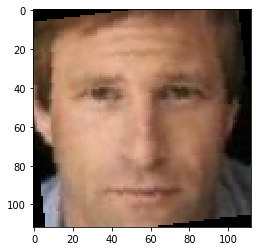

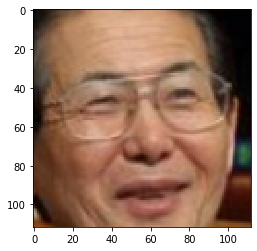

In [98]:
plt.imshow(img1[0][:,:,::-1])
plt.show()
plt.imshow(img2[0][:,:,::-1])
plt.show()

In [99]:
img1_embedding = model.predict(img1)[0]
img2_embedding = model.predict(img2)[0]

In [100]:
metric = 'euclidean'
if metric == 'cosine':
    distance = dst.findCosineDistance(img1_embedding, img2_embedding)
elif metric == 'euclidean':
    distance = dst.findEuclideanDistance(img1_embedding, img2_embedding)
elif metric == 'euclidean_l2':
    distance = dst.findEuclideanDistance(dst.l2_normalize(img1_embedding), dst.l2_normalize(img2_embedding))

In [103]:
def findThreshold(model_name, distance_metric):

    base_threshold = {'cosine': 0.40, 'euclidean': 0.55, 'euclidean_l2': 0.75}

    thresholds = {
        'VGG-Face': {'cosine': 0.40, 'euclidean': 0.60, 'euclidean_l2': 0.86},
        'Facenet':  {'cosine': 0.40, 'euclidean': 10, 'euclidean_l2': 0.80},
        'Facenet512':  {'cosine': 0.30, 'euclidean': 23.56, 'euclidean_l2': 1.04},
        'ArcFace':  {'cosine': 0.68, 'euclidean': 4.15, 'euclidean_l2': 1.13},
        'Dlib': 	{'cosine': 0.07, 'euclidean': 0.6, 'euclidean_l2': 0.4},

        #TODO: find the best threshold values
        'SFace': 	{'cosine': 0.5932763306134152, 'euclidean': 10.734038121282206, 'euclidean_l2': 1.055836701022614},

        'OpenFace': {'cosine': 0.10, 'euclidean': 0.55, 'euclidean_l2': 0.55},
        'DeepFace': {'cosine': 0.23, 'euclidean': 64, 'euclidean_l2': 0.64},
        'DeepID': 	{'cosine': 0.015, 'euclidean': 45, 'euclidean_l2': 0.17}

        }

    threshold = thresholds.get(model_name, base_threshold).get(distance_metric, 0.4)

    return threshold

## Decision

In [105]:
threshold = findThreshold('ArcFace',metric)
print(threshold)
if distance <= threshold:
    print("they are same person")
else:
    print("they are different persons")


4.15
they are different persons


# Fine Tuning the Threshold of distance

When author feed the distance values and target classes of **unit test images** of deepface, the best threshold values when information gain maximizes:

* cosine: 0.6871912959056619
* euclidean: 4.1591468986978075
* euclidean_l2: 1.131571804829017

## Dataset

In [39]:
import random
people = os.listdir("./lfw/")
random.shuffle(people)

# Using 50 person to fine-tuning
identities = {}
using_imgs = 50
total_imgs = 0
for p in people:
    img_list = os.listdir("./lfw/"+p)
    if len(img_list)>1:##More than 1 picture
        identities[p] = img_list[:5] #5 images is taken at most
        total_imgs += min(len(img_list),5)
        if total_imgs>=using_imgs:
            break

In [40]:
identities

{'Larry_Brown': ['Larry_Brown_0001.jpg',
  'Larry_Brown_0002.jpg',
  'Larry_Brown_0003.jpg',
  'Larry_Brown_0004.jpg',
  'Larry_Brown_0005.jpg'],
 'Jerry_Falwell': ['Jerry_Falwell_0001.jpg', 'Jerry_Falwell_0002.jpg'],
 'Steve_Ballmer': ['Steve_Ballmer_0001.jpg',
  'Steve_Ballmer_0002.jpg',
  'Steve_Ballmer_0003.jpg'],
 'Chris_Bell': ['Chris_Bell_0001.jpg', 'Chris_Bell_0002.jpg'],
 'John_Spencer': ['John_Spencer_0001.jpg', 'John_Spencer_0002.jpg'],
 'Stellan_Skarsgard': ['Stellan_Skarsgard_0001.jpg',
  'Stellan_Skarsgard_0002.jpg'],
 'Kenneth_Evans': ['Kenneth_Evans_0001.jpg', 'Kenneth_Evans_0002.jpg'],
 'Norman_Jewison': ['Norman_Jewison_0001.jpg', 'Norman_Jewison_0002.jpg'],
 'Guillermo_Canas': ['Guillermo_Canas_0001.jpg',
  'Guillermo_Canas_0002.jpg',
  'Guillermo_Canas_0003.jpg',
  'Guillermo_Canas_0004.jpg'],
 'Jamling_Norgay': ['Jamling_Norgay_0001.jpg', 'Jamling_Norgay_0002.jpg'],
 'Alice_Fisher': ['Alice_Fisher_0001.jpg', 'Alice_Fisher_0002.jpg'],
 'Erika_Christensen': ['Erika_C

In [41]:
positives = []
for key, values in identities.items():
    for i in range(0, len(values)-1):
        for j in range(i+1, len(values)):
            positive = []
            positive.append(values[i])
            positive.append(values[j])
            positives.append(positive)

positives = pd.DataFrame(positives, columns = ["file_x", "file_y"])
positives["decision"] = "Yes"
positives

,file_x,file_y,decision
0,Larry_Brown_0001.jpg,Larry_Brown_0002.jpg,Yes
1,Larry_Brown_0001.jpg,Larry_Brown_0003.jpg,Yes
2,Larry_Brown_0001.jpg,Larry_Brown_0004.jpg,Yes
3,Larry_Brown_0001.jpg,Larry_Brown_0005.jpg,Yes
4,Larry_Brown_0002.jpg,Larry_Brown_0003.jpg,Yes
...,...,...,...
60,Bill_Paxton_0001.jpg,Bill_Paxton_0004.jpg,Yes
61,Bill_Paxton_0002.jpg,Bill_Paxton_0003.jpg,Yes
62,Bill_Paxton_0002.jpg,Bill_Paxton_0004.jpg,Yes
63,Bill_Paxton_0003.jpg,Bill_Paxton_0004.jpg,Yes


In [42]:
samples_list = list(identities.values())
 
negatives = []
for i in range(0, len(identities) - 1):
    for j in range(i+1, len(identities)):
        cross_product = itertools.product(samples_list[i], samples_list[j])
        cross_product = list(cross_product)
 
    for cross_sample in cross_product:
        negative = []
        negative.append(cross_sample[0])
        negative.append(cross_sample[1])
        negatives.append(negative)
        
negatives = pd.DataFrame(negatives, columns = ["file_x", "file_y"])
negatives["decision"] = "No"
negatives

,file_x,file_y,decision
0,Larry_Brown_0001.jpg,Art_Hoffmann_0001.jpg,No
1,Larry_Brown_0001.jpg,Art_Hoffmann_0002.jpg,No
2,Larry_Brown_0002.jpg,Art_Hoffmann_0001.jpg,No
3,Larry_Brown_0002.jpg,Art_Hoffmann_0002.jpg,No
4,Larry_Brown_0003.jpg,Art_Hoffmann_0001.jpg,No
...,...,...,...
93,Bill_Paxton_0002.jpg,Art_Hoffmann_0002.jpg,No
94,Bill_Paxton_0003.jpg,Art_Hoffmann_0001.jpg,No
95,Bill_Paxton_0003.jpg,Art_Hoffmann_0002.jpg,No
96,Bill_Paxton_0004.jpg,Art_Hoffmann_0001.jpg,No


In [43]:
# Merge Positive and Negative
df = pd.concat([positives, negatives]).reset_index(drop = True)

file_x = []
for f in df.file_x:
    name = f[:f.find("0")-1]
    file_x.append("./lfw/"+name+"/"+f)
df.file_x = file_x

file_y = []
for f in df.file_y:
    name = f[:f.find("0")-1]
    file_y.append("./lfw/"+name+"/"+f)
df.file_y = file_y

In [44]:
df.decision.value_counts()

No     98
Yes    65
Name: decision, dtype: int64

## Finding distances

In [45]:
instances = df[["file_x", "file_y"]].values.tolist()
resp_obj = DeepFace.verify(instances, model_name = "ArcFace", distance_metric = "cosine",
                           enforce_detection = False)

Verification: 100%|██████████| 163/163 [00:39<00:00,  4.12it/s]


In [46]:
distances = []
for i in range(0, len(instances)):
    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
    distances.append(distance)

In [47]:
df["distance"] = distances

In [48]:
df

,file_x,file_y,decision,distance
0,./lfw/Larry_Brown/Larry_Brown_0001.jpg,./lfw/Larry_Brown/Larry_Brown_0002.jpg,Yes,0.4659
1,./lfw/Larry_Brown/Larry_Brown_0001.jpg,./lfw/Larry_Brown/Larry_Brown_0003.jpg,Yes,0.7529
2,./lfw/Larry_Brown/Larry_Brown_0001.jpg,./lfw/Larry_Brown/Larry_Brown_0004.jpg,Yes,0.3798
3,./lfw/Larry_Brown/Larry_Brown_0001.jpg,./lfw/Larry_Brown/Larry_Brown_0005.jpg,Yes,0.2321
4,./lfw/Larry_Brown/Larry_Brown_0002.jpg,./lfw/Larry_Brown/Larry_Brown_0003.jpg,Yes,0.7556
...,...,...,...,...
158,./lfw/Bill_Paxton/Bill_Paxton_0002.jpg,./lfw/Art_Hoffmann/Art_Hoffmann_0002.jpg,No,1.0345
159,./lfw/Bill_Paxton/Bill_Paxton_0003.jpg,./lfw/Art_Hoffmann/Art_Hoffmann_0001.jpg,No,0.8093
160,./lfw/Bill_Paxton/Bill_Paxton_0003.jpg,./lfw/Art_Hoffmann/Art_Hoffmann_0002.jpg,No,0.8377
161,./lfw/Bill_Paxton/Bill_Paxton_0004.jpg,./lfw/Art_Hoffmann/Art_Hoffmann_0001.jpg,No,0.7887


## Analysis Distance

In [49]:
tp_mean = round(df[df.decision == "Yes"].mean().values[0], 4)
tp_std = round(df[df.decision == "Yes"].std().values[0], 4)
fp_mean = round(df[df.decision == "No"].mean().values[0], 4)
fp_std = round(df[df.decision == "No"].std().values[0], 4)

In [50]:
print("Mean of true positives: ", tp_mean)
print("Std of true positives: ", tp_std)
print("Mean of false positives: ", fp_mean)
print("Std of false positives: ", fp_std)

Mean of true positives:  0.4432
Std of true positives:  0.1928
Mean of false positives:  0.9316
Std of false positives:  0.0948


## Distribution

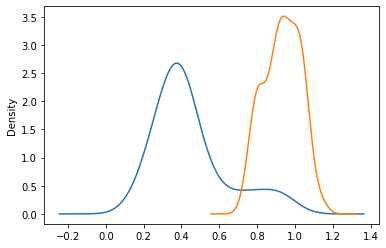

In [74]:
df[df.decision == "Yes"].distance.plot.kde()
df[df.decision == "No"].distance.plot.kde()

## Best Split Point

In [57]:
from chefboost import Chefboost as chef

In [58]:
config = {'algorithm': 'C4.5'}

In [59]:
tmp_df = df[['distance', 'decision']].rename(columns = {"decision": "Decision"}).copy()
model = chef.fit(tmp_df, config)

[INFO]:  3 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  0.9558682441711426  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  95.0920245398773 % on  163  instances
Labels:  ['Yes' 'No']
Confusion matrix:  [[57, 0], [8, 98]]
Precision:  100.0 %, Recall:  87.6923 %, F1:  93.4426 %


## Sigma

In [60]:
sigma = 2
#2 sigma corresponds 95.45% confidence, and 3 sigma corresponds 99.73% confidence

#threshold = round(tp_mean + sigma * tp_std, 4)
threshold = 0.3147 #comes from c4.5 algorithm
print("threshold: ", threshold)

threshold:  0.3147


In [61]:
df[df.decision == 'Yes'].distance.max()

0.9613

In [62]:
df[df.decision == 'No'].distance.min()

0.7482

# Evaluation

In [63]:
df["prediction"] = "No"

In [64]:
idx = df[df.distance <= threshold].index
df.loc[idx, 'prediction'] = 'Yes'

In [65]:
df.sample(5)

,file_x,file_y,decision,distance,prediction
157,./lfw/Bill_Paxton/Bill_Paxton_0002.jpg,./lfw/Art_Hoffmann/Art_Hoffmann_0001.jpg,No,0.9635,No
95,./lfw/Stellan_Skarsgard/Stellan_Skarsgard_0002...,./lfw/Art_Hoffmann/Art_Hoffmann_0001.jpg,No,0.9186,No
158,./lfw/Bill_Paxton/Bill_Paxton_0002.jpg,./lfw/Art_Hoffmann/Art_Hoffmann_0002.jpg,No,1.0345,No
76,./lfw/Jerry_Falwell/Jerry_Falwell_0001.jpg,./lfw/Art_Hoffmann/Art_Hoffmann_0002.jpg,No,0.8902,No
77,./lfw/Jerry_Falwell/Jerry_Falwell_0002.jpg,./lfw/Art_Hoffmann/Art_Hoffmann_0001.jpg,No,0.9391,No


In [66]:
cm = confusion_matrix(df.decision.values, df.prediction.values)

In [67]:
cm

array([[98,  0],
       [49, 16]], dtype=int64)

In [68]:
tn, fp, fn, tp = cm.ravel()

In [69]:
tn, fp, fn, tp

(98, 0, 49, 16)

In [70]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)

In [71]:
print("Precision: ", 100*precision,"%")
print("Recall: ", 100*recall,"%")
print("F1 score ",100*f1, "%")
print("Accuracy: ", 100*accuracy,"%")

Precision:  100.0 %
Recall:  24.615384615384617 %
F1 score  39.50617283950618 %
Accuracy:  69.93865030674846 %


In [72]:
df.to_csv("threshold_pivot.csv", index = False)